# Generate Gene List for FunGen xQTL Analysis

## Overview
This analysis is trying to understand the functional pathway signals for the gene list we found from xQTL data. We are trying to answer the question -- we have limit genes overlapped with GVC and TWAS, does that true or we did incorrect analysis. For this, we need to answer it through: 
1. functional pathways enrichment 
    1. for GVC list -- to check the pathways for gold standard
    2. for genes in xQTL data we have -- to check the overview pathways we have;
    3. for specific genes in xQTL data only -- to check the additional pathways we have;
2. PPI analysis -- for the protein level evidence may show the indirect effect
3. Are xQTL-only genes missed by TWAS/GVC because they are tissue-specific/cell type specific? -- need to check the resource of those xQTL-only gene -- or aggregate
4. Identify if xQTL-only genes are regulators or targets in known gene regulatory circuits.
5. The prediction to disease? -- AUC

In [75]:
library(tidyverse)
library(data.table)

### load gene lists

In [76]:
DNE_sig_xqtl = fread("~/project/image_QTL/interested_genes/CB_M1/DNE/annotated_dne_gene.tsv", sep= '\t')

In [3]:
DNE_sig_xqtl = unique(DNE_sig_xqtl)

In [4]:
head(DNE_sig_xqtl)

#chr start     end       gene_id         strand gene_name event_ID    
1 chr1  21822243  21937309 ENSG00000142798 -      HSPG2     image_Aging3
2 chr1  22025510  22101359 ENSG00000070831 +      CDC42     image_Aging3
3 chr1  45786986  46036121 ENSG00000086015 +      MAST2     image_Aging2
4 chr1 117001749 117036475 ENSG00000134256 +      CD101     image_Aging1
5 chr1 205767985 205775481 ENSG00000117280 -      RAB29     image_Aging4
6 chr1 205789093 205813747 ENSG00000133065 -      SLC41A1   image_Aging4

In [5]:
dim(DNE_sig_xqtl)

[1] 292   7

In [112]:
all_genes = DNE_sig_xqtl |> pull(gene_name) |> unique() #
all_genes |> length()

[1] 289

In [11]:
strong_list = intersect(gvc_list$gene_id, xQTL_list$gene_id) # the overlap between xQTL and gvc


In [18]:
# Intersect multiple gene_id vectors
strong_list <- Reduce(intersect, list(gvc_list$gene_id, xQTL_list$gene_id, twas$molecular_id)) # the overlap between xQTL and gvc and twas

In [19]:
strong_list ## ICA1L, WDR12, TNIP1, PILRA, PILRB; known risk genes for vascular disease and lucunar stroke-ICA1L,CARF, WDR12,NBEAL1

[1] "ENSG00000163596" "ENSG00000138442" "ENSG00000145901" "ENSG00000121716"
[5] "ENSG00000085514"

In [20]:
xQTL_only <- Reduce(setdiff, list(DNE_sig_xqtl$gene_id, gvc_list$gene_id, twas_list)) # the genes unqiue from xQTL, NOT from gvc and twas
xQTL_only <- DNE_sig_xqtl %>% filter(gene_id %in% xQTL_only)
xQTL_only %>% dim
xQTL_only |> pull(gene_name) |> unique() |> length()

[1] 18  9

[1] 17

In [190]:
twas <- fread('/data/analysis_result/twas/export/summary/FunGen_twas.exported.bed.gz')

In [191]:
head(twas)

#chr start  end    molecular_id    TADB_start TADB_end context        
1 1    923921 923922 ENSG00000187634 0          6480000  AC_DeJager_eQTL
2 1    923921 923922 ENSG00000187634 0          6480000  AC_DeJager_eQTL
3 1    923921 923922 ENSG00000187634 0          6480000  AC_DeJager_eQTL
4 1    923921 923922 ENSG00000187634 0          6480000  AC_DeJager_eQTL
5 1    923921 923922 ENSG00000187634 0          6480000  AC_DeJager_eQTL
6 1    923921 923922 ENSG00000187634 0          6480000  AC_DeJager_eQTL
  gwas_study      method  is_imputable is_selected_method rsq_cv    
1 Bellenguez_2022 bayes_l TRUE         FALSE              0.06358278
2 Bellenguez_2022 bayes_r TRUE          TRUE              0.09006772
3 Bellenguez_2022 enet    TRUE         FALSE              0.07363354
4 Bellenguez_2022 lasso   TRUE         FALSE              0.07175097
5 Bellenguez_2022 mrash   TRUE         FALSE              0.08157779
6 Bellenguez_2022 mrmash  TRUE         FALSE              0.07746210
  pval_cv      twas_z     twas_pval type block             
1 4.713139e-10 -0.5516557 0.5811842 eQTL chr1_16103_2888443
2 8.293727e-14 -0.6079598 0.5432142 eQTL chr1_16103_2888443
3 1.811244e-11 -0.8264034 0.4085753 eQTL chr1_16103_2888443
4 3.341192e-11 -0.7787284 0.4361397 eQTL chr1_16103_2888443
5 1.353045e-12 -0.1803822 0.8568525 eQTL chr1_16103_2888443
6 5.199122e-12 -1.4978502 0.1341722 eQTL chr1_16103_2888443

In [194]:
DDX17 = twas |> filter(molecular_id == 'ENSG00000100201')

In [196]:
dim(DDX17)

[1] 1224   17

In [197]:
DDX17 |> filter(twas_pval < 4*1e-5)

#chr start    end      molecular_id    TADB_start TADB_end context          
1  22   38507658 38507659 ENSG00000100201 37483438   41680000 Ast_DeJager_eQTL 
2  22   38507658 38507659 ENSG00000100201 37483438   41680000 Ast_mega_eQTL    
3  22   38507658 38507659 ENSG00000100201 37483438   41680000 Ast_mega_eQTL    
4  22   38507658 38507659 ENSG00000100201 37483438   41680000 Ast_mega_eQTL    
5  22   38507658 38507659 ENSG00000100201 37483438   41680000 Ast_mega_eQTL    
6  22   38507658 38507659 ENSG00000100201 37483438   41680000 BM_36_MSBB_eQTL  
7  22   38507658 38507659 ENSG00000100201 37483438   41680000 BM_36_MSBB_eQTL  
8  22   38507658 38507659 ENSG00000100201 37483438   41680000 Exc_DeJager_eQTL 
9  22   38507658 38507659 ENSG00000100201 37483438   41680000 Exc_DeJager_eQTL 
10 22   38507658 38507659 ENSG00000100201 37483438   41680000 Knight_eQTL_brain
11 22   38507658 38507659 ENSG00000100201 37483438   41680000 Knight_eQTL_brain
12 22   38507658 38507659 ENSG00000100201 37483438   41680000 Knight_eQTL_brain
13 22   38507658 38507659 ENSG00000100201 37483438   41680000 OPC_DeJager_eQTL 
14 22   38507658 38507659 ENSG00000100201 37483438   41680000 OPC_DeJager_eQTL 
15 22   38507658 38507659 ENSG00000100201 37483438   41680000 OPC_mega_eQTL    
16 22   38507658 38507659 ENSG00000100201 37483438   41680000 OPC_mega_eQTL    
17 22   38507658 38507659 ENSG00000100201 37483438   41680000 OPC_mega_eQTL    
18 22   38507658 38507659 ENSG00000100201 37483438   41680000 OPC_mega_eQTL    
19 22   38507658 38507659 ENSG00000100201 37483438   41680000 OPC_mega_eQTL    
20 22   38507658 38507659 ENSG00000100201 37483438   41680000 Oli_DeJager_eQTL 
21 22   38507658 38507659 ENSG00000100201 37483438   41680000 Oli_DeJager_eQTL 
22 22   38507658 38507659 ENSG00000100201 37483438   41680000 Oli_DeJager_eQTL 
23 22   38507658 38507659 ENSG00000100201 37483438   41680000 Oli_mega_eQTL    
24 22   38507658 38507659 ENSG00000100201 37483438   41680000 Oli_mega_eQTL    
   gwas_study                     method is_imputable is_selected_method
1  Wightman_Full_2021             susie  TRUE         FALSE             
2  Wightman_Excluding23andMe_2021 enet   TRUE         FALSE             
3  Wightman_Full_2021             enet   TRUE         FALSE             
4  Wightman_Full_2021             mrash  TRUE         FALSE             
5  Wightman_Full_2021             susie  TRUE         FALSE             
6  Wightman_Full_2021             enet   TRUE         FALSE             
7  Wightman_Full_2021             susie  TRUE         FALSE             
8  Wightman_Full_2021             enet   TRUE         FALSE             
9  Wightman_Full_2021             lasso  TRUE         FALSE             
10 Wightman_Full_2021             enet   TRUE         FALSE             
11 Wightman_Full_2021             mrash  TRUE          TRUE             
12 Wightman_Full_2021             susie  TRUE         FALSE             
13 Wightman_Full_2021             enet   TRUE         FALSE             
14 Wightman_Full_2021             lasso  TRUE         FALSE             
15 Wightman_Excluding23andMe_2021 enet   TRUE         FALSE             
16 Wightman_Excluding23andMe_2021 lasso  TRUE         FALSE             
17 Wightman_Full_2021             enet   TRUE         FALSE             
18 Wightman_Full_2021             lasso  TRUE         FALSE             
19 Wightman_Full_2021             mrash  TRUE         FALSE             
20 Wightman_Full_2021             enet   TRUE         FALSE             
21 Wightman_Full_2021             lasso  TRUE         FALSE             
22 Wightman_Full_2021             susie  TRUE          TRUE             
23 Wightman_Full_2021             enet   TRUE         FALSE             
24 Wightman_Full_2021             mrash  TRUE         FALSE             
   rsq_cv       pval_cv      twas_z    twas_pval    type
1  0.0234393548 1.671980e-03 -4.180768 2.905261e-05 eQTL
2  0.0190624461 1.000798e-04 -4.567469 4.936495e-06 eQTL
3  0.01

In [198]:
FAM227A = twas |> filter(molecular_id == 'ENSG00000184949')

In [199]:
dim(FAM227A)

[1] 1638   17

In [200]:
FAM227A |> filter(twas_pval < 3*1e-5)

#chr start    end      molecular_id    TADB_start TADB_end
1  22   38656627 38656628 ENSG00000184949 37520000   41680000
2  22   38656627 38656628 ENSG00000184949 37520000   41680000
3  22   38656627 38656628 ENSG00000184949 37520000   41680000
4  22   38656627 38656628 ENSG00000184949 37520000   41680000
5  22   38656627 38656628 ENSG00000184949 37520000   41680000
6  22   38656627 38656628 ENSG00000184949 37520000   41680000
7  22   38656627 38656628 ENSG00000184949 37520000   41680000
8  22   38656627 38656628 ENSG00000184949 37520000   41680000
9  22   38656627 38656628 ENSG00000184949 37520000   41680000
10 22   38656627 38656628 ENSG00000184949 37520000   41680000
11 22   38656627 38656628 ENSG00000184949 37520000   41680000
12 22   38656627 38656628 ENSG00000184949 37520000   41680000
13 22   38656627 38656628 ENSG00000184949 37520000   41680000
14 22   38656627 38656628 ENSG00000184949 37520000   41680000
15 22   38656627 38656628 ENSG00000184949 37520000   41680000
16 22   38656627 38656628 ENSG00000184949 37520000   41680000
17 22   38656627 38656628 ENSG00000184949 37520000   41680000
18 22   38656627 38656628 ENSG00000184949 37520000   41680000
19 22   38656627 38656628 ENSG00000184949 37520000   41680000
20 22   38656627 38656628 ENSG00000184949 37520000   41680000
21 22   38656627 38656628 ENSG00000184949 37520000   41680000
22 22   38656627 38656628 ENSG00000184949 37520000   41680000
23 22   38656627 38656628 ENSG00000184949 37520000   41680000
24 22   38656627 38656628 ENSG00000184949 37520000   41680000
25 22   38656627 38656628 ENSG00000184949 37520000   41680000
   context                                                                  
1  BM_10_MSBB_eQTL                                                          
2  BM_10_MSBB_eQTL                                                          
3  BM_10_MSBB_eQTL                                                          
4  BM_22_MSBB_eQTL                                                          
5  BM_22_MSBB_eQTL                                                          
6  BM_36_MSBB_eQTL                                                          
7  BM_44_MSBB_eQTL                                                          
8  BM_44_MSBB_eQTL                                                          
9  BM_44_MSBB_eQTL                                                          
10 DLPFC_DeJager_eQTL                                                       
11 Exc_DeJager_eQTL                                                         
12 Exc_DeJager_eQTL                                                         
13 Exc_DeJager_eQTL                                                         
14 Inh_DeJager_eQTL                                                         
15 Knight_eQTL_brain                                                        
16 Knight_eQTL_brain                                                        
17 Knight_eQTL_brain                                                        
18 PCC_DeJager_eQTL                                                         
19 PCC_DeJager_eQTL                                                         
20 PCC_DeJager_eQTL                                                         
21 PCC_DeJager_eQTL                                                         
22 ROSMAP_DLPFC_sQTL_chr22:38617945:38620211:clu_173585_-:UP:ENSG00000184949
23 ROSMAP_DLPFC_sQTL_chr22:38617945:38620211:clu_173585_-:UP:ENSG00000184949
24 ROSMAP_DLPFC_sQTL_chr22:38625935:38626179:clu_173585_-:UP:ENSG00000184949
25 ROSMAP_PCC_sQTL_chr22:38607476:38620211:clu_132632_-:PR:ENSG00000184949  
   gwas_study         method  is_imputable is_selected_method rsq_cv     
1  Wightman_Full_2021 enet    TRUE         FALSE              0.196906546
2  Wightman_Full_2021 lasso   TRUE         FALSE              0.166017335
3  Wightman_Full_2021 mrmash  TRUE         FALSE              0.180890664
4  Wightman_Full_2021 enet    TRUE         FALSE              0.119949091
5  Wightman_Full_20

In [201]:
CBY1 = twas |> filter(molecular_id == 'ENSG00000100211')

In [202]:
dim(CBY1)

[1] 873  17

In [203]:
CBY1 |> filter(twas_pval < 4*1e-5)

#chr start    end      molecular_id    TADB_start TADB_end
1  22   38656638 38656639 ENSG00000100211 37520000   41680000
2  22   38656638 38656639 ENSG00000100211 37520000   41680000
3  22   38656638 38656639 ENSG00000100211 37520000   41680000
4  22   38656638 38656639 ENSG00000100211 37520000   41680000
5  22   38656638 38656639 ENSG00000100211 37520000   41680000
6  22   38656638 38656639 ENSG00000100211 37520000   41680000
7  22   38656638 38656639 ENSG00000100211 37520000   41680000
8  22   38656638 38656639 ENSG00000100211 37520000   41680000
9  22   38656638 38656639 ENSG00000100211 37520000   41680000
10 22   38656638 38656639 ENSG00000100211 37520000   41680000
11 22   38656638 38656639 ENSG00000100211 37520000   41680000
12 22   38656638 38656639 ENSG00000100211 37520000   41680000
13 22   38656638 38656639 ENSG00000100211 37520000   41680000
14 22   38656638 38656639 ENSG00000100211 37520000   41680000
15 22   38656638 38656639 ENSG00000100211 37520000   41680000
16 22   38656638 38656639 ENSG00000100211 37520000   41680000
17 22   38656638 38656639 ENSG00000100211 37520000   41680000
18 22   38656638 38656639 ENSG00000100211 37520000   41680000
19 22   38656638 38656639 ENSG00000100211 37520000   41680000
20 22   38656638 38656639 ENSG00000100211 37520000   41680000
21 22   38656638 38656639 ENSG00000100211 37520000   41680000
22 22   38656638 38656639 ENSG00000100211 37520000   41680000
23 22   38656638 38656639 ENSG00000100211 37520000   41680000
24 22   38656638 38656639 ENSG00000100211 37520000   41680000
   context                                                                  
1  DLPFC_DeJager_eQTL                                                       
2  DLPFC_DeJager_eQTL                                                       
3  DLPFC_DeJager_eQTL                                                       
4  DLPFC_DeJager_eQTL                                                       
5  DLPFC_DeJager_eQTL                                                       
6  DLPFC_DeJager_eQTL                                                       
7  DLPFC_DeJager_eQTL                                                       
8  DLPFC_DeJager_eQTL                                                       
9  Exc_DeJager_eQTL                                                         
10 Exc_DeJager_eQTL                                                         
11 Exc_DeJager_eQTL                                                         
12 Exc_DeJager_eQTL                                                         
13 Inh_DeJager_eQTL                                                         
14 Inh_DeJager_eQTL                                                         
15 Inh_DeJager_eQTL                                                         
16 Inh_DeJager_eQTL                                                         
17 Inh_DeJager_eQTL                                                         
18 Inh_DeJager_eQTL                                                         
19 Inh_DeJager_eQTL                                                         
20 Inh_mega_eQTL                                                            
21 Inh_mega_eQTL                                                            
22 Inh_mega_eQTL                                                            
23 PCC_DeJager_eQTL                                                         
24 ROSMAP_DLPFC_sQTL_chr22:38671188:38673158:clu_171691_+:PR:ENSG00000100211
   gwas_study         method  is_imputable is_selected_method rsq_cv    
1  Bellenguez_2022    bayes_l TRUE         FALSE              0.01910414
2  Bellenguez_2022    bayes_r TRUE         FALSE              0.02909021
3  Bellenguez_2022    mrash   TRUE         FALSE              0.02247204
4  Bellenguez_2022    mrmash  TRUE         FALSE              0.03723767
5  Wightman_Full_2021 bayes_l TRUE         FALSE              0.01910414
6  Wightman_Full_2021 bayes_r TRUE         FALSE              0.02909021
7  Wightman_Full_

In [204]:
LATS1 = twas |> filter(molecular_id == 'ENSG00000131023')

In [205]:
dim(LATS1)

[1] 1332   17

In [206]:
LATS1 |> filter(twas_pval < 3.8*1e-5)

#chr start end molecular_id TADB_start TADB_end context gwas_study method
     is_imputable is_selected_method rsq_cv pval_cv twas_z twas_pval type block

In [13]:
twas_list = twas |> pull(molecular_id)

In [47]:
setdiff(all_genes, unique(genes_with_ppi$gene))

[1] "NUAK2"           "SLC26A9"         "RHEX"            "THNSL1"         
 [5] "TRIM8"           "EEF1AKMT2"       "AKIP1"           "PACSIN3"        
 [9] "ZDHHC5"          "DSCAML1"         "IL23A"           "DYRK2"          
[13] "CCDC169-SOHLH2"  "ARMH4"           "NPIPA1"          "PDXDC1"         
[17] "NPIPA5"          "SLC5A11"         "NPIPB7"          "TMEM208"        
[21] "FOXF1"           "VPS9D1"          "SSH2"            "LINC02210-CRHR1"
[25] "AC005670.2"      "TTLL6"           "HELZ"            "ATP9B"          
[29] "UPK1A"           "CCDC9"           "DNAJC5"          "STIMATE"        
[33] "IGFBP7"          "AHRR"            "CYSTM1"          "APBB3"          
[37] "TMEM170B"        "BTN2A1"          "CENPW"           "WTAP"           
[41] "UMAD1"           "TBRG4"           "STAG3"           "SPDYE3"         
[45] "C7orf33"         "FAM160B2"        "SBSPON"          "GADD45G"

In [24]:
twas_diff_list <- Reduce(setdiff, list(twas_list, xQTL_list$gene_id, gvc_list$gene_id)) # the genes unqiue from twas, NOT from gvc and xQTL
twas_diff_list %>% length

[1] 16909

## GO enrichment

### real gvc list - 20 genes from GVC table2

In [227]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# #BiocManager::install("GO.db", force = TRUE)

# #BiocManager::install("HDO.db")
# BiocManager::install("org.Hs.eg.db")

In [77]:
library(clusterProfiler)
library(org.Hs.eg.db)


### All genes 

In [7]:
# Run GO enrichment analysis for Biological Process (BP) for all genes
ego <- enrichGO(
  gene          = DNE_sig_xqtl$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)

ID         Description                                       
GO:0035459 GO:0035459 vesicle cargo loading                             
GO:0021782 GO:0021782 glial cell development                            
GO:0006068 GO:0006068 ethanol catabolic process                         
GO:0034310 GO:0034310 primary alcohol catabolic process                 
GO:0072594 GO:0072594 establishment of protein localization to organelle
GO:0031331 GO:0031331 positive regulation of cellular catabolic process 
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0035459 5/256     40/21261  0.0001134954 0.3467284 0.3323623
GO:0021782 8/256     143/21261 0.0003477601 0.3688230 0.3535415
GO:0006068 3/256     13/21261  0.0004512845 0.3688230 0.3535415
GO:0034310 3/256     16/21261  0.0008603281 0.3688230 0.3535415
GO:0072594 15/256    494/21261 0.0010163762 0.3688230 0.3535415
GO:0031331 14/256    443/21261 0.0010191924 0.3688230 0.3535415
           geneID                                                                                                                                                                                                                                         
GO:0035459 ENSG00000114650/ENSG00000138674/ENSG00000132842/ENSG00000137177/ENSG00000170348                                                                                                                                                                
GO:0021782 ENSG00000114646/ENSG00000110492/ENSG00000124920/ENSG00000018236/ENSG00000119718/ENSG00000186868/ENSG00000197405/ENSG00000128271                                                                                                                
GO:0006068 ENSG00000198075/ENSG00000197165/ENSG00000196502                                                                                                                                                                                                
GO:0034310 ENSG00000198075/ENSG00000197165/ENSG00000196502                                                                                                                                                                                                
GO:0072594 ENSG00000196862/ENSG00000135968/ENSG00000153201/ENSG00000152977/ENSG00000132842/ENSG00000120438/ENSG00000175224/ENSG00000107882/ENSG00000139579/ENSG00000176476/ENSG00000186868/ENSG00000159210/ENSG00000108395/ENSG00000182481/ENSG00000100216
GO:0031331 ENSG00000144535/ENSG00000014123/ENSG00000146453/ENSG00000083223/ENSG00000175224/ENSG00000165912/ENSG00000095787/ENSG00000171206/ENSG00000135473/ENSG00000185950/ENSG00000090905/ENSG00000102882/ENSG00000136436/ENSG00000078747                
           Count
GO:0035459  5   
GO:0021782  8   
GO:0006068  3   
GO:0034310  3   
GO:0072594 15   
GO:0031331 14

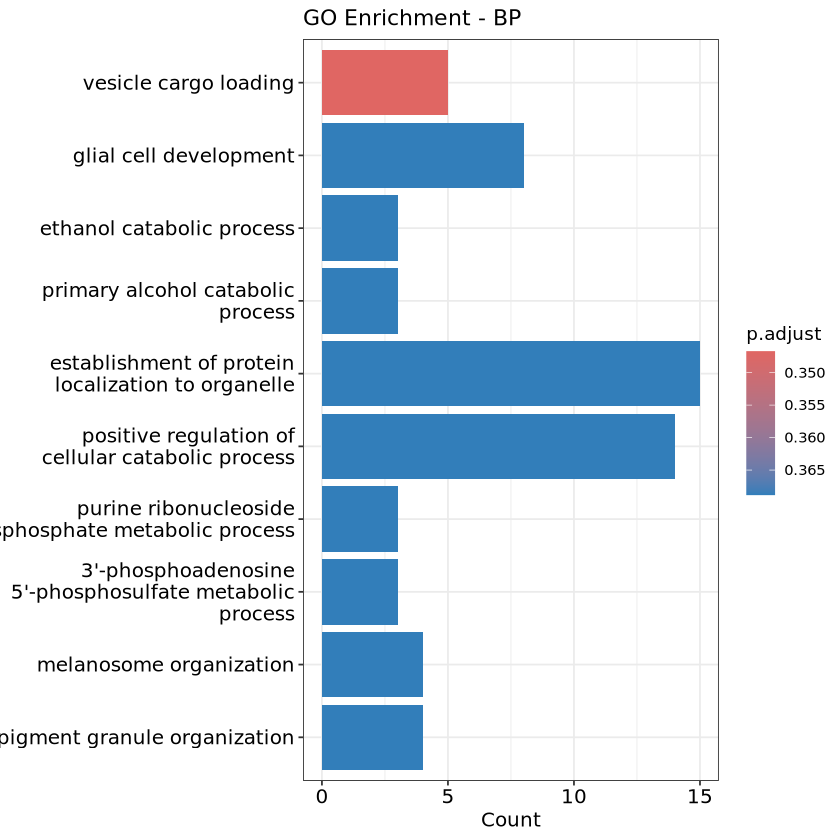

In [8]:
# View results
head(ego)

# Plot results
barplot(ego, showCategory = 10, title = "GO Enrichment - BP")

In [78]:
AD_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID, "image_AD1") |str_detect(event_ID,"image_AD2"))
dementia_related_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID,"image_AD1") | str_detect(event_ID,"image_AD2") | str_detect(event_ID,"Aging2") | str_detect(event_ID,"Aging3"))
AD1_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID,"image_AD1"))
AD2_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID,"image_AD2"))
Aging1_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID,"image_Aging1"))
Aging2_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID,"image_Aging2"))
Aging3_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID,"image_Aging3"))
Aging4_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID,"image_Aging4"))
Aging5_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID,"image_Aging5"))
AD2_Aging2_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID,"image_Aging2") | str_detect(event_ID,"image_AD2"))
AD2_Aging4_xQTL_list = DNE_sig_xqtl |> filter(str_detect(event_ID,"image_Aging4") | str_detect(event_ID,"image_AD2"))

### image_dementia_xQTL list

In [10]:
dementia_related_xQTL_ego <- enrichGO(
  gene          = dementia_related_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [11]:
head(dementia_related_xQTL_ego, n=5)

ID         Description                                      
GO:0072384 GO:0072384 organelle transport along microtubule            
GO:0031331 GO:0031331 positive regulation of cellular catabolic process
GO:0099111 GO:0099111 microtubule-based transport                      
GO:0006893 GO:0006893 Golgi to plasma membrane transport               
GO:0043524 GO:0043524 negative regulation of neuron apoptotic process  
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0072384 5/129     92/21261  0.0002452619 0.2335095 0.2145121
GO:0031331 10/129    443/21261 0.0003774479 0.2335095 0.2145121
GO:0099111 7/129     221/21261 0.0004078031 0.2335095 0.2145121
GO:0006893 4/129     59/21261  0.0004547298 0.2335095 0.2145121
GO:0043524 6/129     176/21261 0.0007252490 0.2335095 0.2145121
           geneID                                                                                                                                                         
GO:0072384 ENSG00000070831/ENSG00000132842/ENSG00000137177/ENSG00000186868/ENSG00000100242                                                                                
GO:0031331 ENSG00000144535/ENSG00000083223/ENSG00000175224/ENSG00000165912/ENSG00000095787/ENSG00000171206/ENSG00000135473/ENSG00000185950/ENSG00000102882/ENSG00000078747
GO:0099111 ENSG00000070831/ENSG00000132842/ENSG00000137177/ENSG00000166171/ENSG00000138175/ENSG00000186868/ENSG00000100242                                                
GO:0006893 ENSG00000115306/ENSG00000137177/ENSG00000138175/ENSG00000073969                                                                                                
GO:0043524 ENSG00000110492/ENSG00000089094/ENSG00000171552/ENSG00000125965/ENSG00000101152/ENSG00000128271                                                                
           Count
GO:0072384  5   
GO:0031331 10   
GO:0099111  7   
GO:0006893  4   
GO:0043524  6

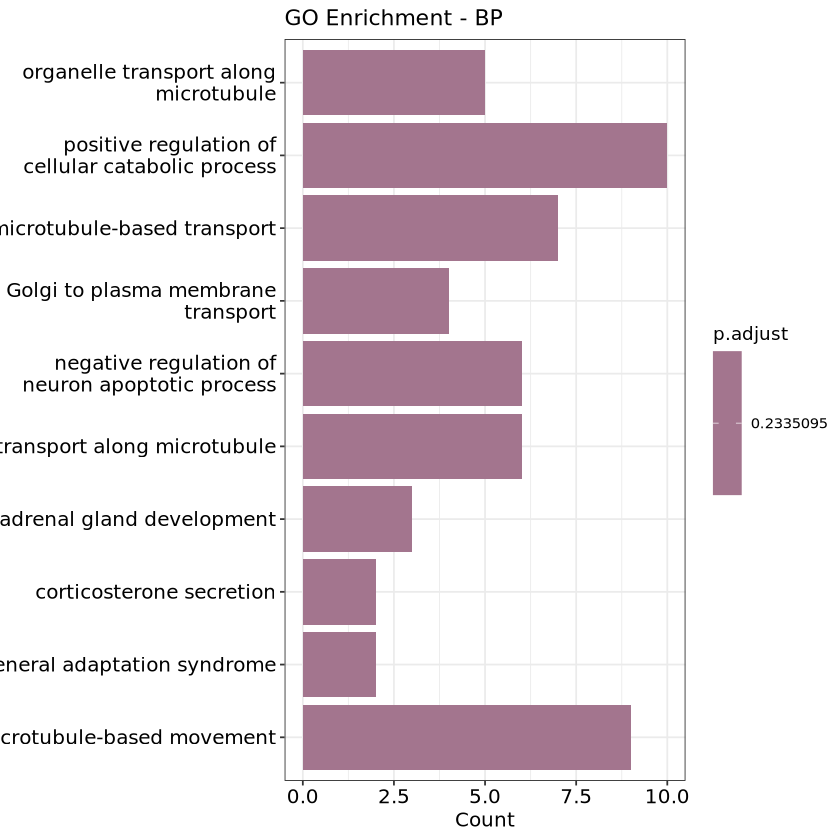

In [12]:
barplot(dementia_related_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

### image_AD_xQTL list

In [13]:
AD_xQTL_ego <- enrichGO(
  gene          = AD_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [14]:
head(AD_xQTL_ego, n=5)

ID         Description                                           
GO:0035459 GO:0035459 vesicle cargo loading                                 
GO:0021670 GO:0021670 lateral ventricle development                         
GO:0098773 GO:0098773 skin epidermis development                            
GO:0090090 GO:0090090 negative regulation of canonical Wnt signaling pathway
GO:0045582 GO:0045582 positive regulation of T cell differentiation         
           GeneRatio BgRatio   pvalue       p.adjust qvalue   
GO:0035459 3/65      40/21261  0.0002485323 0.197134 0.1700351
GO:0021670 2/65      12/21261  0.0005955387 0.197134 0.1700351
GO:0098773 4/65      144/21261 0.0009918490 0.197134 0.1700351
GO:0090090 4/65      146/21261 0.0010439503 0.197134 0.1700351
GO:0045582 4/65      147/21261 0.0010707095 0.197134 0.1700351
           geneID                                                         
GO:0035459 ENSG00000114650/ENSG00000132842/ENSG00000137177                
GO:0021670 ENSG00000166171/ENSG00000089094                                
GO:0098773 ENSG00000132842/ENSG00000146648/ENSG00000134569/ENSG00000105229
GO:0090090 ENSG00000205269/ENSG00000110492/ENSG00000134569/ENSG00000198561
GO:0045582 ENSG00000173473/ENSG00000132842/ENSG00000110492/ENSG00000110944
           Count
GO:0035459 3    
GO:0021670 2    
GO:0098773 4    
GO:0090090 4    
GO:0045582 4

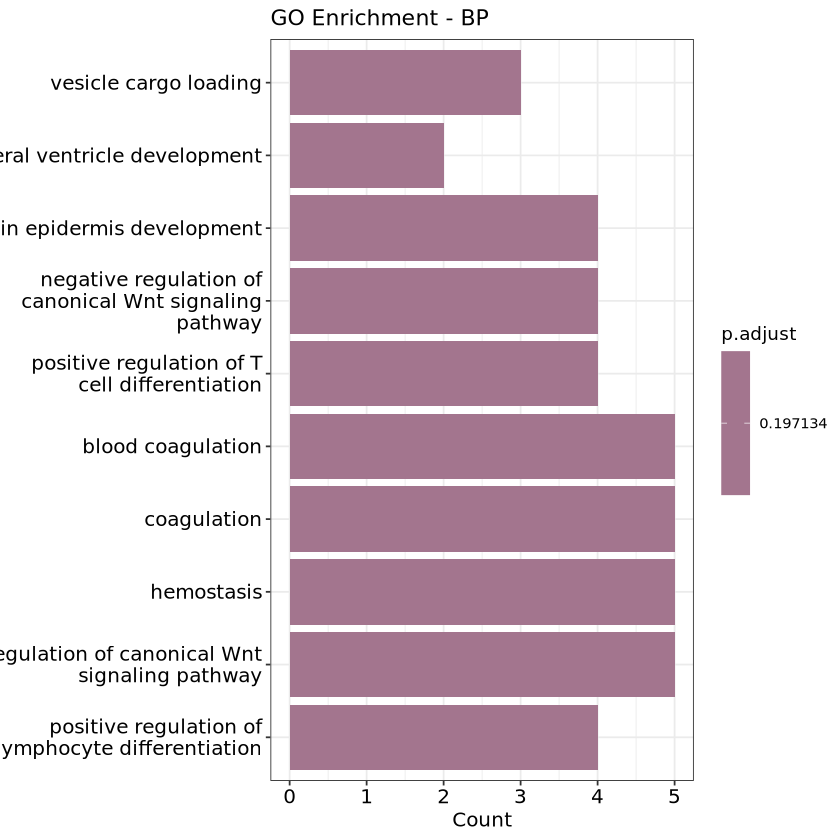

In [15]:
barplot(AD_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [16]:
ggsave('figs/combined_image_AD_sig_xqtl_GO.pdf', width = 6, height = 6)

ERROR: [1m[33mError[39m in `ggsave()`:[22m
[1m[22m[33m![39m Cannot find directory [34mfigs[39m.
[36mi[39m Please supply an existing directory or use `create.dir = TRUE`.


### AD2_Aging2(MTL)_xQTL

In [17]:
AD2_Aging2_xQTL_ego <- enrichGO(
  gene          = AD2_Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [18]:
AD2_Aging2_xQTL_ego |> as.data.frame() |>filter(str_detect(geneID, "ENSG00000149927"))

ID Description GeneRatio BgRatio pvalue p.adjust qvalue geneID Count

In [19]:
head(AD2_Aging2_xQTL_ego, n=5)

ID         Description                                           
GO:0032200 GO:0032200 telomere organization                                 
GO:0071622 GO:0071622 regulation of granulocyte chemotaxis                  
GO:0090090 GO:0090090 negative regulation of canonical Wnt signaling pathway
GO:1904355 GO:1904355 positive regulation of telomere capping               
GO:0010759 GO:0010759 positive regulation of macrophage chemotaxis          
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0032200 5/69      218/21261 0.0007139812 0.3043412 0.2782182
GO:0071622 3/69      54/21261  0.0007207499 0.3043412 0.2782182
GO:0090090 4/69      146/21261 0.0013050754 0.3043412 0.2782182
GO:1904355 2/69      19/21261  0.0017128016 0.3043412 0.2782182
GO:0010759 2/69      20/21261  0.0018991299 0.3043412 0.2782182
           geneID                                                                         
GO:0032200 ENSG00000275126/ENSG00000106399/ENSG00000139579/ENSG00000102882/ENSG00000108384
GO:0071622 ENSG00000110492/ENSG00000110944/ENSG00000102882                                
GO:0090090 ENSG00000205269/ENSG00000110492/ENSG00000134569/ENSG00000198561                
GO:1904355 ENSG00000139579/ENSG00000102882                                                
GO:0010759 ENSG00000110492/ENSG00000102882                                                
           Count
GO:0032200 5    
GO:0071622 3    
GO:0090090 4    
GO:1904355 2    
GO:0010759 2

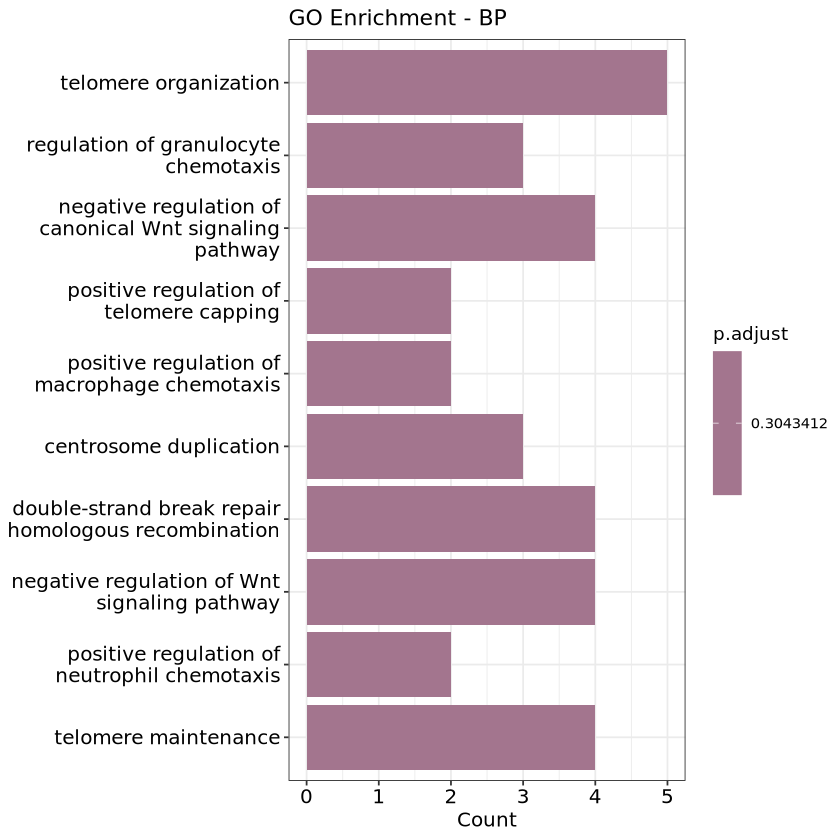

In [20]:
barplot(AD2_Aging2_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [62]:
AD2_Aging2_xQTL_ego_cc <- enrichGO(
  gene          = AD2_Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [63]:
head(AD2_Aging2_xQTL_ego_cc, n=10)

ID         Description                                         
GO:0099091 GO:0099091 postsynaptic specialization, intracellular component
GO:0098978 GO:0098978 glutamatergic synapse                               
GO:0031463 GO:0031463 Cul3-RING ubiquitin ligase complex                  
GO:0005657 GO:0005657 replication fork                                    
GO:0005788 GO:0005788 endoplasmic reticulum lumen                         
GO:0035861 GO:0035861 site of double-strand break                         
GO:0097136 GO:0097136 Bcl-2 family protein complex                        
GO:0072534 GO:0072534 perineuronal net                                    
GO:0071203 GO:0071203 WASH complex                                        
GO:0098966 GO:0098966 perisynaptic extracellular matrix                   
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0099091 2/69      20/22568  0.001689213 0.1558300 0.1450135
GO:0098978 6/69      440/22568 0.002258406 0.1558300 0.1450135
GO:0031463 2/69      36/22568  0.005427247 0.2496534 0.2323243
GO:0005657 2/69      67/22568  0.017924128 0.2795093 0.2601078
GO:0005788 4/69      337/22568 0.019755677 0.2795093 0.2601078
GO:0035861 2/69      88/22568  0.029788530 0.2795093 0.2601078
GO:0097136 1/69      10/22568  0.030162955 0.2795093 0.2601078
GO:0072534 1/69      11/22568  0.033129475 0.2795093 0.2601078
GO:0071203 1/69      12/22568  0.036087052 0.2795093 0.2601078
GO:0098966 1/69      12/22568  0.036087052 0.2795093 0.2601078
           geneID                                                                                         
GO:0099091 ENSG00000156599/ENSG00000198561                                                                
GO:0098978 ENSG00000135905/ENSG00000118407/ENSG00000156599/ENSG00000198561/ENSG00000110975/ENSG00000102882
GO:0031463 ENSG00000122550/ENSG00000174943                                                                
GO:0005657 ENSG00000106399/ENSG00000108384                                                                
GO:0005788 ENSG00000086619/ENSG00000038427/ENSG00000110944/ENSG00000102882                                
GO:0035861 ENSG00000106399/ENSG00000139579                                                                
GO:0097136 ENSG00000171552                                                                                
GO:0072534 ENSG00000038427                                                                                
GO:0071203 ENSG00000120860                                                                                
GO:0098966 ENSG00000038427                                                                                
           Count
GO:0099091 2    
GO:0098978 6    
GO:0031463 2    
GO:0005657 2    
GO:0005788 4    
GO:0035861 2    
GO:0097136 1    
GO:0072534 1    
GO:0071203 1    
GO:0098966 1

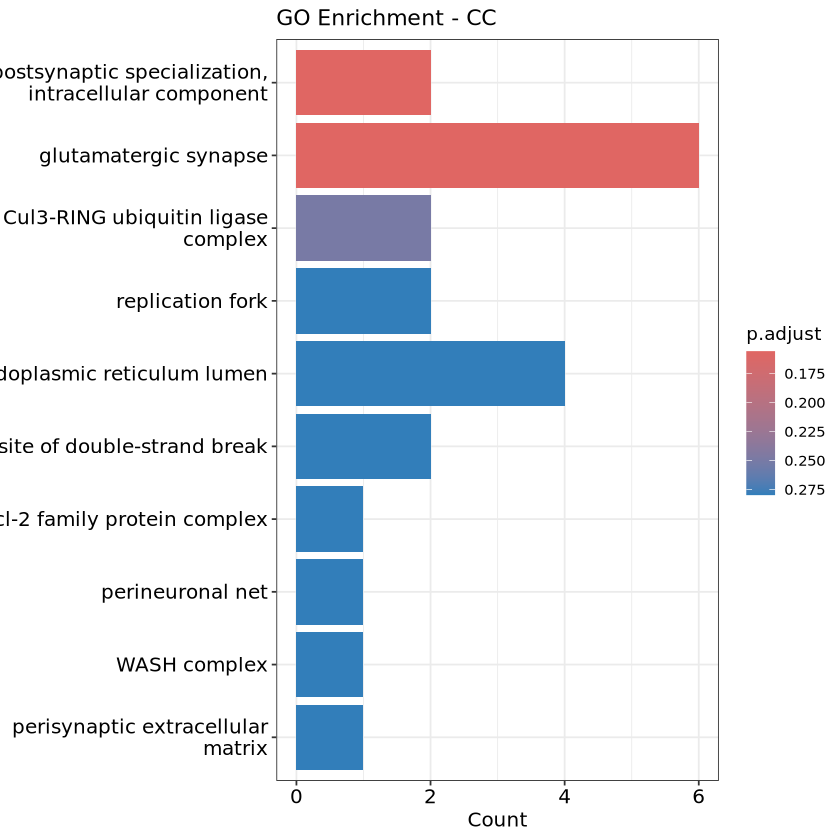

In [84]:
barplot(AD2_Aging2_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [85]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_AD2_Aging2_sig_xqtl_CC.pdf', width = 6, height = 6)

In [135]:
AD2_Aging2_xQTL_ego_mf <- enrichGO(
  gene          = AD2_Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [136]:
head(AD2_Aging2_xQTL_ego_mf, n=5)

ID         Description                                   GeneRatio
GO:0046982 GO:0046982 protein heterodimerization activity           6/69     
GO:0004722 GO:0004722 protein serine/threonine phosphatase activity 3/69     
GO:0015036 GO:0015036 disulfide oxidoreductase activity             2/69     
GO:0019902 GO:0019902 phosphatase binding                           4/69     
GO:0000175 GO:0000175 3'-5'-RNA exonuclease activity                2/69     
           BgRatio   pvalue      p.adjust  qvalue   
GO:0046982 360/21059 0.001159680 0.1949332 0.1648459
GO:0004722 108/21059 0.005376530 0.1949332 0.1648459
GO:0015036 37/21059  0.006543757 0.1949332 0.1648459
GO:0019902 230/21059 0.006884131 0.1949332 0.1648459
GO:0000175 38/21059  0.006892767 0.1949332 0.1648459
           geneID                                                                                         
GO:0046982 ENSG00000196787/ENSG00000275126/ENSG00000203760/ENSG00000110975/ENSG00000120669/ENSG00000171552
GO:0004722 ENSG00000141298/ENSG00000108389/ENSG00000175175                                                
GO:0015036 ENSG00000086619/ENSG00000213593                                                                
GO:0019902 ENSG00000086015/ENSG00000132842/ENSG00000102882/ENSG00000108389                                
GO:0000175 ENSG00000144535/ENSG00000135473                                                                
           Count
GO:0046982 6    
GO:0004722 3    
GO:0015036 2    
GO:0019902 4    
GO:0000175 2

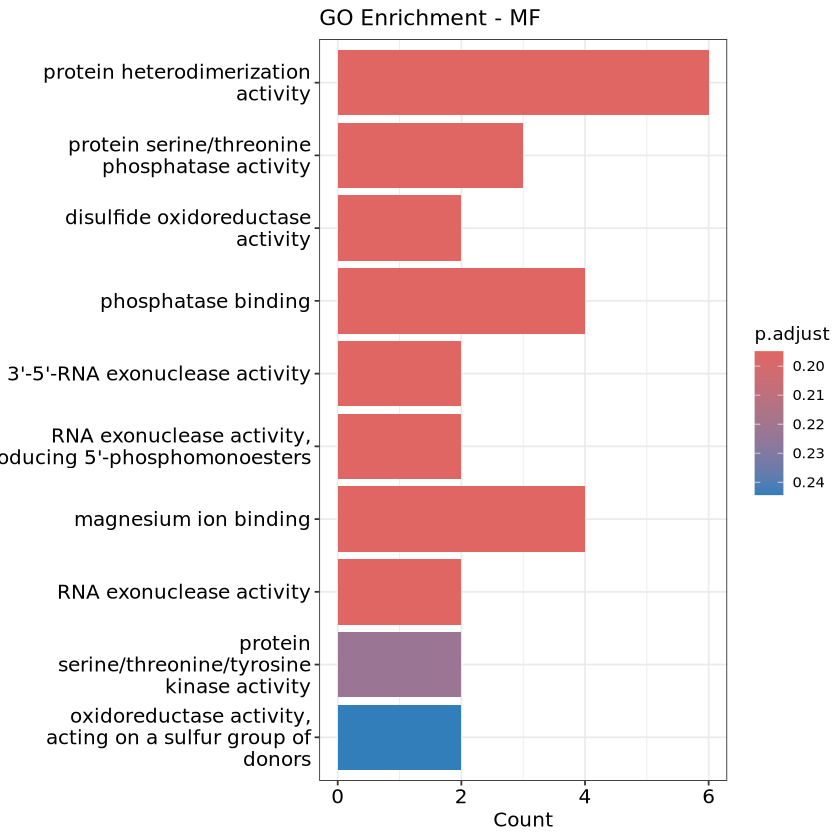

In [137]:
barplot(AD2_Aging2_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

### AD2_Aging4_xQTL

In [58]:
AD2_Aging4_xQTL_ego <- enrichGO(
  gene          = AD2_Aging4_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [60]:
head(AD2_Aging4_xQTL_ego, n=5)

ID         Description                                           
GO:0090090 GO:0090090 negative regulation of canonical Wnt signaling pathway
GO:0061036 GO:0061036 positive regulation of cartilage development          
GO:0030178 GO:0030178 negative regulation of Wnt signaling pathway          
GO:0042181 GO:0042181 ketone biosynthetic process                           
GO:0032330 GO:0032330 regulation of chondrocyte differentiation             
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0090090 5/61      146/21261 6.224292e-05 0.07279405 0.06346743
GO:0061036 3/61      32/21261  1.050419e-04 0.07279405 0.06346743
GO:0030178 5/61      182/21261 1.755718e-04 0.08111415 0.07072153
GO:0042181 3/61      48/21261  3.545237e-04 0.12284248 0.10710349
GO:0032330 3/61      56/21261  5.589990e-04 0.15495451 0.13510122
           geneID                                                                         
GO:0090090 ENSG00000205269/ENSG00000110492/ENSG00000134569/ENSG00000198561/ENSG00000148737
GO:0061036 ENSG00000153162/ENSG00000110492/ENSG00000125965                                
GO:0030178 ENSG00000205269/ENSG00000110492/ENSG00000134569/ENSG00000198561/ENSG00000148737
GO:0042181 ENSG00000153162/ENSG00000135469/ENSG00000123815                                
GO:0032330 ENSG00000153162/ENSG00000110492/ENSG00000125965                                
           Count
GO:0090090 5    
GO:0061036 3    
GO:0030178 5    
GO:0042181 3    
GO:0032330 3

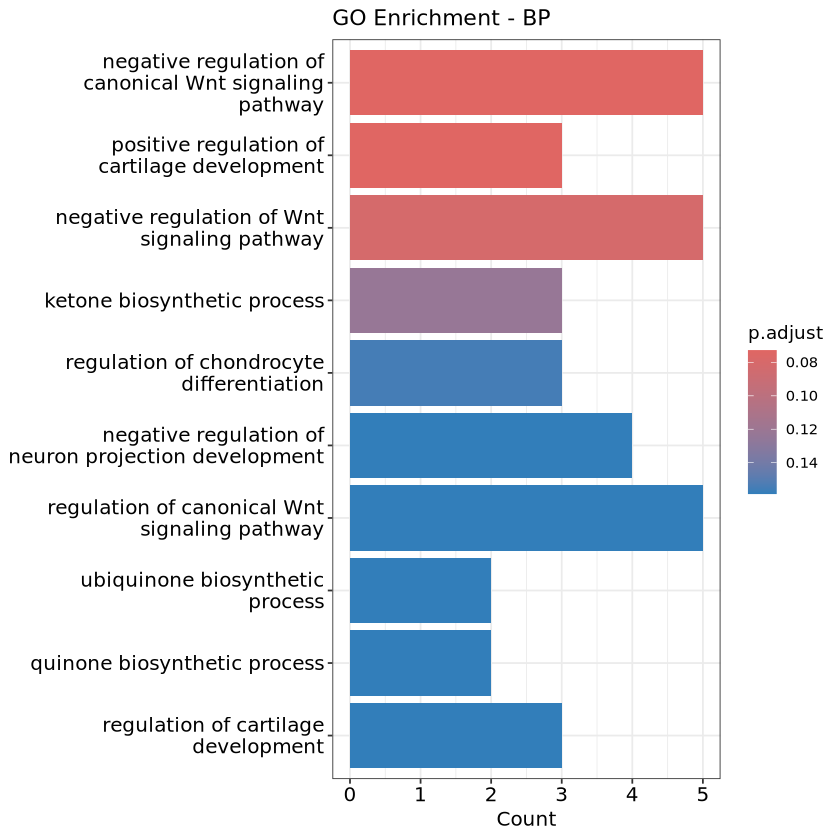

In [61]:
barplot(AD2_Aging4_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [62]:
AD2_Aging4_xQTL_ego_cc <- enrichGO(
  gene          = AD2_Aging4_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [63]:
head(AD2_Aging4_xQTL_ego_cc, n=10)

ID         Description                                         
GO:0099091 GO:0099091 postsynaptic specialization, intracellular component
GO:0090575 GO:0090575 RNA polymerase II transcription regulator complex   
GO:0005788 GO:0005788 endoplasmic reticulum lumen                         
GO:0042564 GO:0042564 NLS-dependent protein nuclear import complex        
GO:0072534 GO:0072534 perineuronal net                                    
GO:0098966 GO:0098966 perisynaptic extracellular matrix                   
GO:0031074 GO:0031074 nucleocytoplasmic transport complex                 
GO:0099535 GO:0099535 synapse-associated extracellular matrix             
GO:0031010 GO:0031010 ISWI-type complex                                   
GO:1990907 GO:1990907 beta-catenin-TCF complex                            
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0099091 2/63      20/22568  0.001410723 0.2243049 0.2123509
GO:0090575 4/63      281/22568 0.007882767 0.4128750 0.3908714
GO:0005788 4/63      337/22568 0.014585202 0.4128750 0.3908714
GO:0042564 1/63      11/22568  0.030288778 0.4128750 0.3908714
GO:0072534 1/63      11/22568  0.030288778 0.4128750 0.3908714
GO:0098966 1/63      12/22568  0.032997108 0.4128750 0.3908714
GO:0031074 1/63      13/22568  0.035697994 0.4128750 0.3908714
GO:0099535 1/63      13/22568  0.035697994 0.4128750 0.3908714
GO:0031010 1/63      14/22568  0.038391456 0.4128750 0.3908714
GO:1990907 1/63      14/22568  0.038391456 0.4128750 0.3908714
           geneID                                                         
GO:0099091 ENSG00000156599/ENSG00000198561                                
GO:0090575 ENSG00000196284/ENSG00000025434/ENSG00000148737/ENSG00000170581
GO:0005788 ENSG00000086619/ENSG00000038427/ENSG00000239264/ENSG00000110944
GO:0042564 ENSG00000182481                                                
GO:0072534 ENSG00000038427                                                
GO:0098966 ENSG00000038427                                                
GO:0031074 ENSG00000182481                                                
GO:0099535 ENSG00000038427                                                
GO:0031010 ENSG00000171634                                                
GO:1990907 ENSG00000148737                                                
           Count
GO:0099091 2    
GO:0090575 4    
GO:0005788 4    
GO:0042564 1    
GO:0072534 1    
GO:0098966 1    
GO:0031074 1    
GO:0099535 1    
GO:0031010 1    
GO:1990907 1

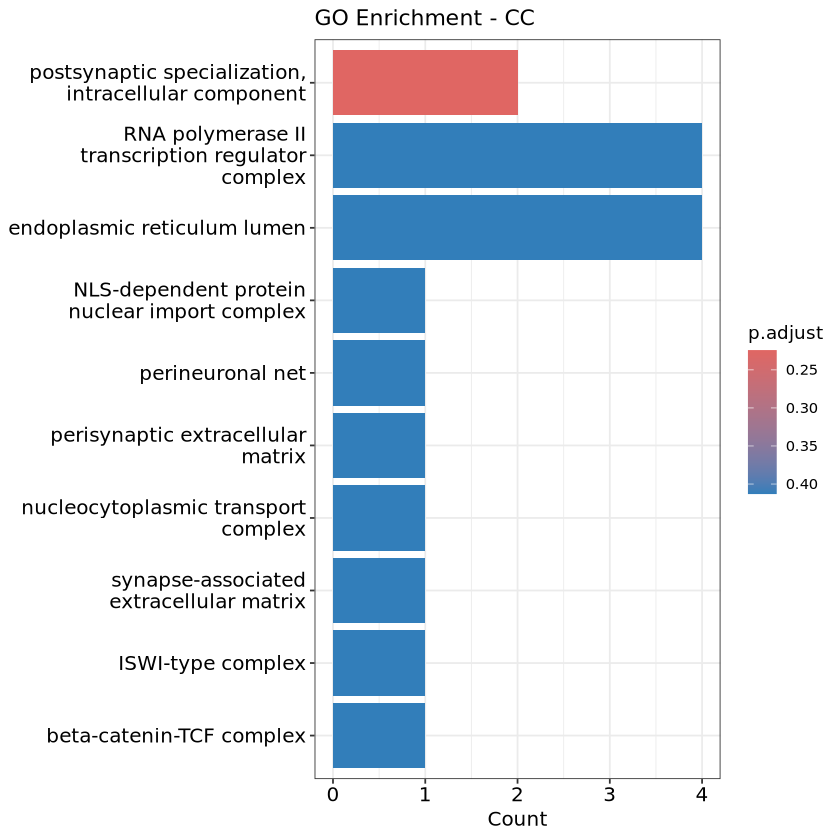

In [64]:
barplot(AD2_Aging4_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [65]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_AD2_Aging2_sig_xqtl_CC.pdf', width = 6, height = 6)

In [66]:
AD2_Aging4_xQTL_ego_mf <- enrichGO(
  gene          = AD2_Aging4_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [67]:
head(AD2_Aging4_xQTL_ego_mf, n=5)

ID        
GO:0015036 GO:0015036
GO:0016667 GO:0016667
GO:0004527 GO:0004527
GO:0015035 GO:0015035
GO:0046982 GO:0046982
           Description                                                
GO:0015036 disulfide oxidoreductase activity                          
GO:0016667 oxidoreductase activity, acting on a sulfur group of donors
GO:0004527 exonuclease activity                                       
GO:0015035 protein-disulfide reductase activity                       
GO:0046982 protein heterodimerization activity                        
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0015036 3/64      37/21059  0.0001932062 0.03844804 0.03315012
GO:0016667 3/64      60/21059  0.0008095807 0.08055328 0.06945350
GO:0004527 3/64      92/21059  0.0027727744 0.18392737 0.15858324
GO:0015035 2/64      30/21059  0.0037439502 0.18626152 0.16059576
GO:0046982 5/64      360/21059 0.0047443432 0.18848580 0.16251355
           geneID                                                                         
GO:0015036 ENSG00000086619/ENSG00000239264/ENSG00000213593                                
GO:0016667 ENSG00000086619/ENSG00000239264/ENSG00000213593                                
GO:0004527 ENSG00000144535/ENSG00000136960/ENSG00000135473                                
GO:0015035 ENSG00000086619/ENSG00000239264                                                
GO:0046982 ENSG00000153162/ENSG00000196787/ENSG00000275126/ENSG00000196284/ENSG00000120669
           Count
GO:0015036 3    
GO:0016667 3    
GO:0004527 3    
GO:0015035 2    
GO:0046982 5

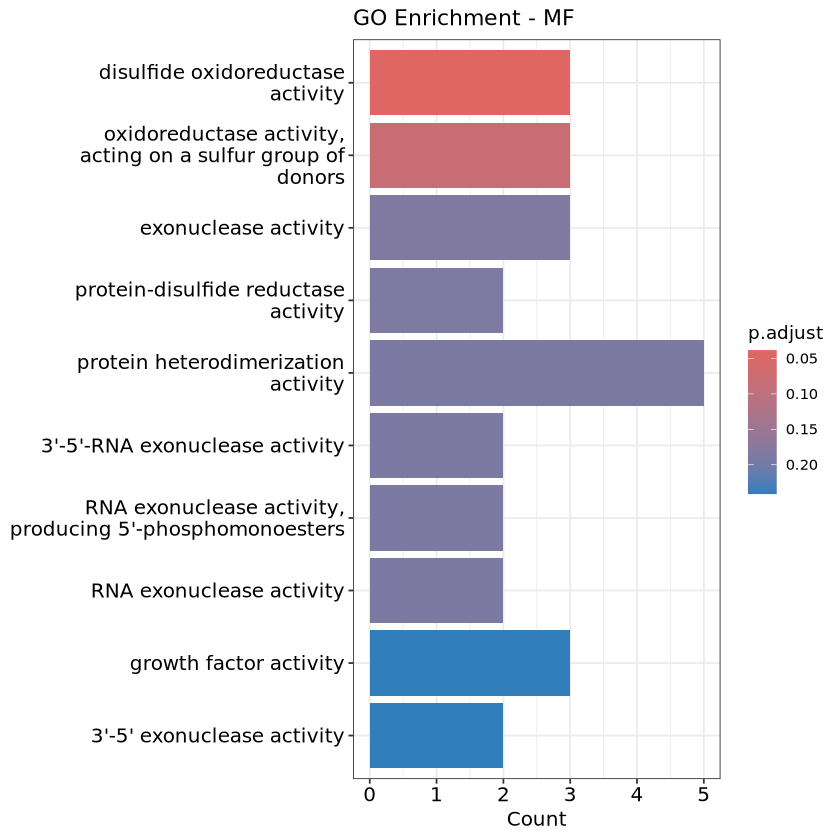

In [68]:
barplot(AD2_Aging4_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

### image_AD1_xQTL list

In [58]:
AD1_xQTL_ego <- enrichGO(
  gene          = AD1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [59]:
head(AD1_xQTL_ego, n=10)

ID         Description                                            
GO:0045739 GO:0045739 positive regulation of DNA repair                      
GO:0007269 GO:0007269 neurotransmitter secretion                             
GO:0099643 GO:0099643 signal release from synapse                            
GO:0035459 GO:0035459 vesicle cargo loading                                  
GO:0098876 GO:0098876 vesicle-mediated transport to the plasma membrane      
GO:0021532 GO:0021532 neural tube patterning                                 
GO:0043524 GO:0043524 negative regulation of neuron apoptotic process        
GO:1902459 GO:1902459 positive regulation of stem cell population maintenance
GO:0048736 GO:0048736 appendage development                                  
GO:0060173 GO:0060173 limb development                                       
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0045739 3/30      142/21261 0.001037641 0.1602033 0.1228935
GO:0007269 3/30      149/21261 0.001192040 0.1602033 0.1228935
GO:0099643 3/30      149/21261 0.001192040 0.1602033 0.1228935
GO:0035459 2/30      40/21261  0.001452078 0.1602033 0.1228935
GO:0098876 3/30      163/21261 0.001542709 0.1602033 0.1228935
GO:0021532 2/30      42/21261  0.001600065 0.1602033 0.1228935
GO:0043524 3/30      176/21261 0.001920877 0.1602033 0.1228935
GO:1902459 2/30      51/21261  0.002350837 0.1602033 0.1228935
GO:0048736 3/30      195/21261 0.002570214 0.1602033 0.1228935
GO:0060173 3/30      195/21261 0.002570214 0.1602033 0.1228935
           geneID                                          Count
GO:0045739 ENSG00000173473/ENSG00000146648/ENSG00000105229 3    
GO:0007269 ENSG00000114646/ENSG00000099940/ENSG00000128271 3    
GO:0099643 ENSG00000114646/ENSG00000099940/ENSG00000128271 3    
GO:0035459 ENSG00000114650/ENSG00000137177                 2    
GO:0098876 ENSG00000188042/ENSG00000137177/ENSG00000138175 3    
GO:0021532 ENSG00000107882/ENSG00000089094                 2    
GO:0043524 ENSG00000089094/ENSG00000125965/ENSG00000128271 3    
GO:1902459 ENSG00000173473/ENSG00000089094                 2    
GO:0048736 ENSG00000146535/ENSG00000125965/ENSG00000105229 3    
GO:0060173 ENSG00000146535/ENSG00000125965/ENSG00000105229 3

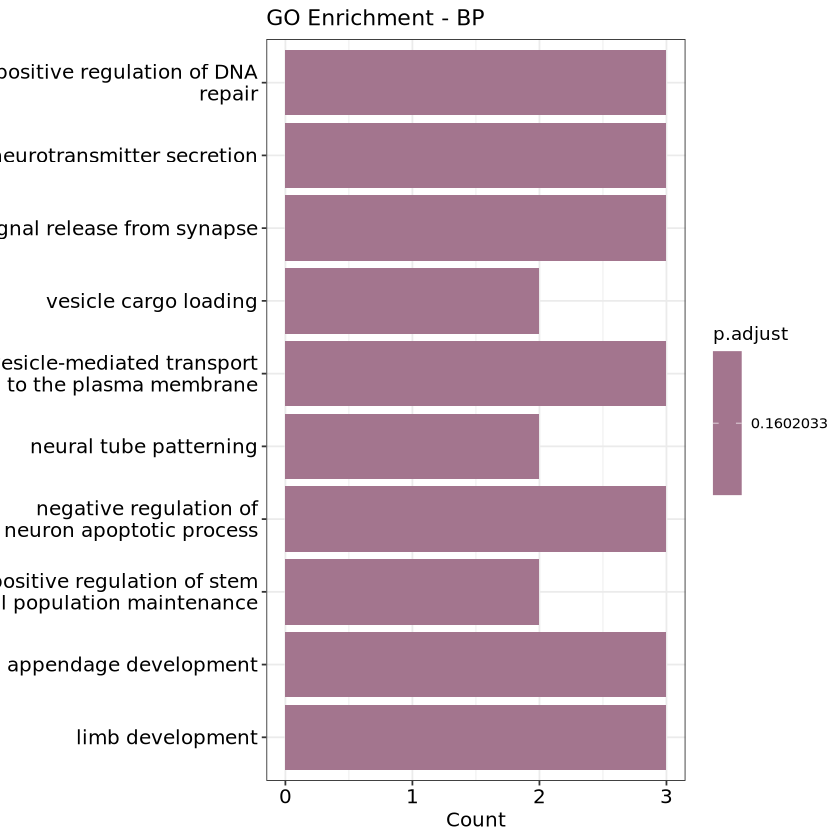

In [60]:
barplot(AD1_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [112]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_AD1_sig_xqtl_GO.pdf', width = 6, height = 6)

In [27]:
AD1_xQTL_ego_cc <- enrichGO(
  gene          = AD1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [28]:
head(AD1_xQTL_ego_cc, n=5)

ID         Description                            GeneRatio
GO:0005875 GO:0005875 microtubule associated complex         3/33     
GO:0031253 GO:0031253 cell projection membrane               4/33     
GO:0030660 GO:0030660 Golgi-associated vesicle membrane      2/33     
GO:0005798 GO:0005798 Golgi-associated vesicle               2/33     
GO:0071014 GO:0071014 post-mRNA release spliceosomal complex 1/33     
           BgRatio   pvalue      p.adjust  qvalue   
GO:0005875 165/22568 0.001782228 0.1531431 0.1367785
GO:0031253 400/22568 0.002649385 0.1531431 0.1367785
GO:0030660 60/22568  0.003480525 0.1531431 0.1367785
GO:0005798 101/22568 0.009566508 0.2317368 0.2069738
GO:0071014 10/22568  0.014529509 0.2317368 0.2069738
           geneID                                                         
GO:0005875 ENSG00000047849/ENSG00000137177/ENSG00000138107                
GO:0031253 ENSG00000146535/ENSG00000146648/ENSG00000099940/ENSG00000128271
GO:0030660 ENSG00000114646/ENSG00000241973                                
GO:0005798 ENSG00000114646/ENSG00000241973                                
GO:0071014 ENSG00000160799                                                
           Count
GO:0005875 3    
GO:0031253 4    
GO:0030660 2    
GO:0005798 2    
GO:0071014 1

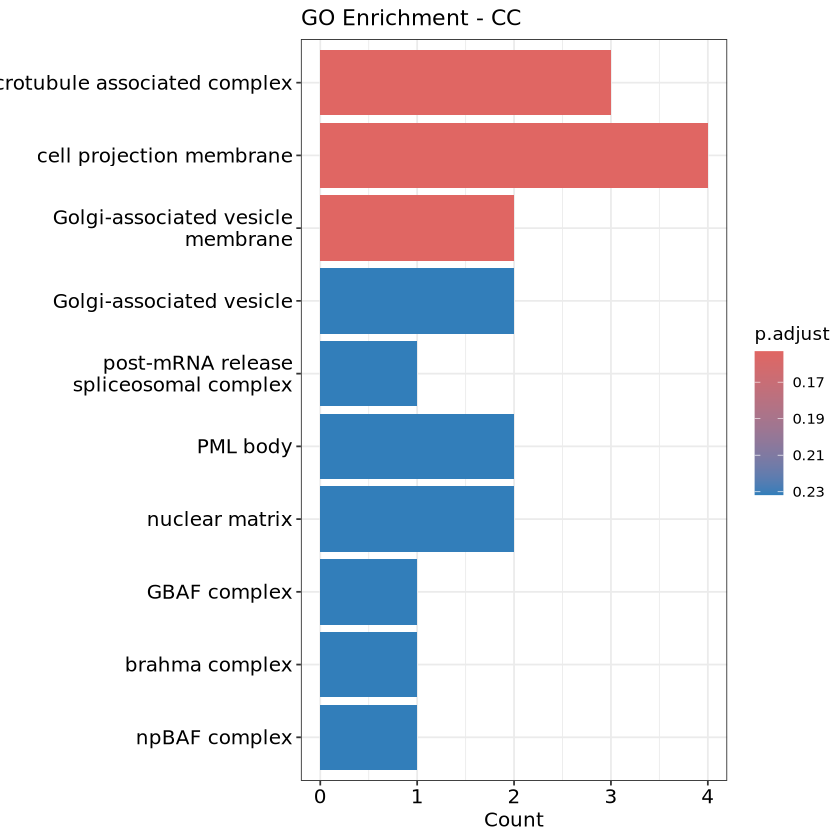

In [29]:
barplot(AD1_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [ ]:
# MAP4, kif13a, ACTR1A 

In [138]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_AD1_sig_xqtl_GO_CC.pdf', width = 6, height = 6)

In [64]:
AD1_xQTL_ego_mf <- enrichGO(
  gene          = AD1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [65]:
head(AD1_xQTL_ego_mf, n=10)

ID         Description                                  GeneRatio
GO:0003924 GO:0003924 GTPase activity                              4/33     
GO:0015631 GO:0015631 tubulin binding                              4/33     
GO:0005525 GO:0005525 GTP binding                                  4/33     
GO:0019001 GO:0019001 guanyl nucleotide binding                    4/33     
GO:0032561 GO:0032561 guanyl ribonucleotide binding                4/33     
GO:0008017 GO:0008017 microtubule binding                          3/33     
GO:0035256 GO:0035256 G protein-coupled glutamate receptor binding 1/33     
GO:0045322 GO:0045322 unmethylated CpG binding                     1/33     
GO:0051864 GO:0051864 histone H3K36 demethylase activity           1/33     
GO:0045296 GO:0045296 cadherin binding                             3/33     
           BgRatio   pvalue      p.adjust  qvalue    
GO:0003924 353/21059 0.002163436 0.1106998 0.08905246
GO:0015631 397/21059 0.003303991 0.1106998 0.08905246
GO:0005525 411/21059 0.003739319 0.1106998 0.08905246
GO:0019001 433/21059 0.004499991 0.1106998 0.08905246
GO:0032561 433/21059 0.004499991 0.1106998 0.08905246
GO:0008017 289/21059 0.010296256 0.1874202 0.15077017
GO:0035256 10/21059  0.015563522 0.1874202 0.15077017
GO:0045322 10/21059  0.015563522 0.1874202 0.15077017
GO:0051864 10/21059  0.015563522 0.1874202 0.15077017
GO:0045296 359/21059 0.018367273 0.1874202 0.15077017
           geneID                                                         
GO:0003924 ENSG00000188042/ENSG00000146535/ENSG00000138175/ENSG00000167658
GO:0015631 ENSG00000188042/ENSG00000047849/ENSG00000137177/ENSG00000138175
GO:0005525 ENSG00000188042/ENSG00000146535/ENSG00000138175/ENSG00000167658
GO:0019001 ENSG00000188042/ENSG00000146535/ENSG00000138175/ENSG00000167658
GO:0032561 ENSG00000188042/ENSG00000146535/ENSG00000138175/ENSG00000167658
GO:0008017 ENSG00000047849/ENSG00000137177/ENSG00000138175                
GO:0035256 ENSG00000128271                                                
GO:0045322 ENSG00000089094                                                
GO:0051864 ENSG00000089094                                                
GO:0045296 ENSG00000146648/ENSG00000167658/ENSG00000241973                
           Count
GO:0003924 4    
GO:0015631 4    
GO:0005525 4    
GO:0019001 4    
GO:0032561 4    
GO:0008017 3    
GO:0035256 1    
GO:0045322 1    
GO:0051864 1    
GO:0045296 3

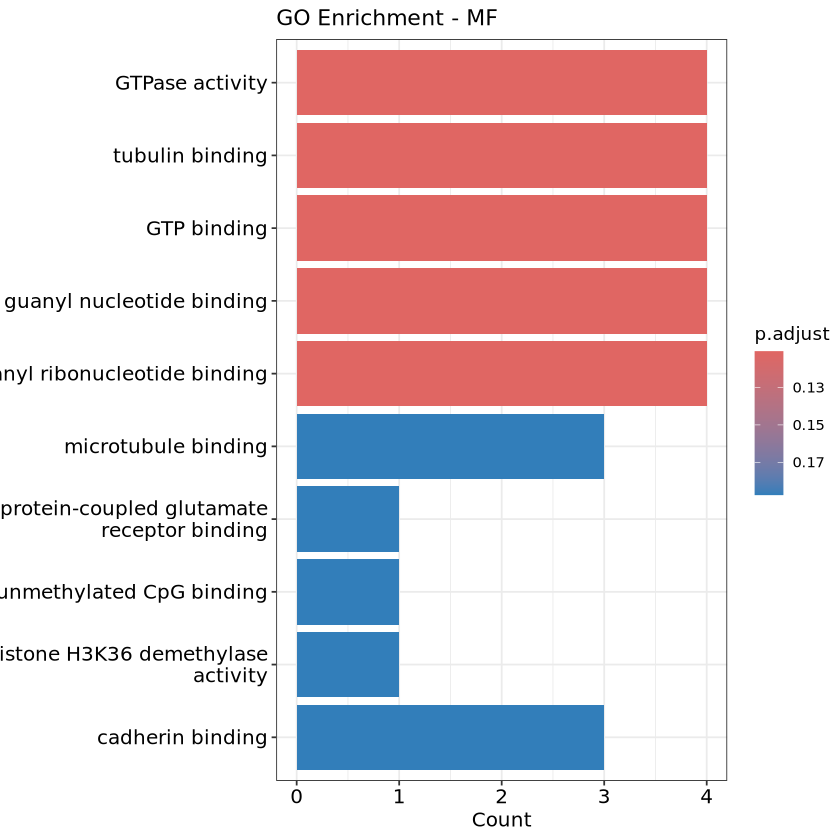

In [66]:
barplot(AD1_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [ ]:
## ALR4C,GAN12(vascular), ARL3, EEF2; MAP4, KIF13A, ADORA2A(vascular), KDM2B

In [151]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_AD1_sig_xqtl_GO_MF.pdf', width = 6, height = 6)

### image_AD2_xQTL list

In [33]:
AD2_xQTL_ego <- enrichGO(
  gene          = AD2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [34]:
head(AD2_xQTL_ego, n=5)

ID         Description                                           
GO:0090090 GO:0090090 negative regulation of canonical Wnt signaling pathway
GO:0030178 GO:0030178 negative regulation of Wnt signaling pathway          
GO:0090023 GO:0090023 positive regulation of neutrophil chemotaxis          
GO:0071624 GO:0071624 positive regulation of granulocyte chemotaxis         
GO:0060828 GO:0060828 regulation of canonical Wnt signaling pathway         
           GeneRatio BgRatio   pvalue       p.adjust  qvalue    
GO:0090090 4/37      146/21261 0.0001181633 0.1174544 0.09079919
GO:0030178 4/37      182/21261 0.0002751401 0.1367446 0.10571173
GO:0090023 2/37      25/21261  0.0008620282 0.1787141 0.13815658
GO:0071624 2/37      28/21261  0.0010825918 0.1787141 0.13815658
GO:0060828 4/37      270/21261 0.0012081057 0.1787141 0.13815658
           geneID                                                         
GO:0090090 ENSG00000205269/ENSG00000110492/ENSG00000134569/ENSG00000198561
GO:0030178 ENSG00000205269/ENSG00000110492/ENSG00000134569/ENSG00000198561
GO:0090023 ENSG00000110492/ENSG00000110944                                
GO:0071624 ENSG00000110492/ENSG00000110944                                
GO:0060828 ENSG00000205269/ENSG00000110492/ENSG00000134569/ENSG00000198561
           Count
GO:0090090 4    
GO:0030178 4    
GO:0090023 2    
GO:0071624 2    
GO:0060828 4

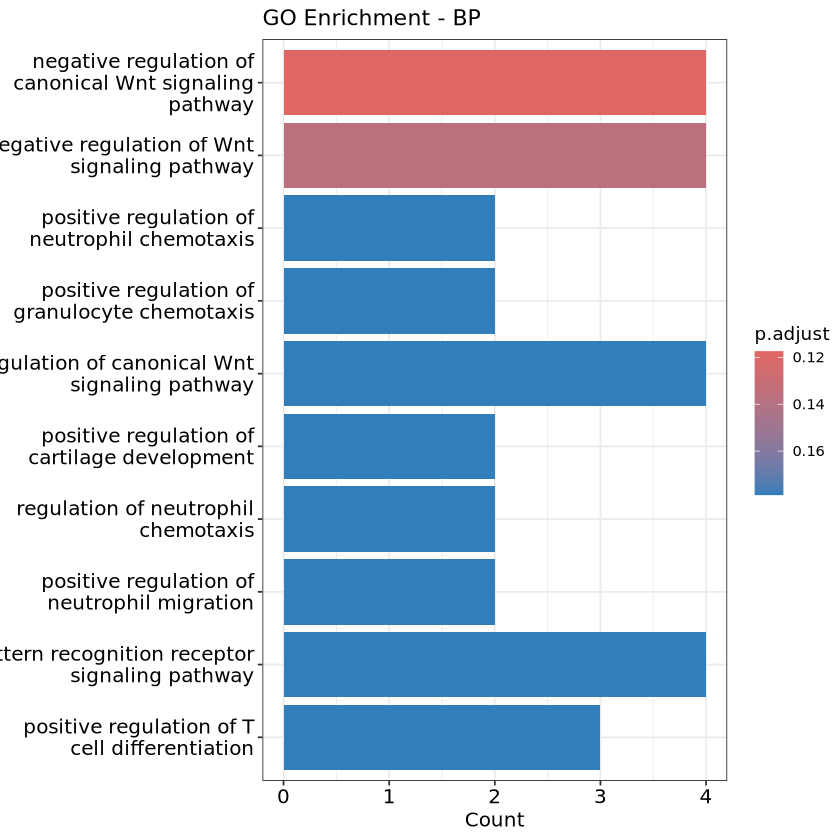

In [35]:
barplot(AD2_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [36]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_AD2_sig_xqtl_GO.pdf', width = 6, height = 6)

In [37]:
AD2_xQTL_ego_cc <- enrichGO(
  gene          = AD2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [38]:
head(AD2_xQTL_ego_cc, n=5)

ID         Description                                         
GO:0099091 GO:0099091 postsynaptic specialization, intracellular component
GO:0035770 GO:0035770 ribonucleoprotein granule                           
GO:0000932 GO:0000932 P-body                                              
GO:0005788 GO:0005788 endoplasmic reticulum lumen                         
GO:0072534 GO:0072534 perineuronal net                                    
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0099091 2/37      20/22568  0.0004877646 0.04780093 0.03850773
GO:0035770 3/37      312/22568 0.0143729507 0.19927034 0.16052928
GO:0000932 2/37      123/22568 0.0173271562 0.19927034 0.16052928
GO:0005788 3/37      337/22568 0.0176272131 0.19927034 0.16052928
GO:0072534 1/37      11/22568  0.0178912055 0.19927034 0.16052928
           geneID                                          Count
GO:0099091 ENSG00000156599/ENSG00000198561                 2    
GO:0035770 ENSG00000144535/ENSG00000136270/ENSG00000135473 3    
GO:0000932 ENSG00000144535/ENSG00000135473                 2    
GO:0005788 ENSG00000086619/ENSG00000038427/ENSG00000110944 3    
GO:0072534 ENSG00000038427                                 1

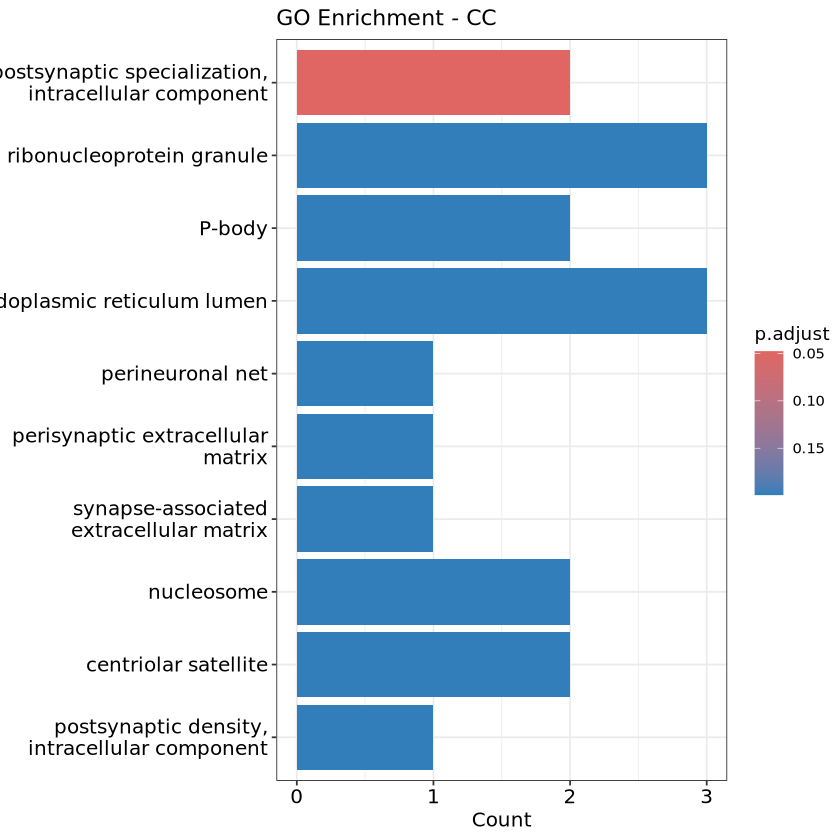

In [39]:
barplot(AD2_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [40]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_AD2_sig_xqtl_GO_CC.pdf', width = 6, height = 6)

In [41]:
AD2_xQTL_ego_mf <- enrichGO(
  gene          = AD2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [42]:
head(AD2_xQTL_ego_mf, n=5)

ID        
GO:0015036 GO:0015036
GO:0000175 GO:0000175
GO:0016896 GO:0016896
GO:0004532 GO:0004532
GO:0016667 GO:0016667
           Description                                                
GO:0015036 disulfide oxidoreductase activity                          
GO:0000175 3'-5'-RNA exonuclease activity                             
GO:0016896 RNA exonuclease activity, producing 5'-phosphomonoesters   
GO:0004532 RNA exonuclease activity                                   
GO:0016667 oxidoreductase activity, acting on a sulfur group of donors
           GeneRatio BgRatio  pvalue      p.adjust   qvalue    
GO:0015036 2/37      37/21059 0.001924423 0.05767216 0.03819800
GO:0000175 2/37      38/21059 0.002029092 0.05767216 0.03819800
GO:0016896 2/37      41/21059 0.002358964 0.05767216 0.03819800
GO:0004532 2/37      43/21059 0.002592007 0.05767216 0.03819800
GO:0016667 2/37      60/21059 0.004986294 0.07409135 0.04907292
           geneID                          Count
GO:0015036 ENSG00000086619/ENSG00000213593 2    
GO:0000175 ENSG00000144535/ENSG00000135473 2    
GO:0016896 ENSG00000144535/ENSG00000135473 2    
GO:0004532 ENSG00000144535/ENSG00000135473 2    
GO:0016667 ENSG00000086619/ENSG00000213593 2

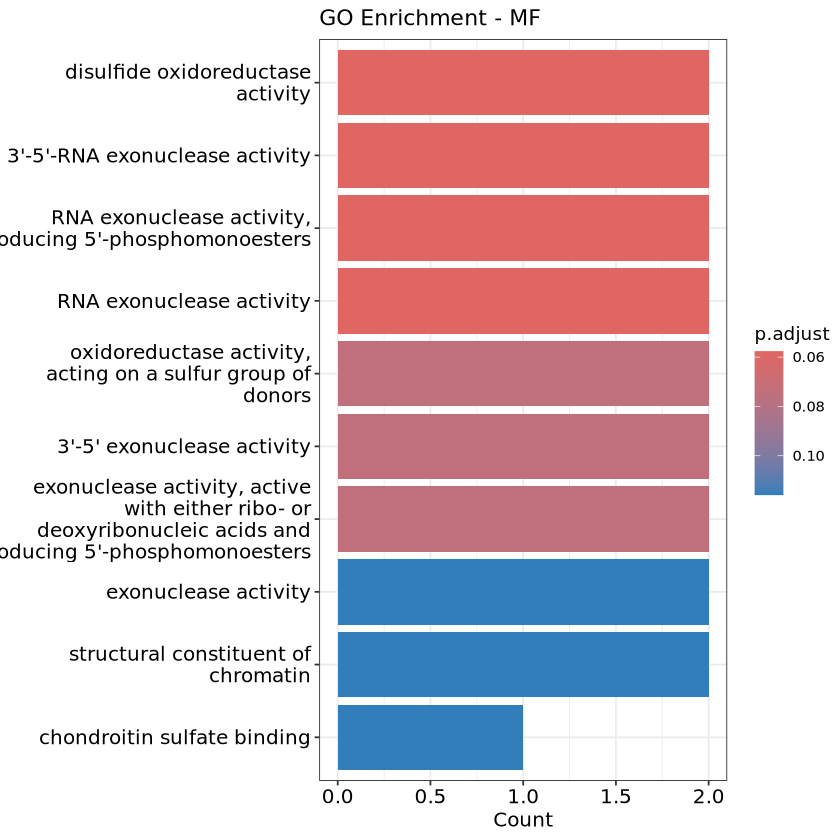

In [43]:
barplot(AD2_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [44]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_AD2_sig_xqtl_GO_MF.pdf', width = 6, height = 6)

### image_Aging1_xQTL list

In [45]:
Aging1_xQTL_ego <- enrichGO(
  gene          = Aging1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [46]:
head(Aging1_xQTL_ego, n=5)

ID         Description                                              
GO:1904869 GO:1904869 regulation of protein localization to Cajal body         
GO:1904871 GO:1904871 positive regulation of protein localization to Cajal body
GO:0006068 GO:0006068 ethanol catabolic process                                
GO:1903405 GO:1903405 protein localization to nuclear body                     
GO:1904867 GO:1904867 protein localization to Cajal body                       
           GeneRatio BgRatio  pvalue       p.adjust  qvalue   
GO:1904869 2/63      12/21261 0.0005595273 0.1271155 0.1207447
GO:1904871 2/63      12/21261 0.0005595273 0.1271155 0.1207447
GO:0006068 2/63      13/21261 0.0006599971 0.1271155 0.1207447
GO:1903405 2/63      13/21261 0.0006599971 0.1271155 0.1207447
GO:1904867 2/63      13/21261 0.0006599971 0.1271155 0.1207447
           geneID                          Count
GO:1904869 ENSG00000120438/ENSG00000146834 2    
GO:1904871 ENSG00000120438/ENSG00000146834 2    
GO:0006068 ENSG00000197165/ENSG00000196502 2    
GO:1903405 ENSG00000120438/ENSG00000146834 2    
GO:1904867 ENSG00000120438/ENSG00000146834 2

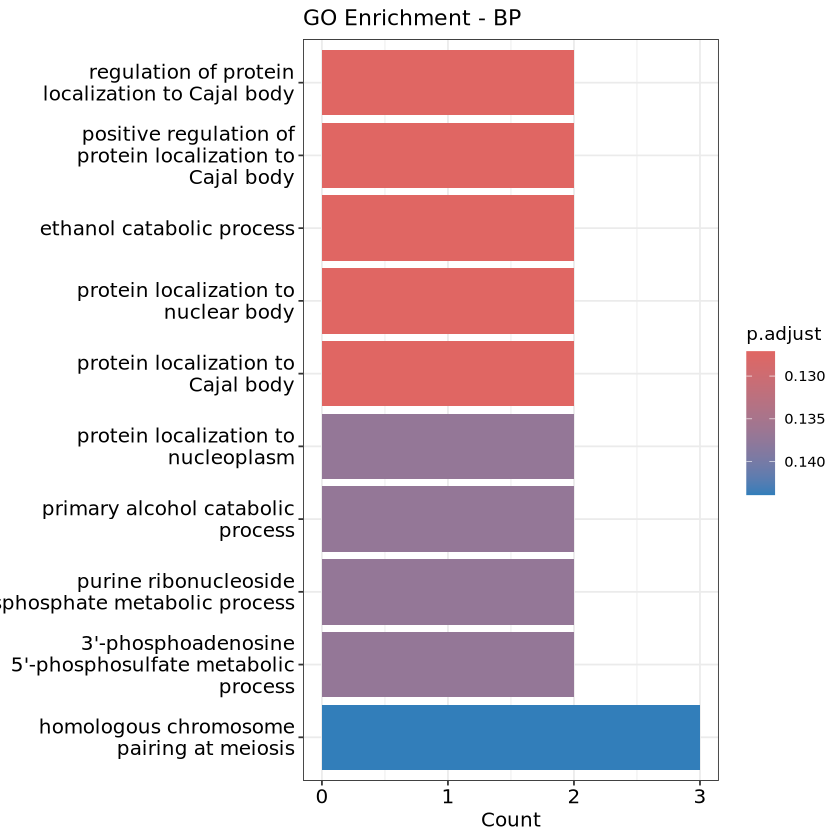

In [47]:
barplot(Aging1_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [21]:
Aging1_xQTL_ego_cc <- enrichGO(
  gene          = Aging1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [22]:
head(Aging1_xQTL_ego_cc, n=5)

ID         Description                       GeneRatio BgRatio  
GO:0030658 GO:0030658 transport vesicle membrane        5/65      350/22568
GO:0034364 GO:0034364 high-density lipoprotein particle 2/65      33/22568 
GO:0000795 GO:0000795 synaptonemal complex              2/65      42/22568 
GO:0099086 GO:0099086 synaptonemal structure            2/65      42/22568 
GO:0034358 GO:0034358 plasma lipoprotein particle       2/65      44/22568 
           pvalue      p.adjust  qvalue   
GO:0030658 0.003364348 0.1898705 0.1645936
GO:0034364 0.004071506 0.1898705 0.1645936
GO:0000795 0.006529715 0.1898705 0.1645936
GO:0099086 0.006529715 0.1898705 0.1645936
GO:0034358 0.007147881 0.1898705 0.1645936
           geneID                                                                         
GO:0030658 ENSG00000138674/ENSG00000206503/ENSG00000170348/ENSG00000171552/ENSG00000101152
GO:0034364 ENSG00000148965/ENSG00000134339                                                
GO:0000795 ENSG00000066923/ENSG00000119684                                                
GO:0099086 ENSG00000066923/ENSG00000119684                                                
GO:0034358 ENSG00000148965/ENSG00000134339                                                
           Count
GO:0030658 5    
GO:0034364 2    
GO:0000795 2    
GO:0099086 2    
GO:0034358 2

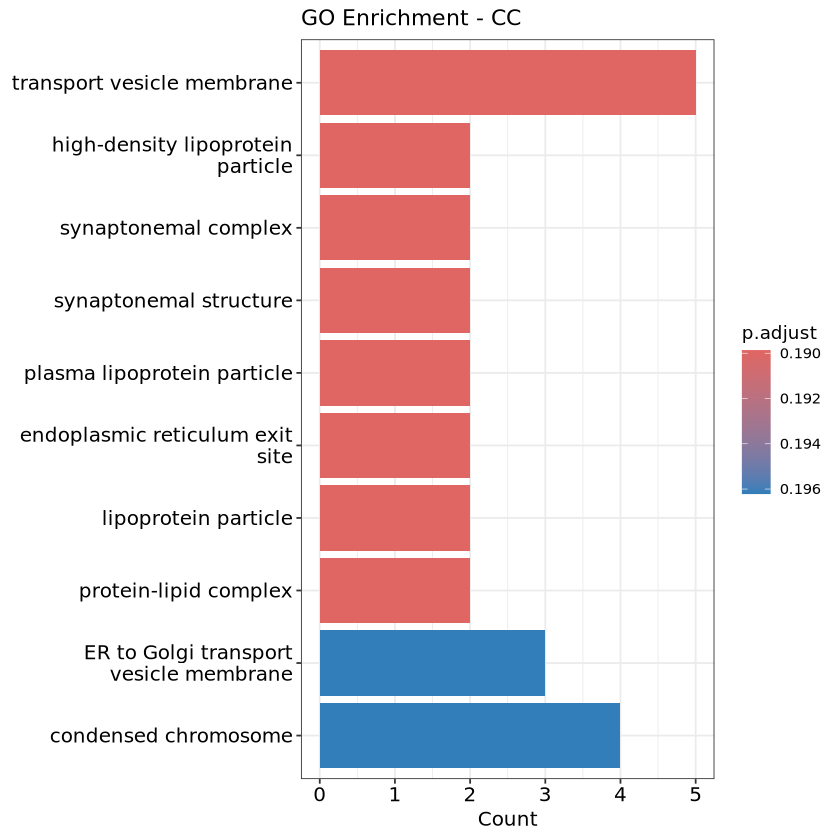

In [23]:
barplot(Aging1_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [24]:
Aging1_xQTL_ego_mf <- enrichGO(
  gene          = Aging1_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [25]:
head(Aging1_xQTL_ego_mf, n=5)

ID         Description                                         
GO:0004062 GO:0004062 aryl sulfotransferase activity                      
GO:0008135 GO:0008135 translation factor activity, RNA binding            
GO:0090079 GO:0090079 translation regulator activity, nucleic acid binding
GO:0042288 GO:0042288 MHC class I protein binding                         
GO:0003743 GO:0003743 translation initiation factor activity              
           GeneRatio BgRatio   pvalue       p.adjust   qvalue   
GO:0004062 2/63      10/21059  0.0003902818 0.06947017 0.0608018
GO:0008135 3/63      97/21059  0.0030798084 0.25407693 0.2223737
GO:0090079 3/63      123/21059 0.0059831819 0.25407693 0.2223737
GO:0042288 2/63      51/21059  0.0102201097 0.25407693 0.2223737
GO:0003743 2/63      52/21059  0.0106085975 0.25407693 0.2223737
           geneID                                          Count
GO:0004062 ENSG00000197165/ENSG00000196502                 2    
GO:0008135 ENSG00000119718/ENSG00000184110/ENSG00000178952 3    
GO:0090079 ENSG00000119718/ENSG00000184110/ENSG00000178952 3    
GO:0042288 ENSG00000121716/ENSG00000085514                 2    
GO:0003743 ENSG00000119718/ENSG00000184110                 2

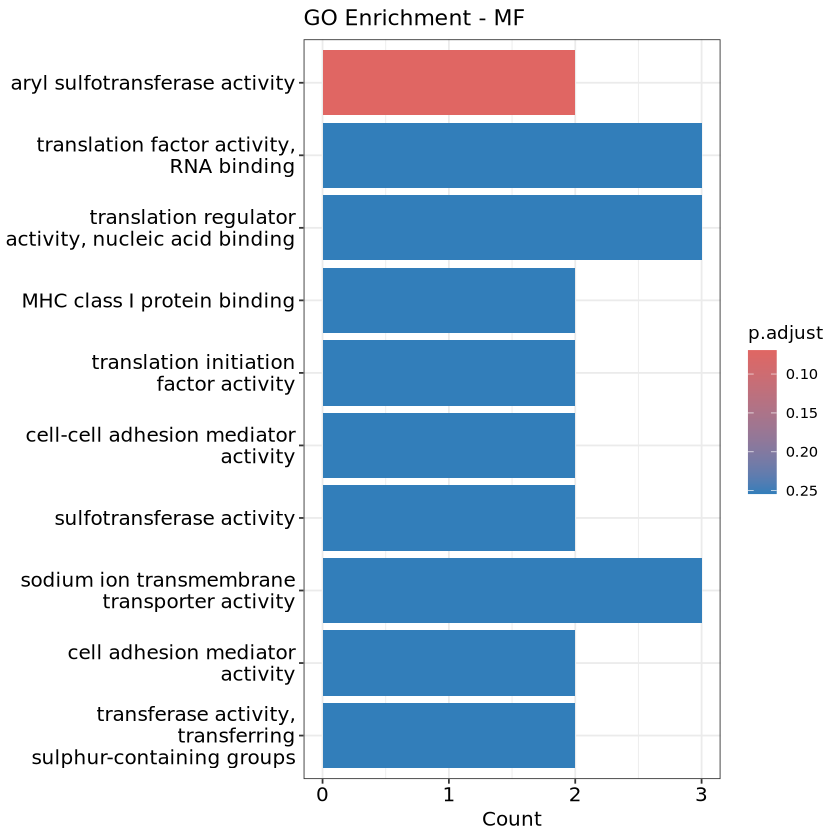

In [26]:
barplot(Aging1_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

### image_Aging2_xQTL list

In [48]:
Aging2_xQTL_ego <- enrichGO(
  gene          = Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [49]:
head(Aging2_xQTL_ego, n=5)

ID         Description                                            
GO:0000724 GO:0000724 double-strand break repair via homologous recombination
GO:0000723 GO:0000723 telomere maintenance                                   
GO:0000725 GO:0000725 recombinational repair                                 
GO:0032200 GO:0032200 telomere organization                                  
GO:0006470 GO:0006470 protein dephosphorylation                              
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0000724 3/38      182/21261 0.004176545 0.2827049 0.2476512
GO:0000723 3/38      185/21261 0.004371590 0.2827049 0.2476512
GO:0000725 3/38      186/21261 0.004437817 0.2827049 0.2476512
GO:0032200 3/38      218/21261 0.006887002 0.2827049 0.2476512
GO:0006470 3/38      229/21261 0.007881648 0.2827049 0.2476512
           geneID                                          Count
GO:0000724 ENSG00000106399/ENSG00000185480/ENSG00000108384 3    
GO:0000723 ENSG00000106399/ENSG00000102882/ENSG00000108384 3    
GO:0000725 ENSG00000106399/ENSG00000185480/ENSG00000108384 3    
GO:0032200 ENSG00000106399/ENSG00000102882/ENSG00000108384 3    
GO:0006470 ENSG00000141298/ENSG00000108389/ENSG00000175175 3

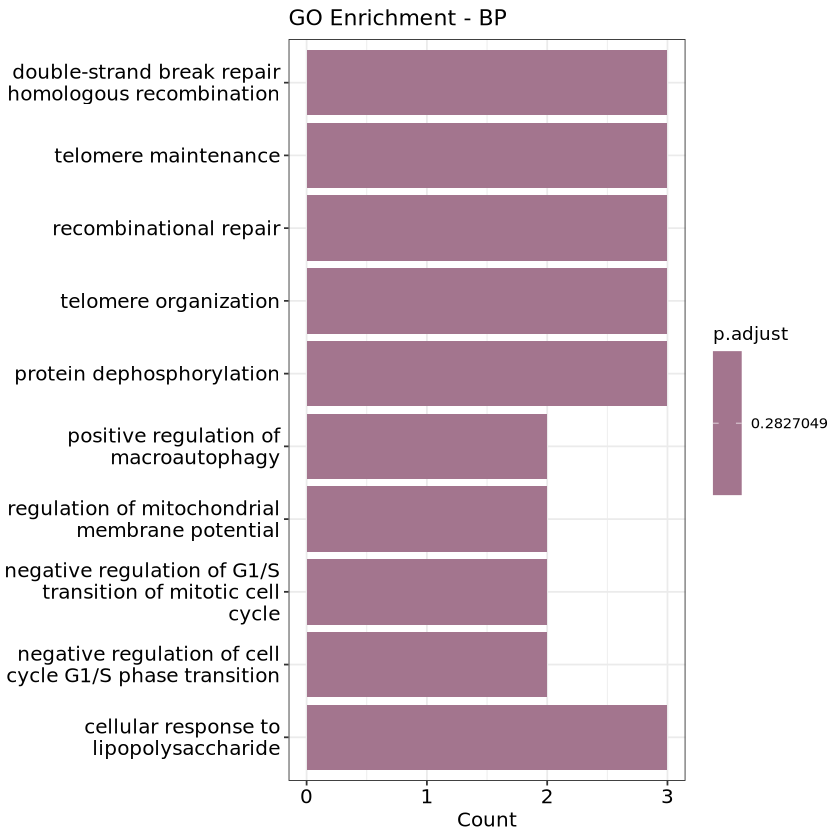

In [50]:
barplot(Aging2_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [125]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_Aging2_sig_xqtl_GO.pdf', width = 6, height = 6)

In [51]:
Aging2_xQTL_ego_cc <- enrichGO(
  gene          = Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [52]:
head(Aging2_xQTL_ego_cc, n=5)

ID         Description                        GeneRatio BgRatio  
GO:0031463 GO:0031463 Cul3-RING ubiquitin ligase complex 2/38      36/22568 
GO:0005657 GO:0005657 replication fork                   2/38      67/22568 
GO:0005643 GO:0005643 nuclear pore                       2/38      101/22568
GO:0031901 GO:0031901 early endosome membrane            3/38      292/22568
GO:0097136 GO:0097136 Bcl-2 family protein complex       1/38      10/22568 
           pvalue      p.adjust  qvalue    
GO:0031463 0.001677538 0.1191052 0.09005729
GO:0005657 0.005697249 0.1282457 0.09696854
GO:0005643 0.012554098 0.1282457 0.09696854
GO:0031901 0.012949367 0.1282457 0.09696854
GO:0097136 0.016714297 0.1282457 0.09696854
           geneID                                          Count
GO:0031463 ENSG00000122550/ENSG00000174943                 2    
GO:0005657 ENSG00000106399/ENSG00000108384                 2    
GO:0005643 ENSG00000136243/ENSG00000183426                 2    
GO:0031901 ENSG00000136235/ENSG00000120860/ENSG00000108389 3    
GO:0097136 ENSG00000171552                                 1

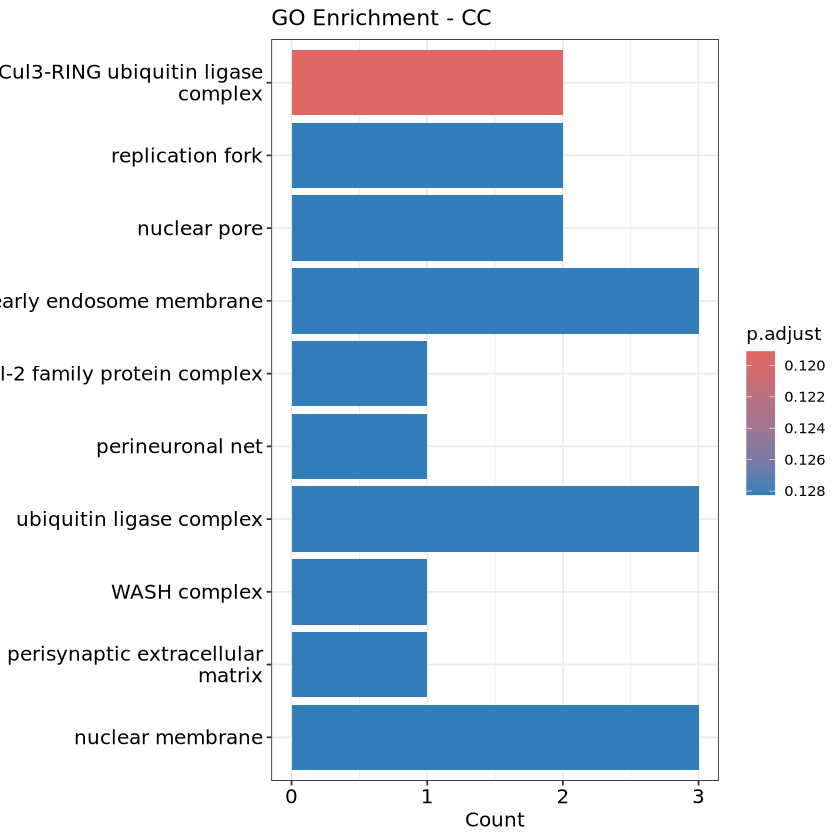

In [53]:
barplot(Aging2_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [18]:
Aging2_xQTL_ego_mf <- enrichGO(
  gene          = Aging2_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [19]:
head(Aging2_xQTL_ego_mf, n=5)

ID         Description                                      
GO:0004722 GO:0004722 protein serine/threonine phosphatase activity    
GO:0004712 GO:0004712 protein serine/threonine/tyrosine kinase activity
GO:0046982 GO:0046982 protein heterodimerization activity              
GO:0106310 GO:0106310 protein serine kinase activity                   
GO:0004721 GO:0004721 phosphoprotein phosphatase activity              
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0004722 3/38      108/21059 0.0009710714 0.09535347 0.07391034
GO:0004712 2/38      49/21059  0.0035344156 0.09535347 0.07391034
GO:0046982 4/38      360/21059 0.0039193276 0.09535347 0.07391034
GO:0106310 4/38      377/21059 0.0046154745 0.09535347 0.07391034
GO:0004721 3/38      192/21059 0.0049778047 0.09535347 0.07391034
           geneID                                                         
GO:0004722 ENSG00000141298/ENSG00000108389/ENSG00000175175                
GO:0004712 ENSG00000127334/ENSG00000102882                                
GO:0046982 ENSG00000203760/ENSG00000110975/ENSG00000120669/ENSG00000171552
GO:0106310 ENSG00000086015/ENSG00000069020/ENSG00000127334/ENSG00000102882
GO:0004721 ENSG00000141298/ENSG00000108389/ENSG00000175175                
           Count
GO:0004722 3    
GO:0004712 2    
GO:0046982 4    
GO:0106310 4    
GO:0004721 3

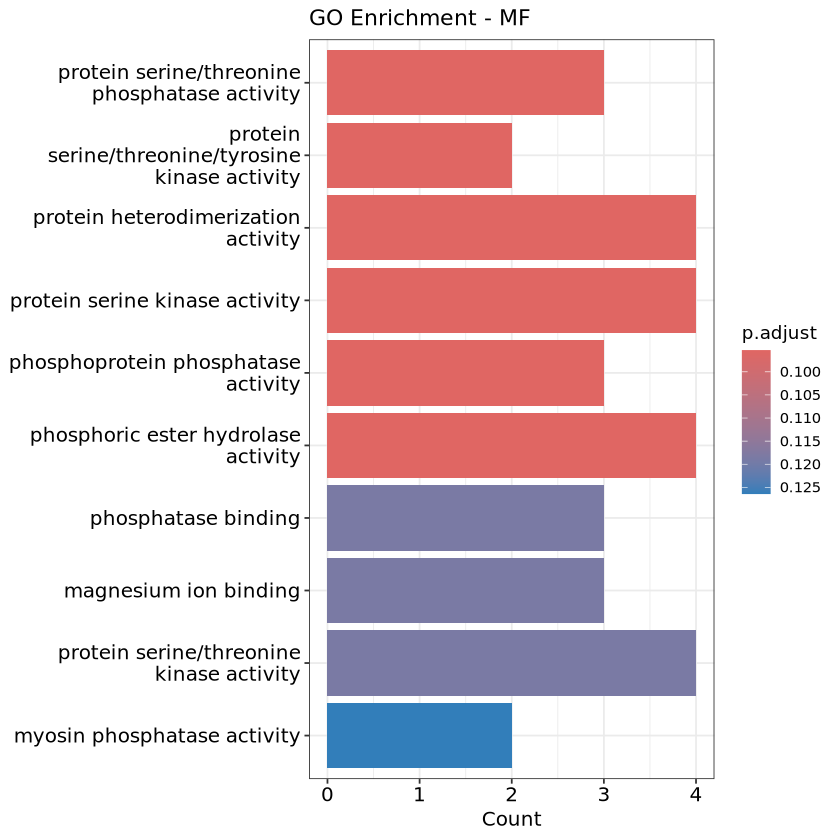

In [20]:
barplot(Aging2_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

### image_Aging3_xQTL list

In [57]:
Aging3_xQTL_ego <- enrichGO(
  gene          = Aging3_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [58]:
head(Aging3_xQTL_ego, n=5)

ID         Description                             GeneRatio
GO:0031281 GO:0031281 positive regulation of cyclase activity 3/43     
GO:0035934 GO:0035934 corticosterone secretion                2/43     
GO:0051866 GO:0051866 general adaptation syndrome             2/43     
GO:0051458 GO:0051458 corticotropin secretion                 2/43     
GO:0031279 GO:0031279 regulation of cyclase activity          3/43     
           BgRatio  pvalue       p.adjust   qvalue    
GO:0031281 45/21261 0.0001030540 0.05737133 0.04687434
GO:0035934 10/21261 0.0001779571 0.05737133 0.04687434
GO:0051866 10/21261 0.0001779571 0.05737133 0.04687434
GO:0051458 11/21261 0.0002172238 0.05737133 0.04687434
GO:0031279 61/21261 0.0002555519 0.05737133 0.04687434
           geneID                                          Count
GO:0031281 ENSG00000102882/ENSG00000263715/ENSG00000120088 3    
GO:0035934 ENSG00000263715/ENSG00000120088                 2    
GO:0051866 ENSG00000263715/ENSG00000120088                 2    
GO:0051458 ENSG00000263715/ENSG00000120088                 2    
GO:0031279 ENSG00000102882/ENSG00000263715/ENSG00000120088 3

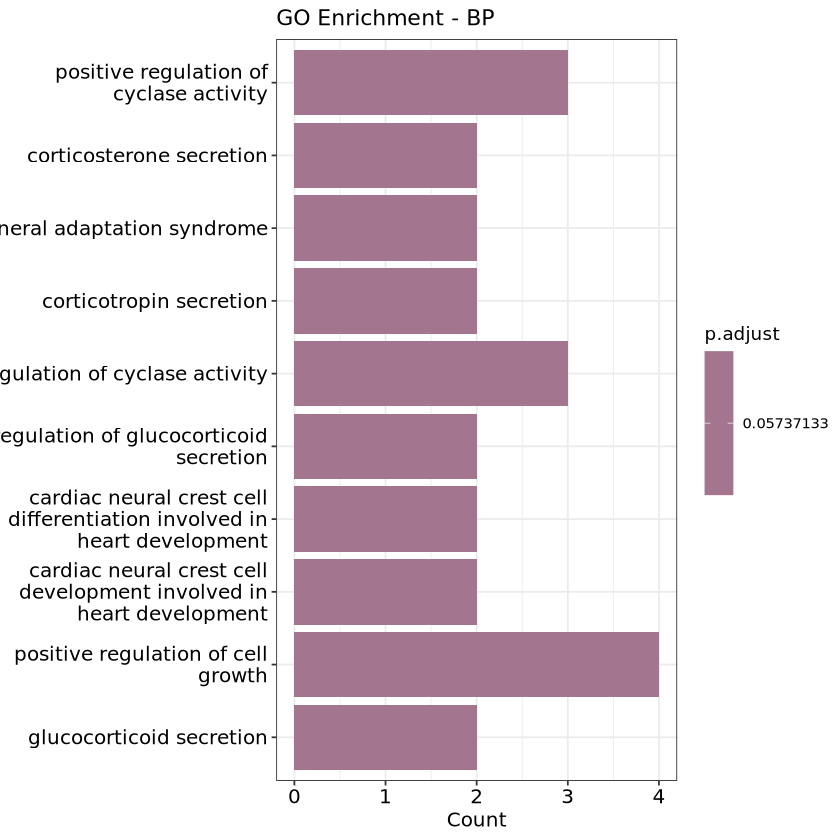

In [59]:
barplot(Aging3_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [60]:
Aging3_xQTL_ego_cc <- enrichGO(
  gene          = Aging3_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [61]:
head(Aging3_xQTL_ego_cc, n=5)

ID         Description                GeneRatio BgRatio  
GO:0044754 GO:0044754 autolysosome               2/46      16/22568 
GO:0005767 GO:0005767 secondary lysosome         2/46      23/22568 
GO:0030673 GO:0030673 axolemma                   2/46      26/22568 
GO:0031256 GO:0031256 leading edge membrane      3/46      200/22568
GO:0032589 GO:0032589 neuron projection membrane 2/46      71/22568 
           pvalue       p.adjust   qvalue    
GO:0044754 0.0004789418 0.06530096 0.05481058
GO:0005767 0.0010006367 0.06530096 0.05481058
GO:0030673 0.0012804111 0.06530096 0.05481058
GO:0031256 0.0078666363 0.18738498 0.15728220
GO:0032589 0.0092368781 0.18738498 0.15728220
           geneID                                          Count
GO:0044754 ENSG00000225190/ENSG00000101460                 2    
GO:0005767 ENSG00000225190/ENSG00000101460                 2    
GO:0030673 ENSG00000115306/ENSG00000186868                 2    
GO:0031256 ENSG00000070831/ENSG00000115306/ENSG00000186868 3    
GO:0032589 ENSG00000115306/ENSG00000186868                 2

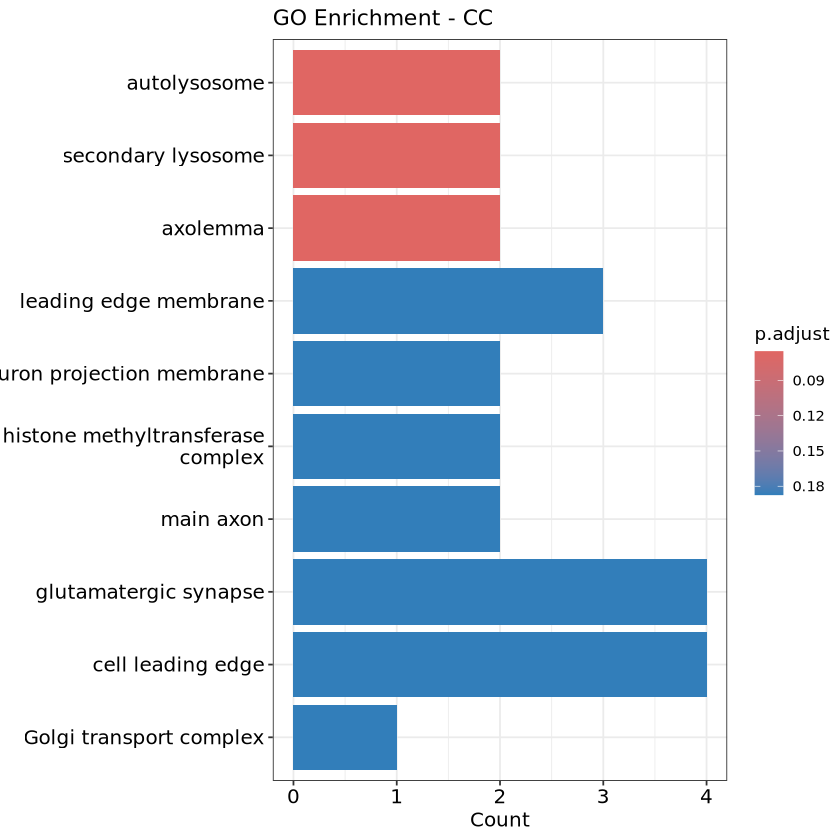

In [70]:
barplot(Aging3_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [71]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_Aging3_sig_xqtl_CC.pdf', width = 6, height = 6)

PLEKHM1,MAP1LC3A, MAPT,STPBN1, CDC42,DOC2A,MAPK3,SPTBN1,MAP1LC3A are highly related with mitophagy.

In [67]:
Aging3_xQTL_ego_mf <- enrichGO(
  gene          = Aging3_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [68]:
head(Aging3_xQTL_ego_mf, n=10)

ID         Description                                            
GO:0019902 GO:0019902 phosphatase binding                                    
GO:0017046 GO:0017046 peptide hormone binding                                
GO:0030674 GO:0030674 protein-macromolecule adaptor activity                 
GO:0042562 GO:0042562 hormone binding                                        
GO:0051213 GO:0051213 dioxygenase activity                                   
GO:0031996 GO:0031996 thioesterase binding                                   
GO:0042500 GO:0042500 aspartic endopeptidase activity, intramembrane cleaving
GO:0045322 GO:0045322 unmethylated CpG binding                               
GO:0051864 GO:0051864 histone H3K36 demethylase activity                     
GO:1990763 GO:1990763 arrestin family protein binding                        
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0019902 4/43      230/21059 0.001224892 0.1709753 0.1321328
GO:0017046 2/43      55/21059  0.005646654 0.1709753 0.1321328
GO:0030674 4/43      459/21059 0.014061696 0.1709753 0.1321328
GO:0042562 2/43      92/21059  0.015176920 0.1709753 0.1321328
GO:0051213 2/43      96/21059  0.016448248 0.1709753 0.1321328
GO:0031996 1/43      10/21059  0.020236508 0.1709753 0.1321328
GO:0042500 1/43      10/21059  0.020236508 0.1709753 0.1321328
GO:0045322 1/43      10/21059  0.020236508 0.1709753 0.1321328
GO:0051864 1/43      10/21059  0.020236508 0.1709753 0.1321328
GO:1990763 1/43      10/21059  0.020236508 0.1709753 0.1321328
           geneID                                                         
GO:0019902 ENSG00000185950/ENSG00000102882/ENSG00000186868/ENSG00000100991
GO:0017046 ENSG00000263715/ENSG00000120088                                
GO:0030674 ENSG00000185950/ENSG00000186868/ENSG00000100991/ENSG00000100242
GO:0042562 ENSG00000263715/ENSG00000120088                                
GO:0051213 ENSG00000089094/ENSG00000174939                                
GO:0031996 ENSG00000070831                                                
GO:0042500 ENSG00000185294                                                
GO:0045322 ENSG00000089094                                                
GO:0051864 ENSG00000089094                                                
GO:1990763 ENSG00000078747                                                
           Count
GO:0019902 4    
GO:0017046 2    
GO:0030674 4    
GO:0042562 2    
GO:0051213 2    
GO:0031996 1    
GO:0042500 1    
GO:0045322 1    
GO:0051864 1    
GO:1990763 1

GTPase activity: CDC42,ARL17B, ARL17A, ATPBP1(Ubiquitination of ABCE1 by NOT4 in Response to Mitochondrial Damage Links Co-translational Quality Control to PINK1-Directed Mitophagy)

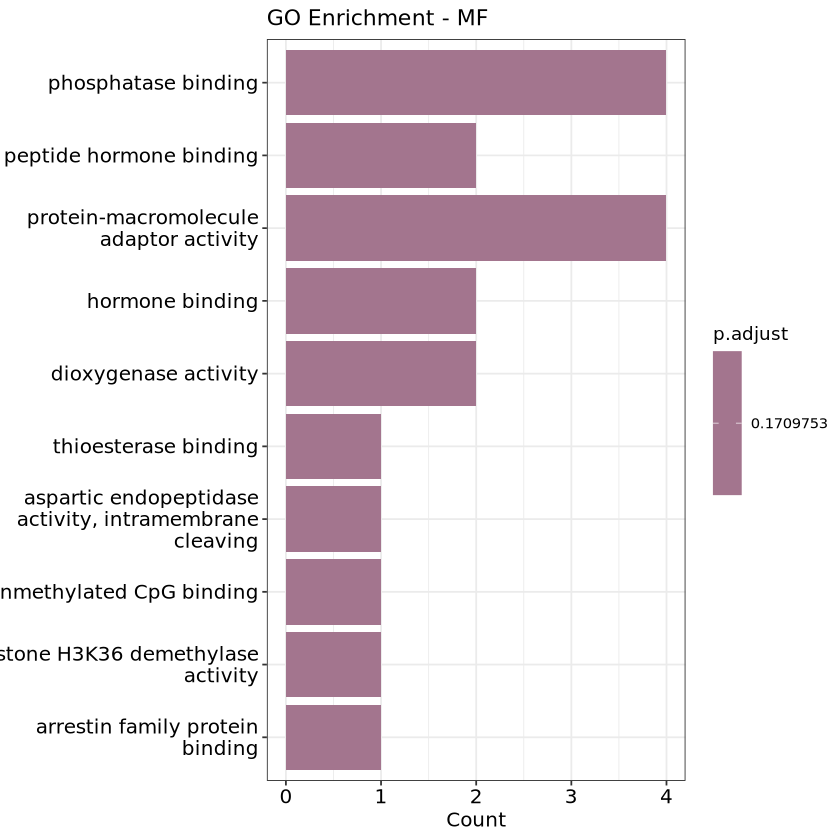

In [69]:
barplot(Aging3_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

In [36]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_Aging3_sig_xqtl_MF.pdf', width = 6, height = 6)

### image_Aging4_xQTL list

In [79]:
Aging4_xQTL_ego <- enrichGO(
  gene          = Aging4_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [80]:
head(Aging4_xQTL_ego, n=5)

ID         Description                     GeneRatio BgRatio 
GO:0042181 GO:0042181 ketone biosynthetic process     3/33      48/21261
GO:0006744 GO:0006744 ubiquinone biosynthetic process 2/33      17/21261
GO:1901663 GO:1901663 quinone biosynthetic process    2/33      17/21261
GO:0006743 GO:0006743 ubiquinone metabolic process    2/33      19/21261
GO:0032026 GO:0032026 response to magnesium ion       2/33      20/21261
           pvalue       p.adjust   qvalue    
GO:0042181 5.618245e-05 0.05022711 0.04210727
GO:0006744 3.131293e-04 0.07799028 0.06538218
GO:1901663 3.131293e-04 0.07799028 0.06538218
GO:0006743 3.929500e-04 0.07799028 0.06538218
GO:0032026 4.361873e-04 0.07799028 0.06538218
           geneID                                          Count
GO:0042181 ENSG00000153162/ENSG00000135469/ENSG00000123815 3    
GO:0006744 ENSG00000135469/ENSG00000123815                 2    
GO:1901663 ENSG00000135469/ENSG00000123815                 2    
GO:0006743 ENSG00000135469/ENSG00000123815                 2    
GO:0032026 ENSG00000133065/ENSG00000153162                 2

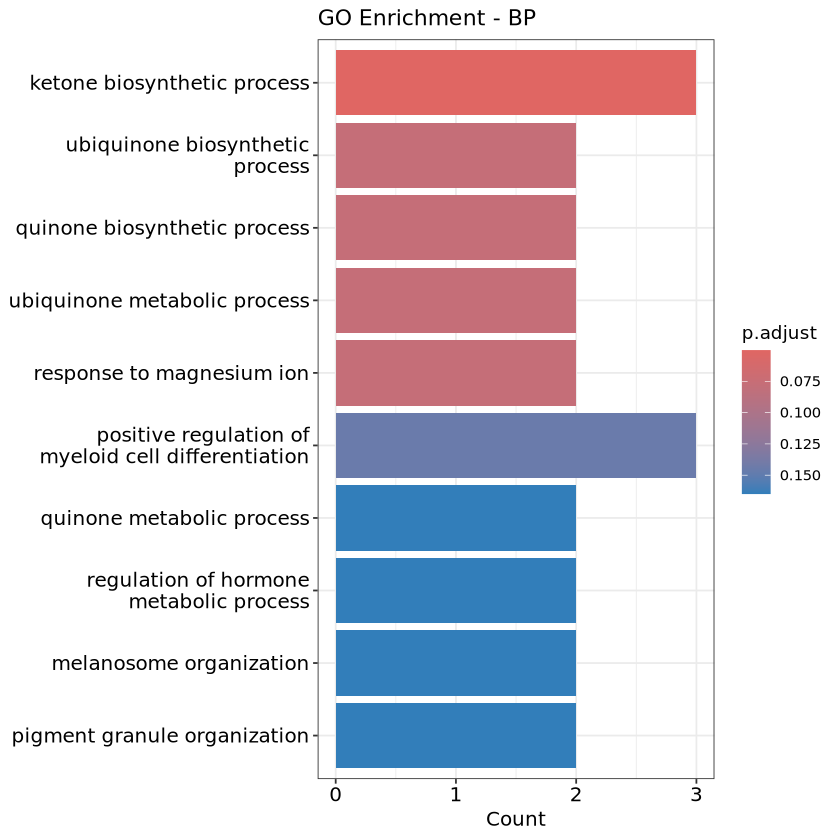

In [81]:
barplot(Aging4_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [85]:
Aging4_xQTL_ego_cc <- enrichGO(
  gene          = Aging4_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [86]:
head(Aging4_xQTL_ego_cc, n=5)

ID         Description                                      
GO:0090575 GO:0090575 RNA polymerase II transcription regulator complex
GO:0005788 GO:0005788 endoplasmic reticulum lumen                      
GO:0042564 GO:0042564 NLS-dependent protein nuclear import complex     
GO:0031074 GO:0031074 nucleocytoplasmic transport complex              
GO:0031010 GO:0031010 ISWI-type complex                                
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0090575 3/35      281/22568 0.009314379 0.3225115 0.2979931
GO:0005788 3/35      337/22568 0.015175142 0.3225115 0.2979931
GO:0042564 1/35      11/22568  0.016931604 0.3225115 0.2979931
GO:0031074 1/35      13/22568  0.019980011 0.3225115 0.2979931
GO:0031010 1/35      14/22568  0.021500769 0.3225115 0.2979931
           geneID                                          Count
GO:0090575 ENSG00000196284/ENSG00000148737/ENSG00000170581 3    
GO:0005788 ENSG00000086619/ENSG00000239264/ENSG00000110944 3    
GO:0042564 ENSG00000182481                                 1    
GO:0031074 ENSG00000182481                                 1    
GO:0031010 ENSG00000171634                                 1

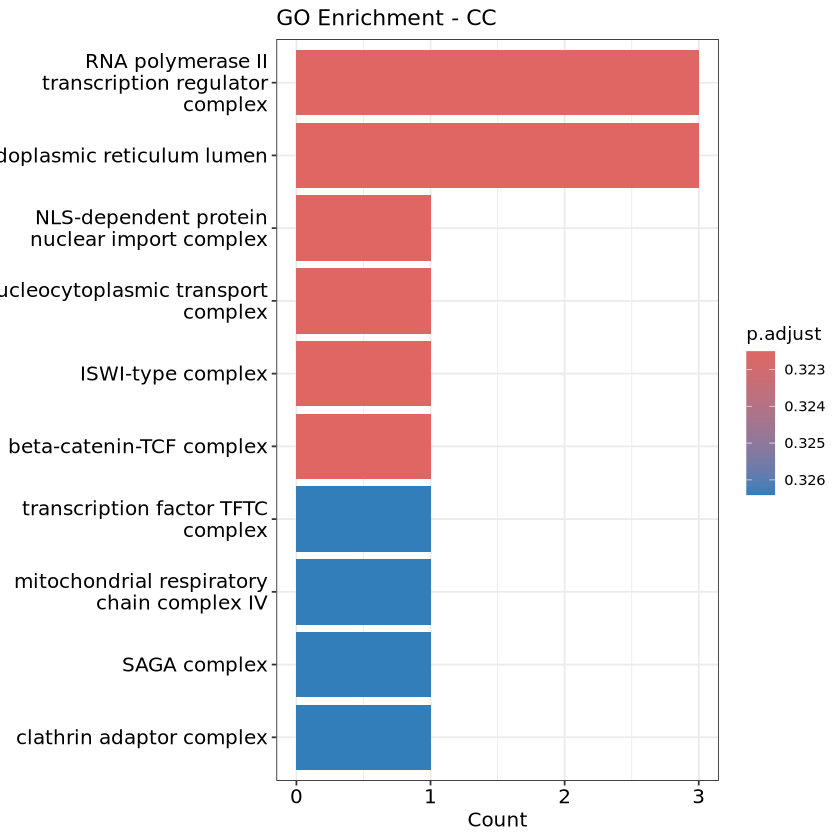

In [87]:
barplot(Aging4_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [82]:
Aging4_xQTL_ego_mf <- enrichGO(
  gene          = Aging4_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [85]:
head(Aging4_xQTL_ego_mf, n=10)

ID        
GO:0015035 GO:0015035
GO:0015036 GO:0015036
GO:0003924 GO:0003924
GO:0016667 GO:0016667
GO:0005525 GO:0005525
GO:0019001 GO:0019001
GO:0032561 GO:0032561
GO:0004527 GO:0004527
GO:0015291 GO:0015291
GO:0019531 GO:0019531
           Description                                                
GO:0015035 protein-disulfide reductase activity                       
GO:0015036 disulfide oxidoreductase activity                          
GO:0003924 GTPase activity                                            
GO:0016667 oxidoreductase activity, acting on a sulfur group of donors
GO:0005525 GTP binding                                                
GO:0019001 guanyl nucleotide binding                                  
GO:0032561 guanyl ribonucleotide binding                              
GO:0004527 exonuclease activity                                       
GO:0015291 secondary active transmembrane transporter activity        
GO:0019531 oxalate transmembrane transporter activity                 
           GeneRatio BgRatio   pvalue      p.adjust  qvalue    
GO:0015035 2/37      30/21059  0.001266704 0.1385584 0.09925969
GO:0015036 2/37      37/21059  0.001924423 0.1385584 0.09925969
GO:0003924 4/37      353/21059 0.003313197 0.1400994 0.10036363
GO:0016667 2/37      60/21059  0.004986294 0.1400994 0.10036363
GO:0005525 4/37      411/21059 0.005677585 0.1400994 0.10036363
GO:0019001 4/37      433/21059 0.006810389 0.1400994 0.10036363
GO:0032561 4/37      433/21059 0.006810389 0.1400994 0.10036363
GO:0004527 2/37      92/21059  0.011384513 0.1452231 0.10403412
GO:0015291 3/37      309/21059 0.016823537 0.1452231 0.10403412
GO:0019531 1/37      10/21059  0.017435118 0.1452231 0.10403412
           geneID                                                         
GO:0015035 ENSG00000086619/ENSG00000239264                                
GO:0015036 ENSG00000086619/ENSG00000239264                                
GO:0003924 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
GO:0016667 ENSG00000086619/ENSG00000239264                                
GO:0005525 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
GO:0019001 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
GO:0032561 ENSG00000117280/ENSG00000276600/ENSG00000168827/ENSG00000146535
GO:0004527 ENSG00000136960/ENSG00000135473                                
GO:0015291 ENSG00000133065/ENSG00000174502/ENSG00000180773                
GO:0019531 ENSG00000174502                                                
           Count
GO:0015035 2    
GO:0015036 2    
GO:0003924 4    
GO:0016667 2    
GO:0005525 4    
GO:0019001 4    
GO:0032561 4    
GO:0004527 2    
GO:0015291 3    
GO:0019531 1

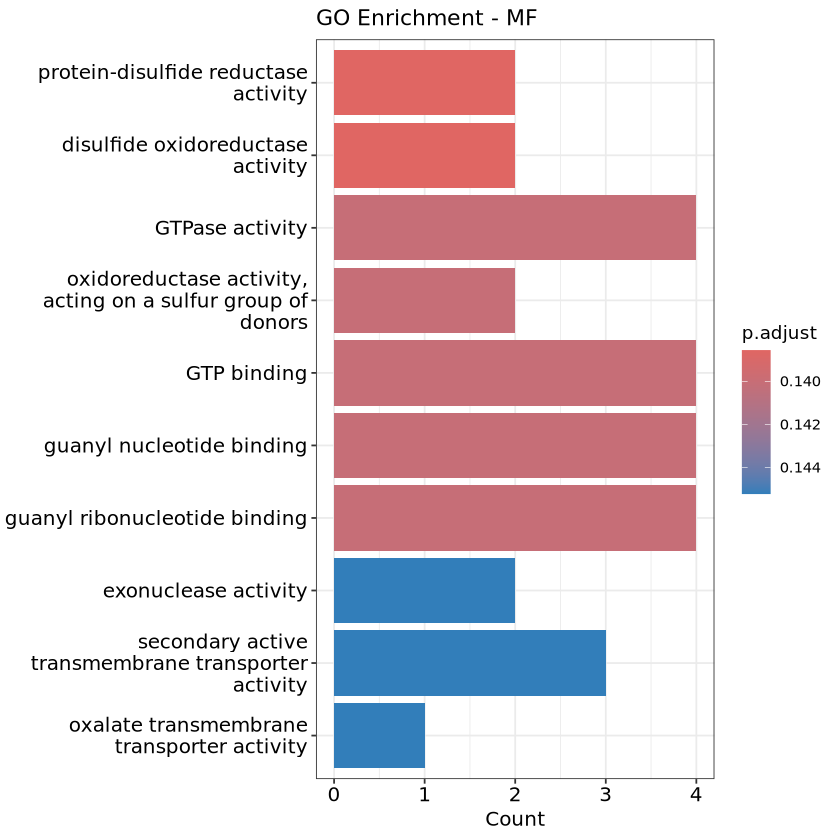

In [84]:
barplot(Aging4_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

### image_Aging5_xQTL list

In [177]:
Aging5_xQTL_ego <- enrichGO(
  gene          = Aging5_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [178]:
head(Aging5_xQTL_ego, n=5)

ID        
GO:0036109 GO:0036109
GO:0009170 GO:0009170
GO:0051893 GO:0051893
GO:0090109 GO:0090109
GO:0009151 GO:0009151
           Description                                                GeneRatio
GO:0036109 alpha-linolenic acid metabolic process                     2/57     
GO:0009170 purine deoxyribonucleoside monophosphate metabolic process 2/57     
GO:0051893 regulation of focal adhesion assembly                      3/57     
GO:0090109 regulation of cell-substrate junction assembly             3/57     
GO:0009151 purine deoxyribonucleotide metabolic process               2/57     
           BgRatio  pvalue       p.adjust  qvalue   
GO:0036109 10/21261 0.0003134257 0.1385694 0.1204689
GO:0009170 11/21261 0.0003824161 0.1385694 0.1204689
GO:0051893 70/21261 0.0008804790 0.1385694 0.1204689
GO:0090109 70/21261 0.0008804790 0.1385694 0.1204689
GO:0009151 17/21261 0.0009358874 0.1385694 0.1204689
           geneID                                          Count
GO:0036109 ENSG00000134824/ENSG00000149485                 2    
GO:0009170 ENSG00000156110/ENSG00000076685                 2    
GO:0051893 ENSG00000169756/ENSG00000044524/ENSG00000035403 3    
GO:0090109 ENSG00000169756/ENSG00000044524/ENSG00000035403 3    
GO:0009151 ENSG00000156110/ENSG00000076685                 2

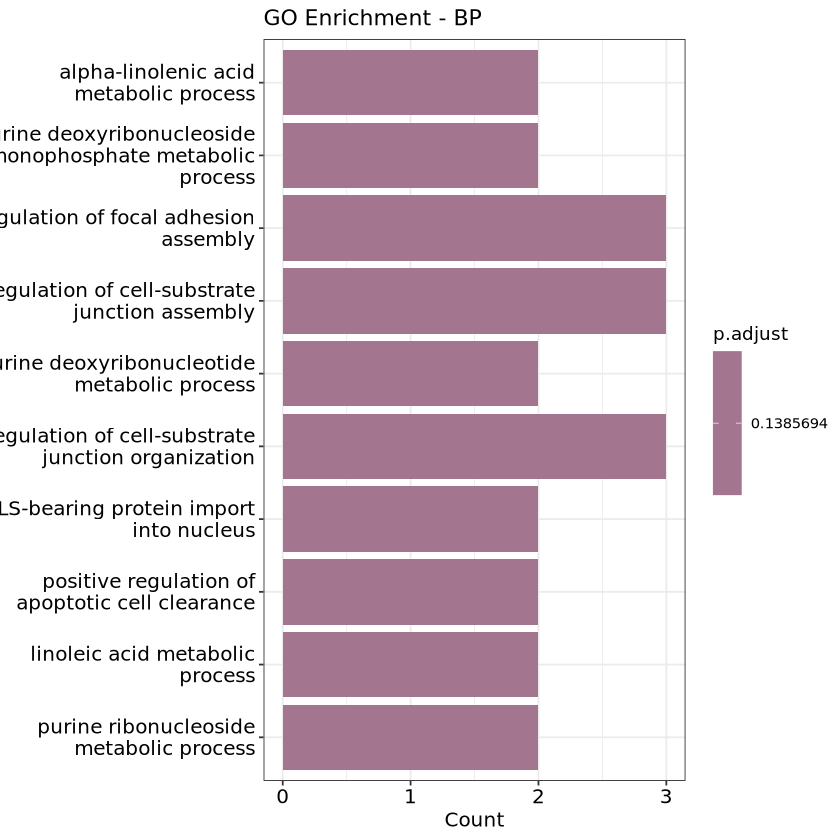

In [179]:
barplot(Aging5_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [133]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_Aging5_sig_xqtl_GO.pdf', width = 6, height = 6)

In [180]:
Aging5_xQTL_ego_cc <- enrichGO(
  gene          = Aging5_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [181]:
head(Aging5_xQTL_ego_cc, n=5)

ID        
GO:0005643 GO:0005643
GO:0016328 GO:0016328
GO:0071014 GO:0071014
GO:0000276 GO:0000276
GO:0031094 GO:0031094
           Description                                                                 
GO:0005643 nuclear pore                                                                
GO:0016328 lateral plasma membrane                                                     
GO:0071014 post-mRNA release spliceosomal complex                                      
GO:0000276 mitochondrial proton-transporting ATP synthase complex, coupling factor F(o)
GO:0031094 platelet dense tubular network                                              
           GeneRatio BgRatio   pvalue      p.adjust  qvalue   
GO:0005643 3/61      101/22568 0.002594014 0.2619907 0.2305699
GO:0016328 2/61      73/22568  0.016699355 0.2619907 0.2305699
GO:0071014 1/61      10/22568  0.026708277 0.2619907 0.2305699
GO:0000276 1/61      11/22568  0.029340194 0.2619907 0.2305699
GO:0031094 1/61      11/22568  0.029340194 0.2619907 0.2305699
           geneID                                          Count
GO:0005643 ENSG00000196862/ENSG00000153201/ENSG00000132182 3    
GO:0016328 ENSG00000146535/ENSG00000072518                 2    
GO:0071014 ENSG00000160799                                 1    
GO:0000276 ENSG00000159199                                 1    
GO:0031094 ENSG00000072952                                 1

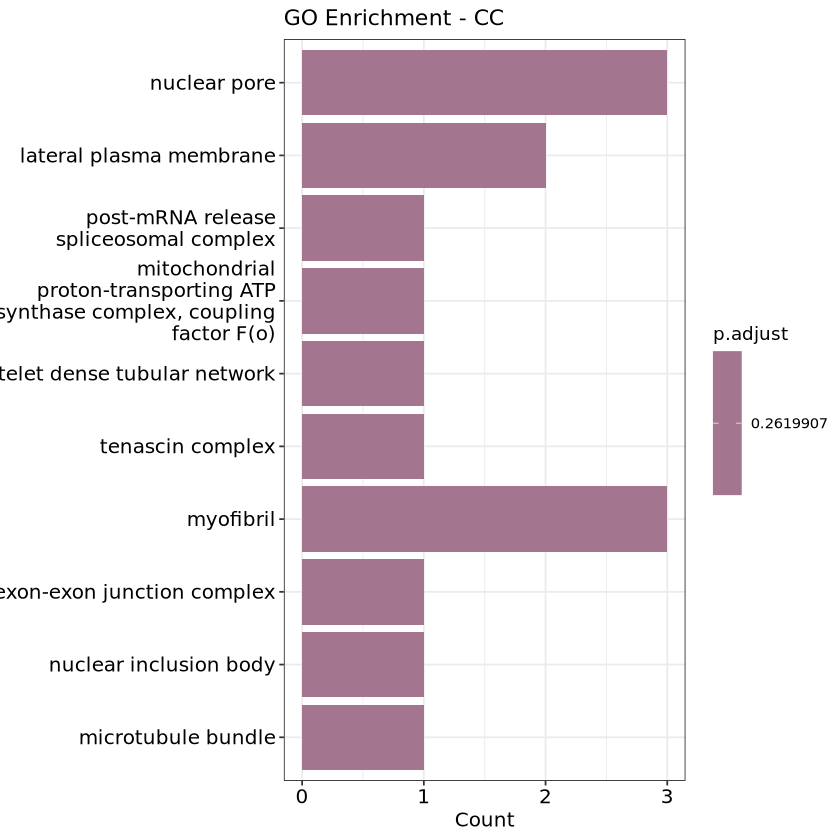

In [182]:
barplot(Aging5_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [82]:
Aging5_xQTL_ego_mf <- enrichGO(
  gene          = Aging5_xQTL_list$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [83]:
head(Aging5_xQTL_ego_mf, n=5)

ID        
GO:0016717 GO:0016717
GO:0001848 GO:0001848
GO:0019205 GO:0019205
GO:0005096 GO:0005096
GO:0004879 GO:0004879
           Description                                                                                                                                                  
GO:0016717 oxidoreductase activity, acting on paired donors, with oxidation of a pair of donors resulting in the reduction of molecular oxygen to two molecules of water
GO:0001848 complement binding                                                                                                                                           
GO:0019205 nucleobase-containing compound kinase activity                                                                                                               
GO:0005096 GTPase activator activity                                                                                                                                    
GO:0004879 nuclear receptor activity                                                                                                                                    
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0016717 2/61      10/21059  0.0003658872 0.03951582 0.03042641
GO:0001848 2/61      41/21059  0.0062935047 0.17926411 0.13802987
GO:0019205 2/61      43/21059  0.0069048675 0.17926411 0.13802987
GO:0005096 4/61      300/21059 0.0111508681 0.17926411 0.13802987
GO:0004879 2/61      57/21059  0.0118916276 0.17926411 0.13802987
           geneID                                                         
GO:0016717 ENSG00000134824/ENSG00000149485                                
GO:0001848 ENSG00000244731/ENSG00000224389                                
GO:0019205 ENSG00000156110/ENSG00000076685                                
GO:0005096 ENSG00000196862/ENSG00000153201/ENSG00000196914/ENSG00000075399
GO:0004879 ENSG00000177463/ENSG00000077092                                
           Count
GO:0016717 2    
GO:0001848 2    
GO:0019205 2    
GO:0005096 4    
GO:0004879 2

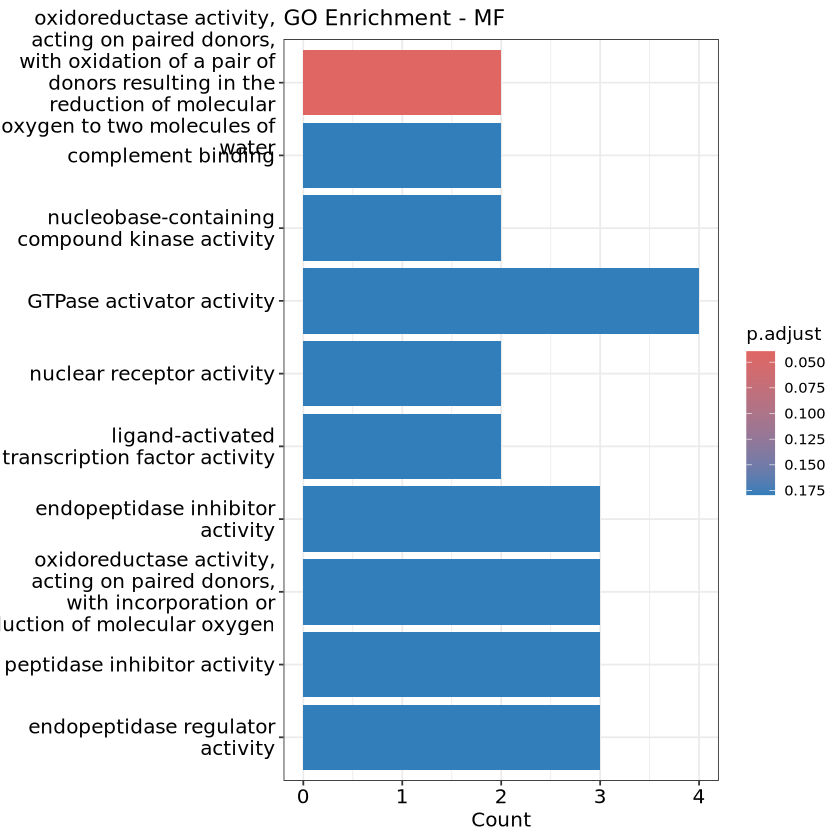

In [84]:
barplot(Aging5_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

#### KEGG

**AD2_Aging2**

In [87]:
entrez_ids <- bitr(AD2_Aging2_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(AD2_Aging2_xQTL_list$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"1.3% of input gene IDs are fail to map..."


In [88]:
entrez_ids |> filter(ENTREZID %in% c("9776","5595", "9110", "598", "10912", "1500"))

ENSEMBL         ENTREZID
1 ENSG00000175224 9776    
2 ENSG00000198561 1500    
3 ENSG00000102882 5595    
4 ENSG00000108389 9110    
5 ENSG00000171552 598

In [89]:
kegg_enrich %>% head(n=10)

category                             subcategory                    
hsa04140 Cellular Processes                   Transport and catabolism       
hsa04520 Cellular Processes                   Cellular community - eukaryotes
hsa04625 Organismal Systems                   Immune system                  
hsa03440 Genetic Information Processing       Replication and repair         
hsa05160 Human Diseases                       Infectious disease: viral      
hsa03460 Genetic Information Processing       Replication and repair         
hsa04630 Environmental Information Processing Signal transduction            
hsa04621 Organismal Systems                   Immune system                  
hsa05034 Human Diseases                       Substance dependence           
hsa04613 Organismal Systems                   Immune system                  
         ID       Description                              GeneRatio BgRatio 
hsa04140 hsa04140 Autophagy - animal                       4/27      169/9397
hsa04520 hsa04520 Adherens junction                        3/27      93/9397 
hsa04625 hsa04625 C-type lectin receptor signaling pathway 3/27      105/9397
hsa03440 hsa03440 Homologous recombination                 2/27      41/9397 
hsa05160 hsa05160 Hepatitis C                              3/27      159/9397
hsa03460 hsa03460 Fanconi anemia pathway                   2/27      55/9397 
hsa04630 hsa04630 JAK-STAT signaling pathway               3/27      168/9397
hsa04621 hsa04621 NOD-like receptor signaling pathway      3/27      189/9397
hsa05034 hsa05034 Alcoholism                               3/27      191/9397
hsa04613 hsa04613 Neutrophil extracellular trap formation  3/27      196/9397
         pvalue      p.adjust  qvalue    geneID             Count
hsa04140 0.001282521 0.1816302 0.1660030 9776/5595/9110/598 4    
hsa04520 0.002310976 0.1816302 0.1660030 83605/1500/5595    3    
hsa04625 0.003262818 0.1816302 0.1660030 51561/6773/5595    3    
hsa03440 0.006084537 0.2437298 0.2227597 6119/5889          2    
hsa05160 0.010322653 0.2437298 0.2227597 10062/6773/5595    3    
hsa03460 0.010750190 0.2437298 0.2227597 6119/5889          2    
hsa04630 0.011982169 0.2437298 0.2227597 51561/6773/598     3    
hsa04621 0.016425859 0.2437298 0.2227597 6773/5595/598      3    
hsa05034 0.016891408 0.2437298 0.2227597 8969/8368/5595     3    
hsa04613 0.018087809 0.2437298 0.2227597 8969/8368/5595     3

In [90]:
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'lipid|Lipid|fatty|Fatty|Alzheimer|Cholesterol'))
kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer'))

category                             subcategory                    
hsa05417 Human Diseases                       Cardiovascular disease         
hsa00565 Metabolism                           Lipid metabolism               
hsa00561 Metabolism                           Lipid metabolism               
hsa00564 Metabolism                           Lipid metabolism               
hsa04071 Environmental Information Processing Signal transduction            
hsa05010 Human Diseases                       Neurodegenerative disease      
hsa04932 Human Diseases                       Endocrine and metabolic disease
         ID       Description                       GeneRatio BgRatio 
hsa05417 hsa05417 Lipid and atherosclerosis         2/27      216/9397
hsa00565 hsa00565 Ether lipid metabolism            1/27      50/9397 
hsa00561 hsa00561 Glycerolipid metabolism           1/27      65/9397 
hsa00564 hsa00564 Glycerophospholipid metabolism    1/27      103/9397
hsa04071 hsa04071 Sphingolipid signaling pathway    1/27      122/9397
hsa05010 hsa05010 Alzheimer disease                 2/27      391/9397
hsa04932 hsa04932 Non-alcoholic fatty liver disease 1/27      157/9397
         pvalue    p.adjust  qvalue    geneID    Count
hsa05417 0.1270397 0.4041280 0.3693574 5595/598  2    
hsa00565 0.1343258 0.4041280 0.3693574 79153     1    
hsa00561 0.1711129 0.4041280 0.3693574 8525      1    
hsa00564 0.2576943 0.4041280 0.3693574 8525      1    
hsa04071 0.2976511 0.4041280 0.3693574 5595      1    
hsa05010 0.3105080 0.4126619 0.3771571 9776/5595 2    
hsa04932 0.3658997 0.4149641 0.3792612 10062     1

category       subcategory               ID       Description      
hsa05010 Human Diseases Neurodegenerative disease hsa05010 Alzheimer disease
         GeneRatio BgRatio  pvalue   p.adjust  qvalue    geneID    Count
hsa05010 2/27      391/9397 0.310508 0.4126619 0.3771571 9776/5595 2

In [91]:
entrez_ids %>% filter(ENTREZID%in% (kegg_enrich %>% as.data.frame %>% filter(str_detect(Description, 'Alzheimer')) %>% pull(geneID) %>% str_split(., '/') %>% unlist)) ## ATG13 & MAPK3

ENSEMBL         ENTREZID
1 ENSG00000175224 9776    
2 ENSG00000102882 5595

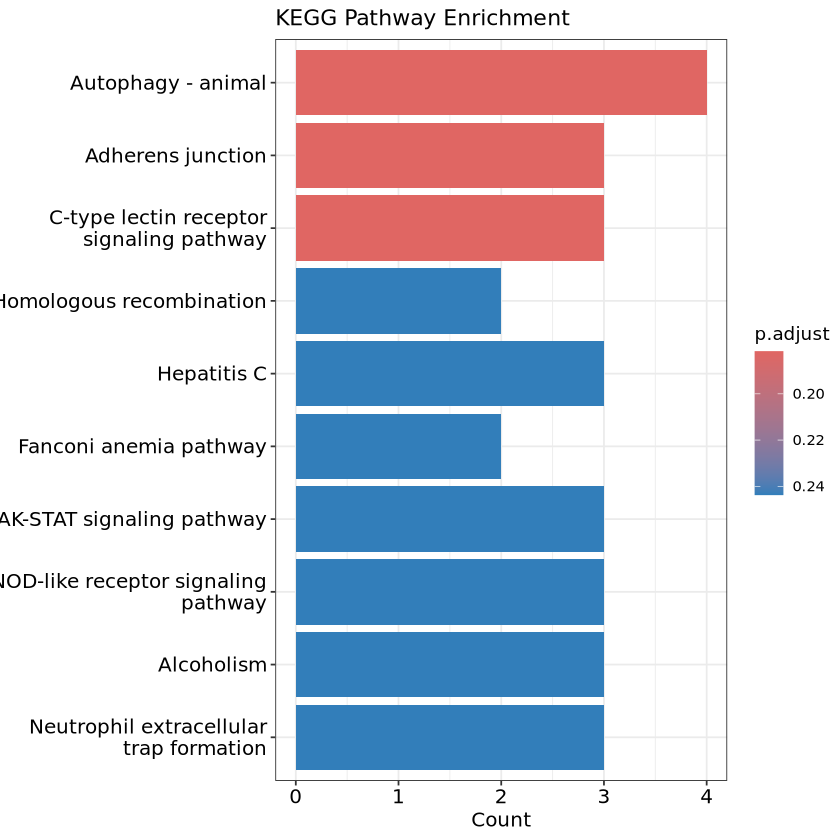

In [92]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

In [364]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_AD2_Aging2_xqtl_KEGG.pdf', width = 6, height = 6)

**AD2_Aging4**

In [69]:
entrez_ids <- bitr(AD2_Aging4_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [71]:
kegg_enrich %>% head(n=10)

category                            
hsa04520 Cellular Processes                  
hsa04390 Environmental Information Processing
hsa04625 Organismal Systems                  
hsa04350 Environmental Information Processing
hsa03082 Genetic Information Processing      
hsa04142 Cellular Processes                  
hsa04060 Environmental Information Processing
hsa05322 Human Diseases                      
hsa04072 Environmental Information Processing
hsa04148 Cellular Processes                  
         subcategory                         ID      
hsa04520 Cellular community - eukaryotes     hsa04520
hsa04390 Signal transduction                 hsa04390
hsa04625 Immune system                       hsa04625
hsa04350 Signal transduction                 hsa04350
hsa03082 Chromosome                          hsa03082
hsa04142 Transport and catabolism            hsa04142
hsa04060 Signaling molecules and interaction hsa04060
hsa05322 Immune disease                      hsa05322
hsa04072 Signal transduction                 hsa04072
hsa04148 Transport and catabolism            hsa04148
         Description                              GeneRatio BgRatio 
hsa04520 Adherens junction                        3/31      93/9432 
hsa04390 Hippo signaling pathway                  3/31      157/9432
hsa04625 C-type lectin receptor signaling pathway 2/31      105/9432
hsa04350 TGF-beta signaling pathway               2/31      110/9432
hsa03082 ATP-dependent chromatin remodeling       2/31      117/9432
hsa04142 Lysosome                                 2/31      133/9432
hsa04060 Cytokine-cytokine receptor interaction   3/31      298/9432
hsa05322 Systemic lupus erythematosus             2/31      144/9432
hsa04072 Phospholipase D signaling pathway        2/31      149/9432
hsa04148 Efferocytosis                            2/31      157/9432
         pvalue      p.adjust  qvalue    geneID          Count
hsa04520 0.003415717 0.3552345 0.3552345 83605/1500/6934 3    
hsa04390 0.014457506 0.5251304 0.5251304 654/6934/8200   3    
hsa04625 0.046298940 0.5251304 0.5251304 51561/6773      2    
hsa04350 0.050326737 0.5251304 0.5251304 654/8200        2    
hsa03082 0.056171303 0.5251304 0.5251304 8969/2186       2    
hsa04142 0.070366457 0.5251304 0.5251304 1510/8546       2    
hsa04060 0.073261914 0.5251304 0.5251304 654/51561/8200  3    
hsa05322 0.080739882 0.5251304 0.5251304 8969/8368       2    
hsa04072 0.085605897 0.5251304 0.5251304 2768/8525       2    
hsa04148 0.093574012 0.5251304 0.5251304 338382/10062    2

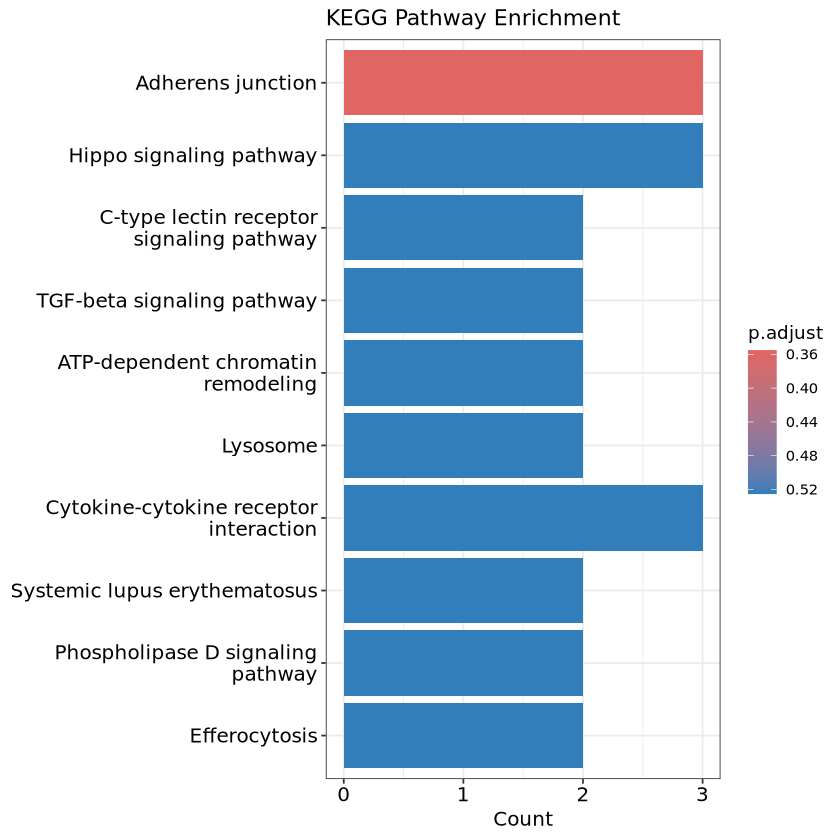

In [74]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**Aging3**

In [72]:
entrez_ids <- bitr(Aging3_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(Aging3_xQTL_list$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"2.04% of input gene IDs are fail to map..."
Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [73]:
kegg_enrich %>% head(n=10)

category                             subcategory                    
hsa04140 Cellular Processes                   Transport and catabolism       
hsa04930 Human Diseases                       Endocrine and metabolic disease
hsa04932 Human Diseases                       Endocrine and metabolic disease
hsa04370 Environmental Information Processing Signal transduction            
hsa04730 Organismal Systems                   Nervous system                 
hsa05205 Human Diseases                       Cancer: overview               
hsa05010 Human Diseases                       Neurodegenerative disease      
hsa05211 Human Diseases                       Cancer: specific types         
hsa05212 Human Diseases                       Cancer: specific types         
hsa04820 NA                                   NA                             
         ID       Description                       GeneRatio BgRatio 
hsa04140 hsa04140 Autophagy - animal                4/21      169/9397
hsa04930 hsa04930 Type II diabetes mellitus         2/21      47/9397 
hsa04932 hsa04932 Non-alcoholic fatty liver disease 3/21      157/9397
hsa04370 hsa04370 VEGF signaling pathway            2/21      60/9397 
hsa04730 hsa04730 Long-term depression              2/21      60/9397 
hsa05205 hsa05205 Proteoglycans in cancer           3/21      204/9397
hsa05010 hsa05010 Alzheimer disease                 4/21      391/9397
hsa05211 hsa05211 Renal cell carcinoma              2/21      70/9397 
hsa05212 hsa05212 Pancreatic cancer                 2/21      77/9397 
hsa04820 hsa04820 Cytoskeleton in muscle cells      3/21      232/9397
         pvalue       p.adjust   qvalue    geneID               Count
hsa04140 0.0004757184 0.07896925 0.0686036 8660/5595/9842/84557 4    
hsa04930 0.0048398124 0.20536334 0.1784070 8660/5595            2    
hsa04932 0.0048786121 0.20536334 0.1784070 998/8660/83737       3    
hsa04370 0.0077874379 0.20536334 0.1784070 998/5595             2    
hsa04730 0.0077874379 0.20536334 0.1784070 5595/1394            2    
hsa05205 0.0100495449 0.20536334 0.1784070 3339/998/5595        3    
hsa05010 0.0100635144 0.20536334 0.1784070 8660/5684/5595/4137  4    
hsa05211 0.0104836594 0.20536334 0.1784070 998/5595             2    
hsa05212 0.0125833283 0.20536334 0.1784070 998/5595             2    
hsa04820 0.0142256782 0.20536334 0.1784070 3339/6711/25777      3

In [48]:
entrez_ids |> filter(ENTREZID %in% c("8660","5595", "9110", "9842", "84557", "1394", "5684", "4137", "998"))

ENSEMBL         ENTREZID
1 ENSG00000070831 998     
2 ENSG00000185950 8660    
3 ENSG00000100567 5684    
4 ENSG00000102882 5595    
5 ENSG00000225190 9842    
6 ENSG00000263715 1394    
7 ENSG00000120088 1394    
8 ENSG00000186868 4137    
9 ENSG00000101460 84557

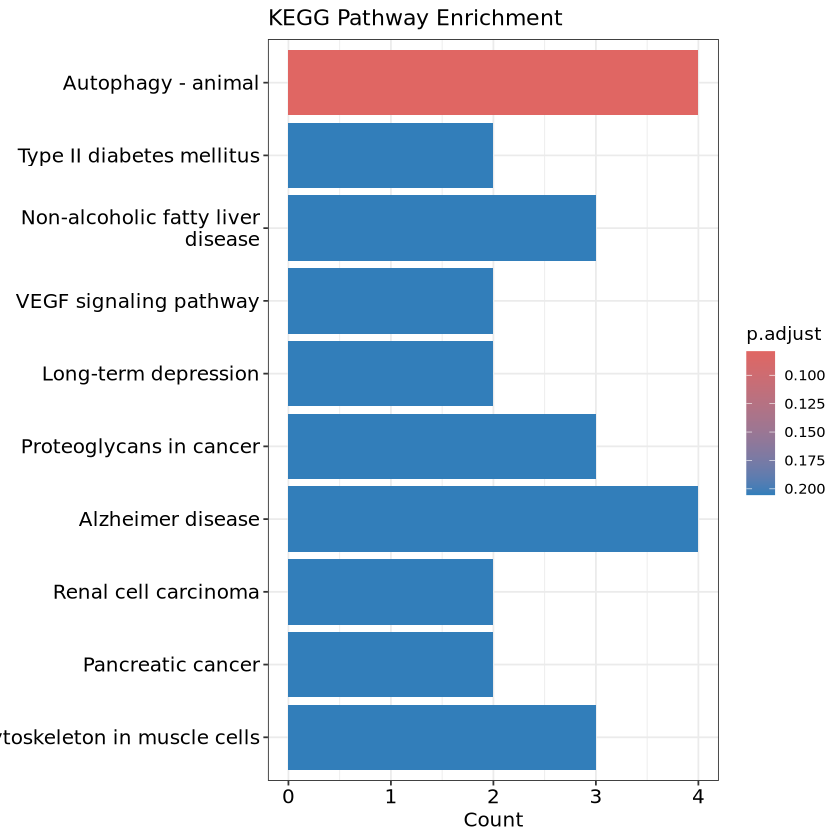

In [74]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

Autophagy - animal: IRS2,MAPK3,PLEKHM1,MAP1LC3A; Non-alcoholic fatty liver disease: CDC42; Type II diabetes mellitus: IRS2,MAPK3; Long-term depression: CRHR1 ; Alzheimer disease: IRS2,PSMA3(important in mitochondria clearance during fertalization), MAPK3, MAPT.

In [75]:
ggsave('~/project/image_QTL/image_enrichment/figs/image_Aging3_xqtl_KEGG.pdf', width = 6, height = 6)

**Aging5**

In [7]:
entrez_ids <- bitr(Aging5_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [8]:
kegg_enrich %>% head(n=10)

category           subcategory                     ID      
hsa04610 Organismal Systems Immune system                   hsa04610
hsa05150 Human Diseases     Infectious disease: bacterial   hsa05150
hsa04936 Human Diseases     Endocrine and metabolic disease hsa04936
hsa05133 Human Diseases     Infectious disease: bacterial   hsa05133
hsa01040 Metabolism         Lipid metabolism                hsa01040
hsa05171 Human Diseases     Infectious disease: viral       hsa05171
hsa04270 Organismal Systems Circulatory system              hsa04270
hsa05322 Human Diseases     Immune disease                  hsa05322
hsa01212 Metabolism         Global and overview maps        hsa01212
hsa05100 Human Diseases     Infectious disease: bacterial   hsa05100
         Description                             GeneRatio BgRatio 
hsa04610 Complement and coagulation cascades     4/29      88/9397 
hsa05150 Staphylococcus aureus infection         4/29      102/9397
hsa04936 Alcoholic liver disease                 4/29      144/9397
hsa05133 Pertussis                               3/29      78/9397 
hsa01040 Biosynthesis of unsaturated fatty acids 2/29      27/9397 
hsa05171 Coronavirus disease - COVID-19          4/29      238/9397
hsa04270 Vascular smooth muscle contraction      3/29      134/9397
hsa05322 Systemic lupus erythematosus            3/29      144/9397
hsa01212 Fatty acid metabolism                   2/29      57/9397 
hsa05100 Bacterial invasion of epithelial cells  2/29      78/9397 
         pvalue       p.adjust    qvalue      geneID                Count
hsa04610 0.0001426162 0.009712053 0.008231678 720/110384692/721/728 4    
hsa05150 0.0002522611 0.009712053 0.008231678 720/110384692/721/728 4    
hsa04936 0.0009324798 0.023933648 0.020285525 720/110384692/721/728 4    
hsa05133 0.0017210608 0.033130420 0.028080465 720/110384692/721     3    
hsa01040 0.0030771565 0.047388211 0.040164991 9415/3992             2    
hsa05171 0.0057920440 0.074331231 0.063001180 720/110384692/721/728 4    
hsa04270 0.0079012974 0.086914271 0.073666231 2768/10335/23365      3    
hsa05322 0.0096206673 0.092598923 0.078484391 720/110384692/721     3    
hsa01212 0.0132145067 0.113057446 0.095824493 9415/3992             2    
hsa05100 0.0238930566 0.183976536 0.155933633 7414/10801            2

In [13]:
ensembl = entrez_ids |> filter(ENTREZID %in% c("720","110384692", "721", "728", "110384692", "9415", "3992", "2768", "10335", "23365"))

In [14]:
DNE_sig_xqtl |> filter(gene_id %in% ensembl$ENSEMBL)

#chr  start     end       gene_id         strand gene_name
1 chr6   31982056  32002680 ENSG00000244731 +      C4A      
2 chr6   32014794  32035417 ENSG00000224389 +      C4B      
3 chr7    2728104   2844307 ENSG00000146535 -      GNA12    
4 chr11  10573090  10693987 ENSG00000072952 -      IRAG1    
5 chr11  61792979  61867353 ENSG00000134824 +      FADS2    
6 chr11  61799626  61829317 ENSG00000149485 -      FADS1    
7 chr11 120336412 120489936 ENSG00000196914 +      ARHGEF12 
8 chr19  47290022  47322065 ENSG00000197405 +      C5AR1    
  event_ID                                           
1 image_Aging5                                       
2 image_Aging5                                       
3 image_AD1; image_Aging1; image_Aging4; image_Aging5
4 image_Aging5                                       
5 image_Aging5; mvage                                
6 image_Aging5; mvage                                
7 image_Aging5                                       
8 image_Aging5

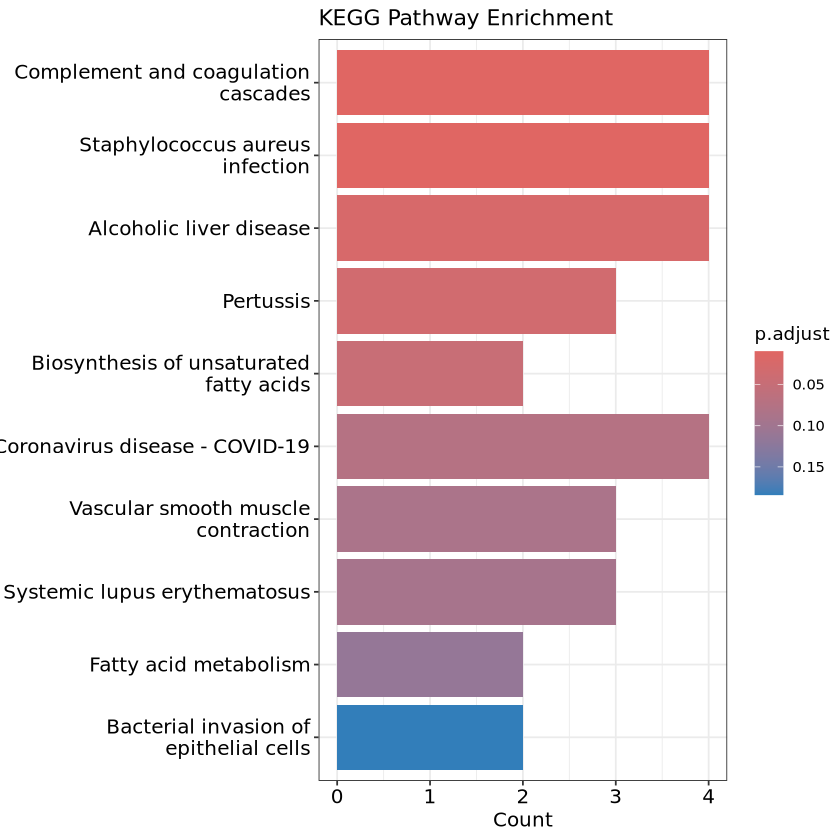

In [10]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**AD1_Aging5**

In [44]:
entrez_ids <- bitr(image_AD1_Aging5_xQTL$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns



In [45]:
kegg_enrich %>% head(n=10)

category           subcategory                     ID      
hsa04610 Organismal Systems Immune system                   hsa04610
hsa05150 Human Diseases     Infectious disease: bacterial   hsa05150
hsa04270 Organismal Systems Circulatory system              hsa04270
hsa04936 Human Diseases     Endocrine and metabolic disease hsa04936
hsa05171 Human Diseases     Infectious disease: viral       hsa05171
hsa05133 Human Diseases     Infectious disease: bacterial   hsa05133
hsa01040 Metabolism         Lipid metabolism                hsa01040
hsa04810 Cellular Processes Cell motility                   hsa04810
hsa01212 Metabolism         Global and overview maps        hsa01212
hsa05014 Human Diseases     Neurodegenerative disease       hsa05014
         Description                             GeneRatio BgRatio 
hsa04610 Complement and coagulation cascades     5/45      88/9397 
hsa05150 Staphylococcus aureus infection         4/45      102/9397
hsa04270 Vascular smooth muscle contraction      4/45      134/9397
hsa04936 Alcoholic liver disease                 4/45      144/9397
hsa05171 Coronavirus disease - COVID-19          5/45      238/9397
hsa05133 Pertussis                               3/45      78/9397 
hsa01040 Biosynthesis of unsaturated fatty acids 2/45      27/9397 
hsa04810 Regulation of actin cytoskeleton        4/45      232/9397
hsa01212 Fatty acid metabolism                   2/45      57/9397 
hsa05014 Amyotrophic lateral sclerosis           5/45      371/9397
         pvalue       p.adjust    qvalue      geneID                     Count
hsa04610 5.842656e-05 0.008004438 0.007564701 720/110384692/721/728/3053 5    
hsa05150 1.385545e-03 0.094909844 0.089695819 720/110384692/721/728      4    
hsa04270 3.746454e-03 0.138773484 0.131149739 2768/10335/23365/135       4    
hsa04936 4.841424e-03 0.138773484 0.131149739 720/110384692/721/728      4    
hsa05171 5.346220e-03 0.138773484 0.131149739 720/110384692/721/1956/728 5    
hsa05133 6.077671e-03 0.138773484 0.131149739 720/110384692/721          3    
hsa01040 7.294283e-03 0.142759532 0.134916807 9415/3992                  2    
hsa04810 2.446469e-02 0.368332080 0.348097163 2768/1956/23365/7414       4    
hsa01212 3.029575e-02 0.368332080 0.348097163 9415/3992                  2    
hsa05014 3.126218e-02 0.368332080 0.348097163 5903/23225/10121/5684/516  5

In [48]:
# Neurodegenerative disease
entrez_ids |> filter(ENTREZID %in% c("5903", "23225", "10121", "5684", "516"))
# 	: RANBP2,NUP210(nucleus), ACTR1A, PSMA3(proteosome), ATP5MC1(mitochondria)

ENSEMBL         ENTREZID
1 ENSG00000153201 5903    
2 ENSG00000132182 23225   
3 ENSG00000138107 10121   
4 ENSG00000100567 5684    
5 ENSG00000159199 516

In [51]:
kegg_enrich |> as.data.frame() |> filter(str_detect(Description, "fat| lipid| vesicle| Fatty| Alzheimer's| neur"))

category       subcategory               ID      
hsa01040 Metabolism     Lipid metabolism          hsa01040
hsa00565 Metabolism     Lipid metabolism          hsa00565
hsa05022 Human Diseases Neurodegenerative disease hsa05022
         Description                                       GeneRatio BgRatio 
hsa01040 Biosynthesis of unsaturated fatty acids           2/45      27/9397 
hsa00565 Ether lipid metabolism                            1/45      50/9397 
hsa05022 Pathways of neurodegeneration - multiple diseases 3/45      483/9397
         pvalue      p.adjust  qvalue    geneID         Count
hsa01040 0.007294283 0.1427595 0.1349168 9415/3992      2    
hsa00565 0.213877581 0.5589270 0.5282215 5168           1    
hsa05022 0.409728657 0.5589270 0.5282215 10121/5684/516 3

In [52]:
# lipid metabolism
entrez_ids |> filter(ENTREZID %in% c("9415", "3992", "5168", "10121", "5684", "516"))
# ENPP2, FADS2, FADS1, |ACTR1A, PSMA3, ATP5MC1

ENSEMBL         ENTREZID
1 ENSG00000136960 5168    
2 ENSG00000134824 9415    
3 ENSG00000149485 3992    
4 ENSG00000138107 10121   
5 ENSG00000100567 5684    
6 ENSG00000159199 516

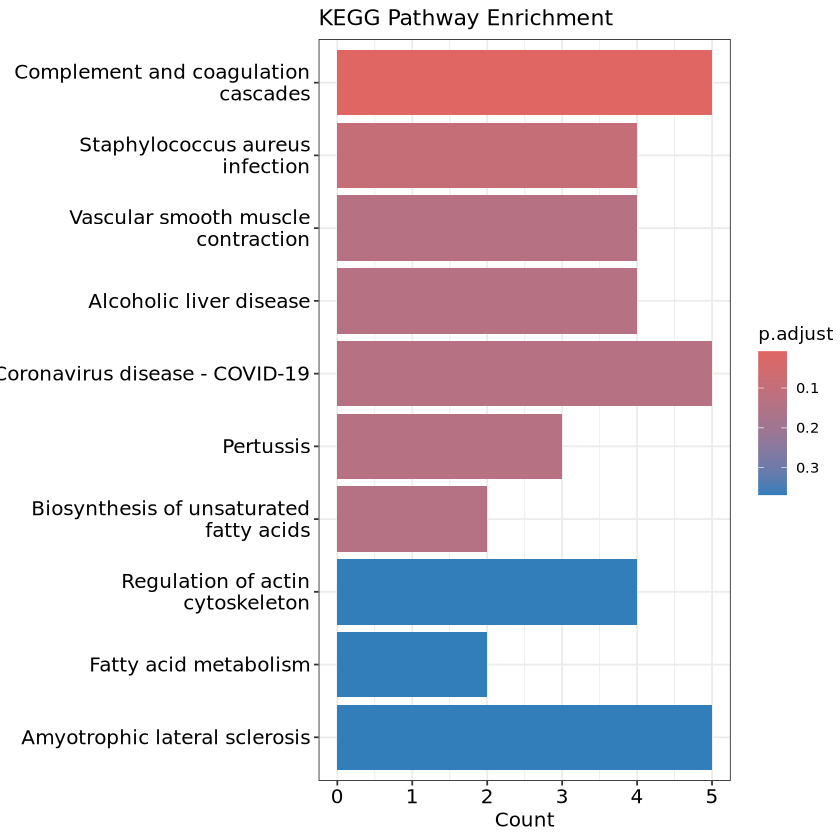

In [46]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**AD1**

In [29]:
entrez_ids <- bitr(AD1_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [30]:
kegg_enrich %>% head(n=10)

category                             subcategory                     
hsa04928 Organismal Systems                   Endocrine system                
hsa04270 Organismal Systems                   Circulatory system              
hsa04072 Environmental Information Processing Signal transduction             
hsa04921 Organismal Systems                   Endocrine system                
hsa04630 Environmental Information Processing Signal transduction             
hsa05225 Human Diseases                       Cancer: specific types          
hsa04814 Cellular Processes                   Cell motility                   
hsa00053 Metabolism                           Carbohydrate metabolism         
hsa04015 Environmental Information Processing Signal transduction             
hsa04130 Genetic Information Processing       Folding, sorting and degradation
         ID       Description                                         GeneRatio
hsa04928 hsa04928 Parathyroid hormone synthesis, secretion and action 2/18     
hsa04270 hsa04270 Vascular smooth muscle contraction                  2/18     
hsa04072 hsa04072 Phospholipase D signaling pathway                   2/18     
hsa04921 hsa04921 Oxytocin signaling pathway                          2/18     
hsa04630 hsa04630 JAK-STAT signaling pathway                          2/18     
hsa05225 hsa05225 Hepatocellular carcinoma                            2/18     
hsa04814 hsa04814 Motor proteins                                      2/18     
hsa00053 hsa00053 Ascorbate and aldarate metabolism                   1/18     
hsa04015 hsa04015 Rap1 signaling pathway                              2/18     
hsa04130 hsa04130 SNARE interactions in vesicular transport           1/18     
         BgRatio  pvalue     p.adjust  qvalue    geneID      Count
hsa04928 115/9432 0.01985142 0.3141679 0.3104559 2768/1956   2    
hsa04270 134/9432 0.02641692 0.3141679 0.3104559 2768/135    2    
hsa04072 149/9432 0.03214176 0.3141679 0.3104559 2768/1956   2    
hsa04921 155/9432 0.03455849 0.3141679 0.3104559 1956/1938   2    
hsa04630 168/9432 0.04003199 0.3141679 0.3104559 1956/51588  2    
hsa05225 170/9432 0.04090206 0.3141679 0.3104559 6599/1956   2    
hsa04814 197/9432 0.05333665 0.3141679 0.3104559 63971/10121 2    
hsa00053 30/9432  0.05577895 0.3141679 0.3104559 7364        1    
hsa04015 212/9432 0.06076485 0.3141679 0.3104559 1956/135    2    
hsa04130 33/9432  0.06119224 0.3141679 0.3104559 9342        1

In [32]:
# lipid metabolism
entrez_ids |> filter(ENTREZID %in% c("9415", "3992", "5168", "10121", "5684", "516"))
# ENPP2, FADS2, FADS1, |ACTR1A, PSMA3, ATP5MC1

ENSEMBL         ENTREZID
1 ENSG00000136960 5168    
2 ENSG00000138107 10121   
3 ENSG00000100567 5684

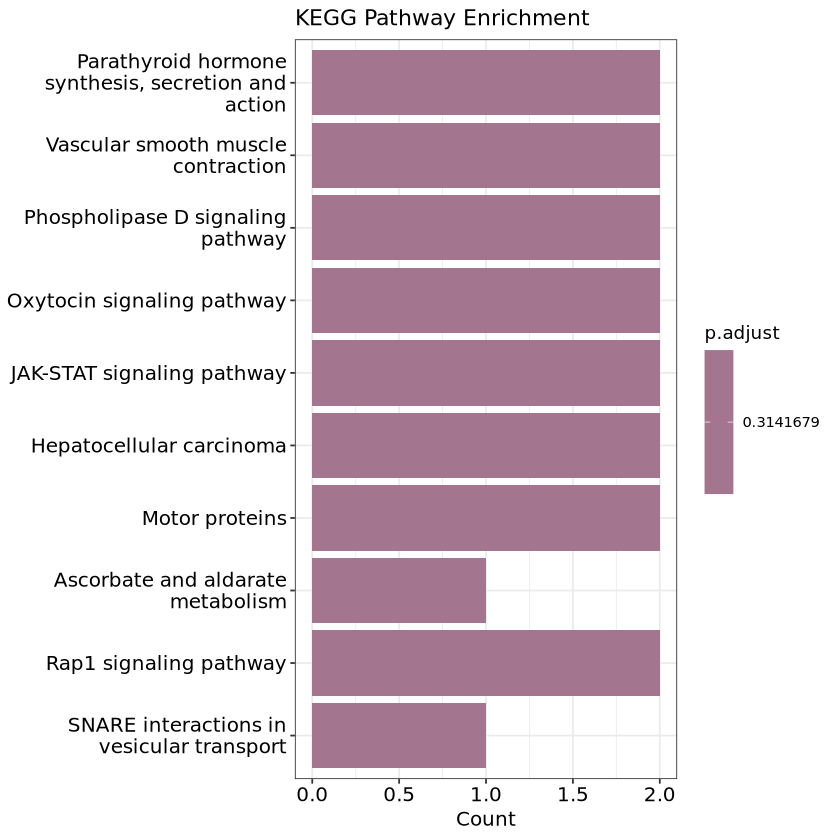

In [33]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**AD2**

In [34]:
entrez_ids <- bitr(AD2_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [35]:
kegg_enrich %>% head(n=10)

category                             subcategory                    
hsa04520 Cellular Processes                   Cellular community - eukaryotes
hsa04625 Organismal Systems                   Immune system                  
hsa05322 Human Diseases                       Immune disease                 
hsa04217 Cellular Processes                   Cell growth and death          
hsa05160 Human Diseases                       Infectious disease: viral      
hsa04630 Environmental Information Processing Signal transduction            
hsa05034 Human Diseases                       Substance dependence           
hsa04613 Organismal Systems                   Immune system                  
hsa00020 Metabolism                           Carbohydrate metabolism        
hsa00630 Metabolism                           Carbohydrate metabolism        
         ID       Description                              GeneRatio BgRatio 
hsa04520 hsa04520 Adherens junction                        2/17      93/9432 
hsa04625 hsa04625 C-type lectin receptor signaling pathway 2/17      105/9432
hsa05322 hsa05322 Systemic lupus erythematosus             2/17      144/9432
hsa04217 hsa04217 Necroptosis                              2/17      159/9432
hsa05160 hsa05160 Hepatitis C                              2/17      159/9432
hsa04630 hsa04630 JAK-STAT signaling pathway               2/17      168/9432
hsa05034 hsa05034 Alcoholism                               2/17      191/9432
hsa04613 hsa04613 Neutrophil extracellular trap formation  2/17      196/9432
hsa00020 hsa00020 Citrate cycle (TCA cycle)                1/17      30/9432 
hsa00630 hsa00630 Glyoxylate and dicarboxylate metabolism  1/17      32/9432 
         pvalue     p.adjust  qvalue    geneID     Count
hsa04520 0.01188011 0.2942747 0.2691382 83605/1500 2    
hsa04625 0.01497176 0.2942747 0.2691382 51561/6773 2    
hsa05322 0.02709589 0.2942747 0.2691382 8969/8368  2    
hsa04217 0.03253922 0.2942747 0.2691382 8969/6773  2    
hsa05160 0.03253922 0.2942747 0.2691382 10062/6773 2    
hsa04630 0.03599736 0.2942747 0.2691382 51561/6773 2    
hsa05034 0.04545112 0.2942747 0.2691382 8969/8368  2    
hsa04613 0.04761793 0.2942747 0.2691382 8969/8368  2    
hsa00020 0.05276066 0.2942747 0.2691382 1431       1    
hsa00630 0.05618320 0.2942747 0.2691382 1431       1

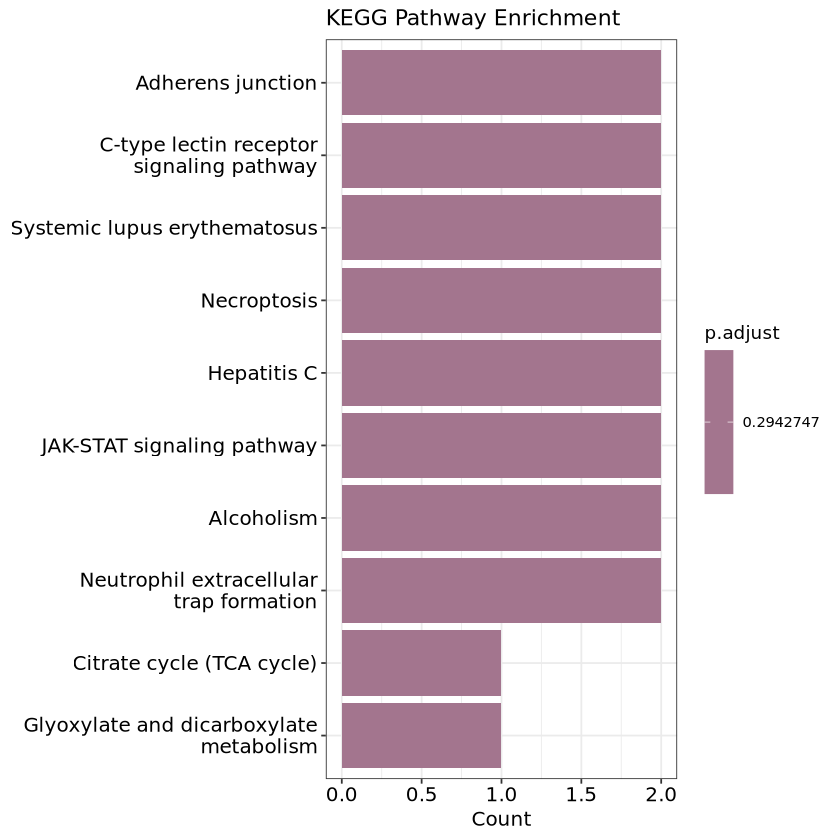

In [37]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**Aging1**

In [38]:
entrez_ids <- bitr(Aging1_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(Aging1_xQTL_list$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"1.43% of input gene IDs are fail to map..."


In [39]:
kegg_enrich %>% head(n=10)

category                      
hsa05168 Human Diseases                
hsa00620 Metabolism                    
hsa05204 Human Diseases                
hsa04974 Organismal Systems            
hsa01200 Metabolism                    
hsa00900 Metabolism                    
hsa03430 Genetic Information Processing
hsa04964 Organismal Systems            
hsa04380 Organismal Systems            
hsa00650 Metabolism                    
         subcategory                              ID      
hsa05168 Infectious disease: viral                hsa05168
hsa00620 Carbohydrate metabolism                  hsa00620
hsa05204 Cancer: overview                         hsa05204
hsa04974 Digestive system                         hsa04974
hsa01200 Global and overview maps                 hsa01200
hsa00900 Metabolism of terpenoids and polyketides hsa00900
hsa03430 Replication and repair                   hsa03430
hsa04964 Excretory system                         hsa04964
hsa04380 Development and regeneration             hsa04380
hsa00650 Carbohydrate metabolism                  hsa00650
         Description                             GeneRatio BgRatio 
hsa05168 Herpes simplex virus 1 infection        5/30      182/9432
hsa00620 Pyruvate metabolism                     2/30      47/9432 
hsa05204 Chemical carcinogenesis - DNA adducts   2/30      71/9432 
hsa04974 Protein digestion and absorption        2/30      105/9432
hsa01200 Carbon metabolism                       2/30      117/9432
hsa00900 Terpenoid backbone biosynthesis         1/30      23/9432 
hsa03430 Mismatch repair                         1/30      23/9432 
hsa04964 Proximal tubule bicarbonate reclamation 1/30      23/9432 
hsa04380 Osteoclast differentiation              2/30      143/9432
hsa00650 Butanoate metabolism                    1/30      27/9432 
         pvalue       p.adjust   qvalue     geneID                    Count
hsa05168 0.0002438519 0.02462904 0.02462904 3105/29990/29992/8892/598 5    
hsa00620 0.0096739780 0.46114596 0.46114596 39/97                     2    
hsa05204 0.0212156130 0.46114596 0.46114596 6799/6817                 2    
hsa04974 0.0436219072 0.46114596 0.46114596 6550/81578                2    
hsa01200 0.0529662440 0.46114596 0.46114596 39/387712                 2    
hsa00900 0.0707314708 0.46114596 0.46114596 39                        1    
hsa03430 0.0707314708 0.46114596 0.46114596 27030                     1    
hsa04964 0.0707314708 0.46114596 0.46114596 6550                      1    
hsa04380 0.0753562512 0.46114596 0.46114596 4982/487                  2    
hsa00650 0.0825284359 0.46114596 0.46114596 39                        1

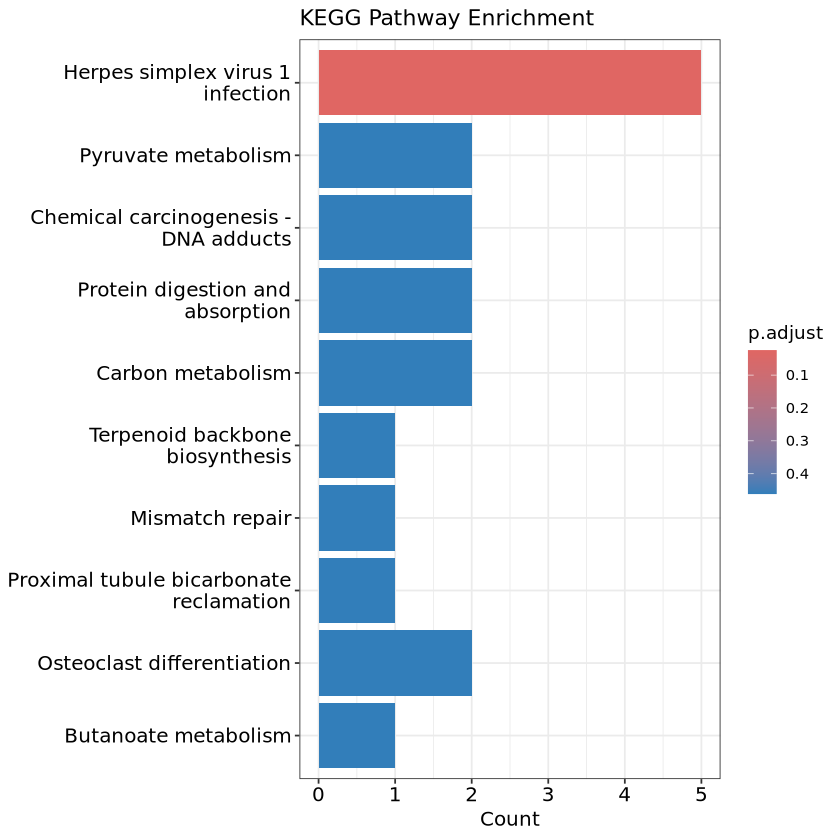

In [41]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**Aging2**

In [42]:
entrez_ids <- bitr(Aging2_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(Aging2_xQTL_list$gene_id, fromType = "ENSEMBL", toType = "ENTREZID", :
"2.27% of input gene IDs are fail to map..."


In [43]:
kegg_enrich %>% head(n=10)

category                       subcategory                    
hsa03440 Genetic Information Processing Replication and repair         
hsa04140 Cellular Processes             Transport and catabolism       
hsa03460 Genetic Information Processing Replication and repair         
hsa05131 Human Diseases                 Infectious disease: bacterial  
hsa01524 Human Diseases                 Drug resistance: antineoplastic
hsa05212 Human Diseases                 Cancer: specific types         
hsa05220 Human Diseases                 Cancer: specific types         
hsa01521 Human Diseases                 Drug resistance: antineoplastic
hsa05145 Human Diseases                 Infectious disease: parasitic  
hsa04210 Cellular Processes             Cell growth and death          
         ID       Description                               GeneRatio BgRatio 
hsa03440 hsa03440 Homologous recombination                  2/13      41/9432 
hsa04140 hsa04140 Autophagy - animal                        3/13      169/9432
hsa03460 hsa03460 Fanconi anemia pathway                    2/13      55/9432 
hsa05131 hsa05131 Shigellosis                               3/13      253/9432
hsa01524 hsa01524 Platinum drug resistance                  2/13      75/9432 
hsa05212 hsa05212 Pancreatic cancer                         2/13      77/9432 
hsa05220 hsa05220 Chronic myeloid leukemia                  2/13      77/9432 
hsa01521 hsa01521 EGFR tyrosine kinase inhibitor resistance 2/13      80/9432 
hsa05145 hsa05145 Toxoplasmosis                             2/13      112/9432
hsa04210 hsa04210 Apoptosis                                 2/13      137/9432
         pvalue      p.adjust   qvalue     geneID         Count
hsa03440 0.001395098 0.09192737 0.08098119 6119/5889      2    
hsa04140 0.001416096 0.09192737 0.08098119 5595/9110/598  3    
hsa03460 0.002499144 0.09192737 0.08098119 6119/5889      2    
hsa05131 0.004468541 0.09192737 0.08098119 10318/5595/598 3    
hsa01524 0.004598101 0.09192737 0.08098119 5595/598       2    
hsa05212 0.004840777 0.09192737 0.08098119 5595/598       2    
hsa05220 0.004840777 0.09192737 0.08098119 5595/598       2    
hsa01521 0.005215738 0.09192737 0.08098119 5595/598       2    
hsa05145 0.010008012 0.15679218 0.13812227 5595/598       2    
hsa04210 0.014710941 0.20742427 0.18272537 5595/598       2

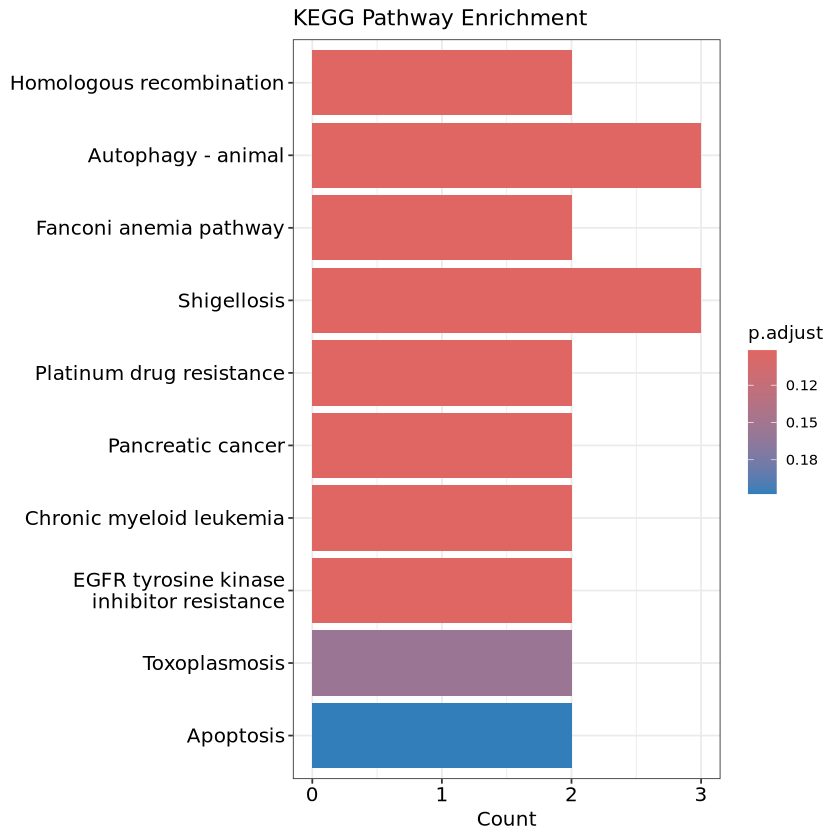

In [45]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

**Aging4**

In [46]:
entrez_ids <- bitr(Aging4_xQTL_list$gene_id, fromType = "ENSEMBL", 
                   toType = "ENTREZID", OrgDb = org.Hs.eg.db)

kegg_enrich <- enrichKEGG(gene         = entrez_ids$ENTREZID,
                          organism     = 'hsa',
                          pvalueCutoff = 1,
                         qvalueCutoff = 1)

'select()' returned 1:1 mapping between keys and columns



In [47]:
kegg_enrich %>% head(n=10)

category                             subcategory                     
hsa04625 Organismal Systems                   Immune system                   
hsa04142 Cellular Processes                   Transport and catabolism        
hsa04390 Environmental Information Processing Signal transduction             
hsa04630 Environmental Information Processing Signal transduction             
hsa04141 Genetic Information Processing       Folding, sorting and degradation
hsa05164 Human Diseases                       Infectious disease: viral       
hsa00020 Metabolism                           Carbohydrate metabolism         
hsa05167 Human Diseases                       Infectious disease: viral       
hsa00630 Metabolism                           Carbohydrate metabolism         
hsa01210 Metabolism                           Global and overview maps        
         ID       Description                                     GeneRatio
hsa04625 hsa04625 C-type lectin receptor signaling pathway        2/20     
hsa04142 hsa04142 Lysosome                                        2/20     
hsa04390 hsa04390 Hippo signaling pathway                         2/20     
hsa04630 hsa04630 JAK-STAT signaling pathway                      2/20     
hsa04141 hsa04141 Protein processing in endoplasmic reticulum     2/20     
hsa05164 hsa05164 Influenza A                                     2/20     
hsa00020 hsa00020 Citrate cycle (TCA cycle)                       1/20     
hsa05167 hsa05167 Kaposi sarcoma-associated herpesvirus infection 2/20     
hsa00630 hsa00630 Glyoxylate and dicarboxylate metabolism         1/20     
hsa01210 hsa01210 2-Oxocarboxylic acid metabolism                 1/20     
         BgRatio  pvalue     p.adjust  qvalue    geneID      Count
hsa04625 105/9432 0.02046895 0.4117798 0.4117798 51561/6773  2    
hsa04142 133/9432 0.03176637 0.4117798 0.4117798 1510/8546   2    
hsa04390 157/9432 0.04299887 0.4117798 0.4117798 654/6934    2    
hsa04630 168/9432 0.04858028 0.4117798 0.4117798 51561/6773  2    
hsa04141 171/9432 0.05014694 0.4117798 0.4117798 56605/81567 2    
hsa05164 173/9432 0.05120169 0.4117798 0.4117798 6773/3838   2    
hsa00020 30/9432  0.06178766 0.4117798 0.4117798 1431        1    
hsa05167 196/9432 0.06389764 0.4117798 0.4117798 6934/6773   2    
hsa00630 32/9432  0.06577517 0.4117798 0.4117798 1431        1    
hsa01210 33/9432  0.06776288 0.4117798 0.4117798 1431        1

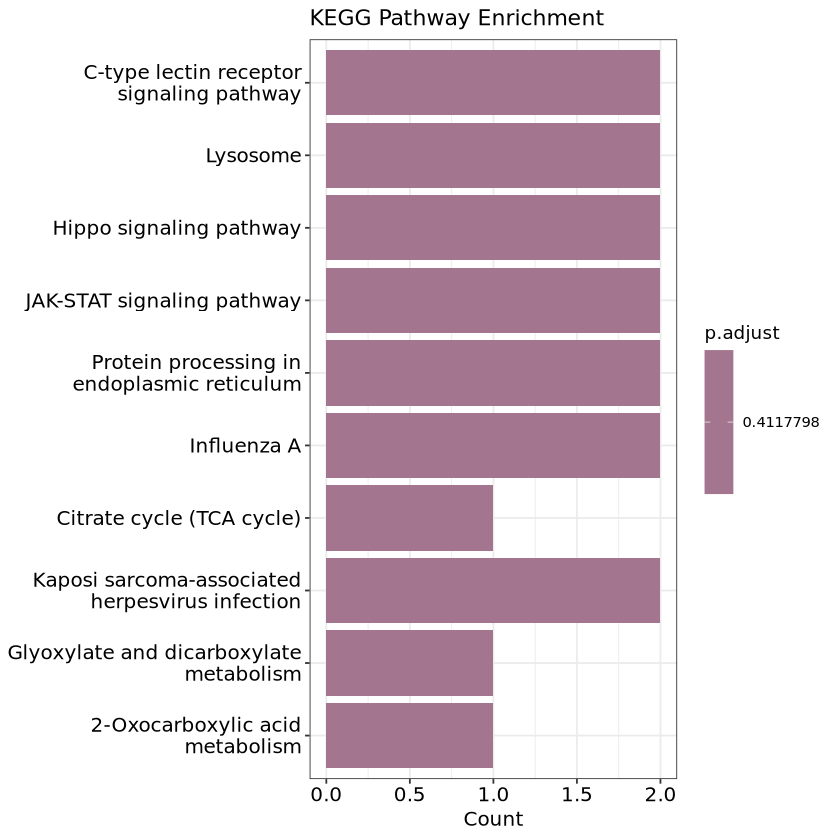

In [49]:
barplot(kegg_enrich, showCategory = 10, title = "KEGG Pathway Enrichment")

## Other image traits are not enriched in Autophagy pathways

## image_AD1+Aging5

In [19]:
image_AD1_Aging5_xQTL = DNE_sig_xqtl |> filter(str_detect(event_ID, "image_AD1") & str_detect(event_ID,"image_Aging5"))

In [29]:
image_AD1_Aging5_xQTL

#chr start    end      gene_id         strand gene_name
1 chr3 46921725 46982009 ENSG00000160799 -      CCDC12   
2 chr3 46979665 47009703 ENSG00000160796 +      NBEAL2   
3 chr3 47413680 47477125 ENSG00000114650 -      SCAP     
4 chr3 47495639 47513711 ENSG00000163832 -      ELP6     
5 chr7  2679521  2775499 ENSG00000174945 +      AMZ1     
6 chr7  2728104  2844307 ENSG00000146535 -      GNA12    
  event_ID                                           
1 image_AD1; image_Aging5                            
2 image_AD1; image_Aging5                            
3 image_AD1; image_Aging5                            
4 image_AD1; image_Aging5                            
5 image_AD1; image_Aging1; image_Aging4; image_Aging5
6 image_AD1; image_Aging1; image_Aging4; image_Aging5

In [34]:
image_AD1_Aging5_xQTL = DNE_sig_xqtl |> filter(str_detect(event_ID, "image_AD1") | str_detect(event_ID,"image_Aging5"))


In [35]:
image_AD1_Aging5_xQTL_ego <- enrichGO(
  gene          = image_AD1_Aging5_xQTL$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [36]:
head(image_AD1_Aging5_xQTL_ego, n=5)

ID        
GO:0036109 GO:0036109
GO:0009170 GO:0009170
GO:1902855 GO:1902855
GO:0009151 GO:0009151
GO:0021782 GO:0021782
           Description                                                GeneRatio
GO:0036109 alpha-linolenic acid metabolic process                     2/82     
GO:0009170 purine deoxyribonucleoside monophosphate metabolic process 2/82     
GO:1902855 regulation of non-motile cilium assembly                   2/82     
GO:0009151 purine deoxyribonucleotide metabolic process               2/82     
GO:0021782 glial cell development                                     4/82     
           BgRatio   pvalue       p.adjust  qvalue   
GO:0036109 10/21261  0.0006481056 0.3348251 0.3055017
GO:0009170 11/21261  0.0007901463 0.3348251 0.3055017
GO:1902855 13/21261  0.0011149706 0.3348251 0.3055017
GO:0009151 17/21261  0.0019246840 0.3348251 0.3055017
GO:0021782 143/21261 0.0022865283 0.3348251 0.3055017
           geneID                                                         
GO:0036109 ENSG00000134824/ENSG00000149485                                
GO:0009170 ENSG00000156110/ENSG00000076685                                
GO:1902855 ENSG00000047849/ENSG00000184640                                
GO:0009151 ENSG00000156110/ENSG00000076685                                
GO:0021782 ENSG00000114646/ENSG00000124920/ENSG00000197405/ENSG00000128271
           Count
GO:0036109 2    
GO:0009170 2    
GO:1902855 2    
GO:0009151 2    
GO:0021782 4

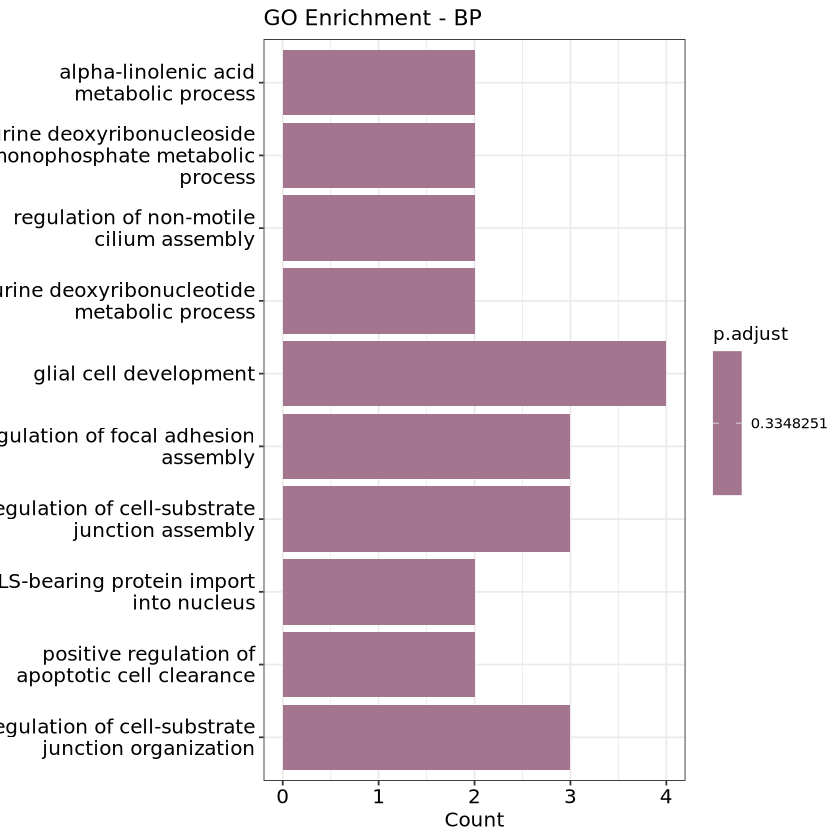

In [37]:
barplot(image_AD1_Aging5_xQTL_ego, showCategory = 10, title = "GO Enrichment - BP")

In [38]:
image_AD1_Aging5_xQTL_ego_cc <- enrichGO(
  gene          = image_AD1_Aging5_xQTL$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "CC",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [39]:
head(image_AD1_Aging5_xQTL_ego_cc, n=5)

ID         Description                       GeneRatio BgRatio  
GO:0005643 GO:0005643 nuclear pore                      3/88      101/22568
GO:0016605 GO:0016605 PML body                          3/88      133/22568
GO:0016363 GO:0016363 nuclear matrix                    3/88      134/22568
GO:0000421 GO:0000421 autophagosome membrane            2/88      56/22568 
GO:0030660 GO:0030660 Golgi-associated vesicle membrane 2/88      60/22568 
           pvalue      p.adjust qvalue   
GO:0005643 0.007251001 0.344626 0.3214128
GO:0016605 0.015259633 0.344626 0.3214128
GO:0016363 0.015565928 0.344626 0.3214128
GO:0000421 0.020200075 0.344626 0.3214128
GO:0030660 0.022985698 0.344626 0.3214128
           geneID                                          Count
GO:0005643 ENSG00000196862/ENSG00000153201/ENSG00000132182 3    
GO:0016605 ENSG00000171206/ENSG00000136436/ENSG00000105229 3    
GO:0016363 ENSG00000173473/ENSG00000203760/ENSG00000105229 3    
GO:0000421 ENSG00000136436/ENSG00000099940                 2    
GO:0030660 ENSG00000114646/ENSG00000241973                 2

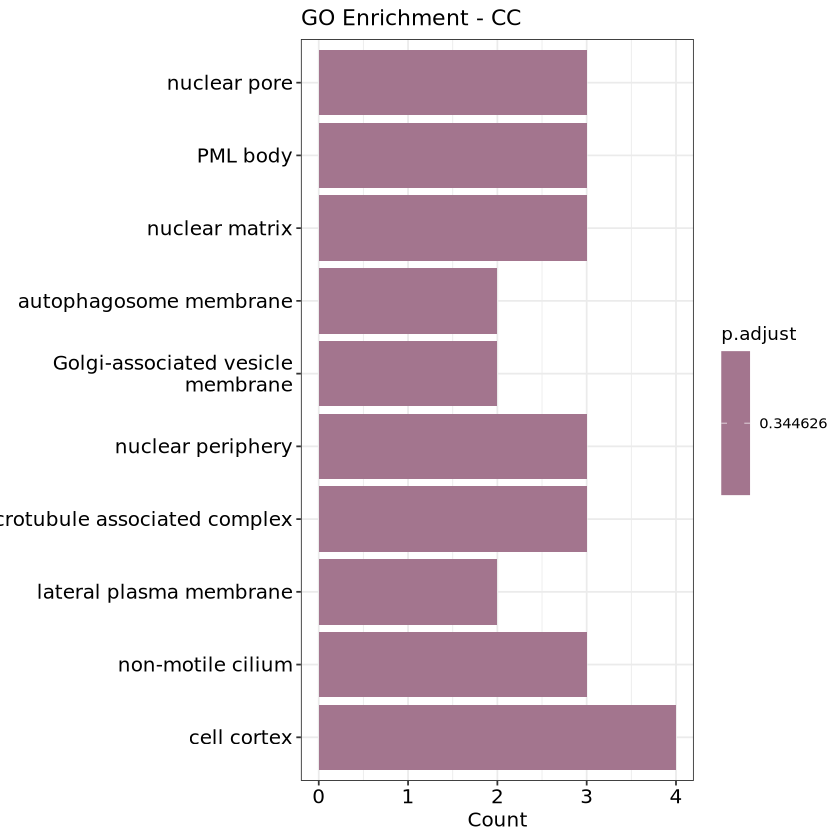

In [40]:
barplot(image_AD1_Aging5_xQTL_ego_cc, showCategory = 10, title = "GO Enrichment - CC")

In [ ]:
## RGPD4, RANBP2, NUP210, TRIM8, CALCOCO2(autophagy), PIAS4, SMARCC1,CENPW, CSPG5

In [41]:
image_AD1_Aging5_xQTL_ego_mf <- enrichGO(
  gene          = image_AD1_Aging5_xQTL$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "MF",
  pAdjustMethod = "BH",
  pvalueCutoff  = 1,
  qvalueCutoff  = 1
)


In [42]:
head(image_AD1_Aging5_xQTL_ego_mf, n=10)

ID        
GO:0016717 GO:0016717
GO:0061665 GO:0061665
GO:0045296 GO:0045296
GO:0004866 GO:0004866
GO:0016705 GO:0016705
GO:0019789 GO:0019789
GO:0030414 GO:0030414
GO:0061135 GO:0061135
GO:0001848 GO:0001848
GO:0061659 GO:0061659
           Description                                                                                                                                                  
GO:0016717 oxidoreductase activity, acting on paired donors, with oxidation of a pair of donors resulting in the reduction of molecular oxygen to two molecules of water
GO:0061665 SUMO ligase activity                                                                                                                                         
GO:0045296 cadherin binding                                                                                                                                             
GO:0004866 endopeptidase inhibitor activity                                                                                                                             
GO:0016705 oxidoreductase activity, acting on paired donors, with incorporation or reduction of molecular oxygen                                                        
GO:0019789 SUMO transferase activity                                                                                                                                    
GO:0030414 peptidase inhibitor activity                                                                                                                                 
GO:0061135 endopeptidase regulator activity                                                                                                                             
GO:0001848 complement binding                                                                                                                                           
GO:0061659 ubiquitin-like protein ligase activity                                                                                                                       
           GeneRatio BgRatio   pvalue       p.adjust  qvalue   
GO:0016717 2/88      10/21059  0.0007601459 0.1360661 0.1160223
GO:0061665 2/88      15/21059  0.0017497317 0.1566010 0.1335322
GO:0045296 6/88      359/21059 0.0039488035 0.2270113 0.1935704
GO:0004866 4/88      189/21059 0.0081584386 0.2270113 0.1935704
GO:0016705 4/88      189/21059 0.0081584386 0.2270113 0.1935704
GO:0019789 2/88      33/21059  0.0083799965 0.2270113 0.1935704
GO:0030414 4/88      196/21059 0.0092417996 0.2270113 0.1935704
GO:0061135 4/88      207/21059 0.0111269239 0.2270113 0.1935704
GO:0001848 2/88      41/21059  0.0127365663 0.2270113 0.1935704
GO:0061659 6/88      464/21059 0.0131577300 0.2270113 0.1935704
           geneID                                                                                         
GO:0016717 ENSG00000134824/ENSG00000149485                                                                
GO:0061665 ENSG00000153201/ENSG00000105229                                                                
GO:0045296 ENSG00000146648/ENSG00000072518/ENSG00000035403/ENSG00000184640/ENSG00000167658/ENSG00000241973
GO:0004866 ENSG00000244731/ENSG00000224389/ENSG00000159202/ENSG00000099937                                
GO:0016705 ENSG00000231852/ENSG00000134824/ENSG00000149485/ENSG00000089094                                
GO:0019789 ENSG00000153201/ENSG00000105229                                                                
GO:0030414 ENSG00000244731/ENSG00000224389/ENSG00000159202/ENSG00000099937                                
GO:0061135 ENSG00000244731/ENSG00000224389/ENSG00000159202/ENSG00000099937                                
GO:0001848 ENSG00000244731/ENSG00000224389                                                                
GO:0061659 ENSG00000153201/ENSG00000204616/ENSG00000014123/ENSG00000171206/ENSG00000076685/ENSG00000105229
           Count
GO:0016717 2

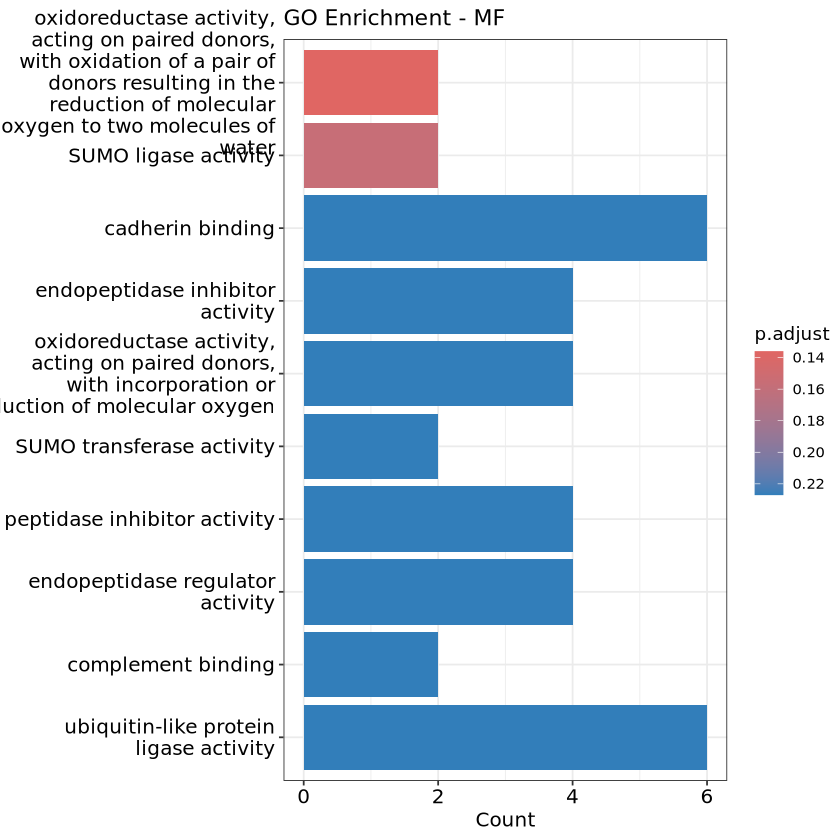

In [43]:
barplot(image_AD1_Aging5_xQTL_ego_mf, showCategory = 10, title = "GO Enrichment - MF")

## GSEA

In [ ]:
might be done after I got TWAS z score...